In [ ]:

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,927 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155219 files and d

In [ ]:
!pip install lime

     |████████████████████████████████| 275 kB 5.3 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=da6450ceaeed4a9618b23471e6b7e2ba5da5c4389c984caace0a051681f8aa69
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
from lime import lime_tabular

%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''import torch
import torchvision
import torch.nn'''

'import torch\nimport torchvision\nimport torch.nn'

In [ ]:
''' torch.cuda.is_available()'''

' torch.cuda.is_available()'

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
raw_df = pd.read_csv('/content/drive/MyDrive/응통2021/추가 데이터/full_dataset_lag10.csv')
raw_df

Unnamed: 0        date   요일     품목  ...  month  1_week 2_week  4_week
0               0  2016-01-01  금요일     배추  ...    1.0   420.0  449.0   625.0
1               1  2016-01-02  토요일     배추  ...    1.0   389.0  454.0   733.0
2               2  2016-01-03  일요일     배추  ...    1.0     0.0    0.0  1048.0
3               3  2016-01-04  월요일     배추  ...    1.0   398.0  475.0   638.0
4               4  2016-01-05  화요일     배추  ...    1.0   431.0  511.0   597.0
...           ...         ...  ...    ...  ...    ...     ...    ...     ...
36388        1728  2020-09-24  목요일  샤인마스캇  ...    9.0     0.0    0.0     0.0
36389        1729  2020-09-25  금요일  샤인마스캇  ...    9.0     0.0    0.0     0.0
36390        1730  2020-09-26  토요일  샤인마스캇  ...    9.0     0.0    0.0     0.0
36391        1731  2020-09-27  일요일  샤인마스캇  ...    9.0     0.0    0.0     0.0
36392        1732  2020-09-28  월요일  샤인마스캇  ...    9.0     0.0    0.0     0.0

[36393 rows x 44 columns]

# 전처리

In [ ]:
df = raw_df.iloc[:, 1:18]

In [ ]:
df['1_week'] = raw_df['1_week']

In [ ]:
# 연도, 월, 일 분리하기
def get_year(data):
    year = data.split("-")[0]
    year = int(year)
    return year
def get_month(data):
    month = data.split('-')[1]
    month = int(month)
    return month
def get_date(data):
    date = data.split('-')[2]
    date = int(date)
    return date

In [ ]:
df['연도'] = df['date'].apply(get_year)
df['월'] = df['date'].apply(get_month)
df['일'] = df['date'].apply(get_date)
df.head(2)

date   요일  품목     가격      거래량  ...   dif_Temp  1_week    연도  월  일
0  2016-01-01  금요일  배추    0.0      0.0  ...  12.600000   420.0  2016  1  1
1  2016-01-02  토요일  배추  329.0  80860.0  ...  13.566667   389.0  2016  1  2

[2 rows x 21 columns]

In [ ]:
df = df.set_index('date')
df.head(1)

요일  품목   가격  거래량 주산지  ...  dif_Temp  1_week    연도  월  일
date                               ...                              
2016-01-01  금요일  배추  0.0  0.0  전남  ...      12.6   420.0  2016  1  1

[1 rows x 20 columns]

In [ ]:
df['품목'].unique()

array(['배추', '무', '양파', '건고추', '마늘', '대파', '얼갈이배추', '양배추', '깻잎', '시금치',
       '미나리', '당근', '파프리카', '새송이', '팽이버섯', '토마토', '청상추', '백다다기', '애호박',
       '캠벨얼리', '샤인마스캇'], dtype=object)

In [ ]:
'''# 가격, 거래량이 0인 데이터 삭제하기

# 삭제전 shape
print(df.shape)
# 삭제 후 shape
df = df.query('가격 != 0')
df.shape'''

"# 가격, 거래량이 0인 데이터 삭제하기\n\n# 삭제전 shape\nprint(df.shape)\n# 삭제 후 shape\ndf = df.query('가격 != 0')\ndf.shape"

In [ ]:
for item in df['품목'].unique():
    print('---------------------------------------')
    print(item, '의 결측치')
    df_null = df[df['품목'] == item].isnull().sum()
    print(df_null[df_null != 0])

---------------------------------------
배추 의 결측치
temp        2
max_Temp    2
min_Temp    2
hum         2
wind        2
rain        2
sun_Qy      2
dif_Temp    2
dtype: int64
---------------------------------------
무 의 결측치
temp        102
max_Temp    102
min_Temp    133
hum         102
wind        102
rain        102
sun_Qy      102
dif_Temp    133
dtype: int64
---------------------------------------
양파 의 결측치
temp        2
max_Temp    2
min_Temp    2
hum         2
wind        2
rain        2
sun_Qy      2
dif_Temp    2
dtype: int64
---------------------------------------
건고추 의 결측치
temp        2
max_Temp    2
min_Temp    2
hum         2
wind        2
rain        2
sun_Qy      2
dif_Temp    2
dtype: int64
---------------------------------------
마늘 의 결측치
temp        2
max_Temp    2
min_Temp    2
hum         2
wind        2
rain        2
sun_Qy      2
dif_Temp    2
dtype: int64
---------------------------------------
대파 의 결측치
temp        2
max_Temp    2
min_Temp    2
hum         2
wind     

In [ ]:
# 가격, 거래량 0인 데이터 제거
df = df[df['가격'] != 0]

In [ ]:
df_baechu = df.query('품목 == "배추"')
df_onion = df.query('품목 == "양파"')
df_gungochu = df.query('품목 == "건고추"')
df_maneul = df.query('품목 == "마늘"')
df_daepa = df.query('품목 == "대파"')
df_eolbaechu = df.query('품목 == "얼갈이배추"')
df_leaf = df.query('품목 == "깻잎"')
df_sigeumchi = df.query('품목 == "시금치"')
df_minary = df.query('품목 == "미나리"')
df_paprica = df.query('품목 == "파프리카"')
df_newsong = df.query('품목 == "새송이"')
df_mushroom = df.query('품목 == "팽이버섯"')
df_tomato = df.query('품목 == "토마토"')
df_sangchu = df.query('품목 == "청상추"')
df_baekdada = df.query('품목 == "백다다기"')
df_pumpkin = df.query('품목 == "애호박"')
df_cambel = df.query('품목 == "캠벨얼리"')

In [ ]:
# df들을 모아둔 리스트 : df_list
df_list = [df_baechu, df_onion, df_gungochu, df_maneul, df_daepa, df_eolbaechu, df_leaf, df_sigeumchi, df_minary, df_paprica, df_newsong, df_mushroom, df_tomato, df_sangchu ,df_baekdada, df_pumpkin, df_cambel]
len(df_list)

17

In [ ]:
## 결측치 처리

# 배추
# temp, hum, sun_0y, dif_Temp, wind, max temp, min temp : 이전 값으로 대체
df_baechu['temp'].fillna(method = 'ffill', inplace = True)
df_baechu['hum'].fillna(method = 'ffill', inplace = True)
df_baechu['sun_Qy'].fillna(method = 'ffill', inplace = True)
df_baechu['dif_Temp'].fillna(method = 'ffill', inplace = True)
df_baechu['wind'].fillna(method = 'ffill', inplace = True)
df_baechu['max_Temp'].fillna(method = 'ffill', inplace = True)
df_baechu['min_Temp'].fillna(method = 'ffill', inplace = True)


# rain : 0값으로 대체
df_baechu['rain'].fillna(0, inplace = True)


# 양파
# temp, hum, sun_0y, dif_Temp, wind : 이전 값으로 대체
df_onion['temp'].fillna(method = 'ffill', inplace = True)
df_onion['hum'].fillna(method = 'ffill', inplace = True)
df_onion['sun_Qy'].fillna(method = 'ffill', inplace = True)
df_onion['dif_Temp'].fillna(method = 'ffill', inplace = True)
df_onion['wind'].fillna(method = 'ffill', inplace = True)
df_onion['max_Temp'].fillna(method = 'ffill', inplace = True)
df_onion['min_Temp'].fillna(method = 'ffill', inplace = True)

# rain : 0값으로 대체
df_onion['rain'].fillna(0, inplace = True)


# 건고추
# temp, hum, sun_0y, dif_Temp, wind : 이전 값으로 대체
df_gungochu['temp'].fillna(method = 'ffill', inplace = True)
df_gungochu['hum'].fillna(method = 'ffill', inplace = True)
df_gungochu['sun_Qy'].fillna(method = 'ffill', inplace = True)
df_gungochu['dif_Temp'].fillna(method = 'ffill', inplace = True)
df_gungochu['wind'].fillna(method = 'ffill', inplace = True)
df_gungochu['max_Temp'].fillna(method = 'ffill', inplace = True)
df_gungochu['min_Temp'].fillna(method = 'ffill', inplace = True)

# rain : 0값으로 대체
df_gungochu['rain'].fillna(0, inplace = True)


# 마늘
# temp, hum, sun_0y, dif_Temp, wind : 이전 값으로 대체
df_maneul['temp'].fillna(method = 'ffill', inplace = True)
df_maneul['hum'].fillna(method = 'ffill', inplace = True)
df_maneul['sun_Qy'].fillna(method = 'ffill', inplace = True)
df_maneul['dif_Temp'].fillna(method = 'ffill', inplace = True)
df_maneul['wind'].fillna(method = 'ffill', inplace = True)
df_maneul['max_Temp'].fillna(method = 'ffill', inplace = True)
df_maneul['min_Temp'].fillna(method = 'ffill', inplace = True)

# rain : 0값으로 대체
df_maneul['rain'].fillna(0, inplace = True)


# 대파
# temp, hum, sun_0y, dif_Temp, wind : 이전 값으로 대체
df_daepa['temp'].fillna(method = 'ffill', inplace = True)
df_daepa['hum'].fillna(method = 'ffill', inplace = True)
df_daepa['sun_Qy'].fillna(method = 'ffill', inplace = True)
df_daepa['dif_Temp'].fillna(method = 'ffill', inplace = True)
df_daepa['wind'].fillna(method = 'ffill', inplace = True)
df_daepa['max_Temp'].fillna(method = 'ffill', inplace = True)
df_daepa['min_Temp'].fillna(method = 'ffill', inplace = True)

# rain : 0값으로 대체
df_daepa['rain'].fillna(0, inplace = True)


# 얼갈이배추
# temp, hum, sun_0y, dif_Temp, wind : 이전 값으로 대체
df_eolbaechu['temp'].fillna(method = 'ffill', inplace = True)
df_eolbaechu['hum'].fillna(method = 'ffill', inplace = True)
df_eolbaechu['sun_Qy'].fillna(method = 'ffill', inplace = True)
df_eolbaechu['dif_Temp'].fillna(method = 'ffill', inplace = True)
df_eolbaechu['wind'].fillna(method = 'ffill', inplace = True)
df_eolbaechu['max_Temp'].fillna(method = 'ffill', inplace = True)
df_eolbaechu['min_Temp'].fillna(method = 'ffill', inplace = True)

# rain : 0값으로 대체
df_eolbaechu['rain'].fillna(0, inplace = True)



# 깻잎
# temp, hum, sun_0y, dif_Temp, wind : 이전 값으로 대체
df_leaf['temp'].fillna(method = 'ffill', inplace = True)
df_leaf['hum'].fillna(method = 'ffill', inplace = True)
df_leaf['sun_Qy'].fillna(method = 'ffill', inplace = True)
df_leaf['dif_Temp'].fillna(method = 'ffill', inplace = True)
df_leaf['wind'].fillna(method = 'ffill', inplace = True)
df_leaf['max_Temp'].fillna(method = 'ffill', inplace = True)
df_leaf['min_Temp'].fillna(method = 'ffill', inplace = True)

# rain : 0값으로 대체
df_leaf['rain'].fillna(0, inplace = True)


# 시금치
# temp, hum, sun_0y, dif_Temp, wind : 이전 값으로 대체
df_sigeumchi['temp'].fillna(method = 'ffill', inplace = True)
df_sigeumchi['hum'].fillna(method = 'ffill', inplace = True)
df_sigeumchi['sun_Qy'].fillna(method = 'ffill', inplace = True)
df_sigeumchi['dif_Temp'].fillna(method = 'ffill', inplace = True)
df_sigeumchi['wind'].fillna(method = 'ffill', inplace = True)
df_sigeumchi['max_Temp'].fillna(method = 'ffill', inplace = True)
df_sigeumchi['min_Temp'].fillna(method = 'ffill', inplace = True)

# rain : 0값으로 대체
df_sigeumchi['rain'].fillna(0, inplace = True)


# 미나리
# temp, hum, sun_0y, dif_Temp, wind : 이전 값으로 대체
df_minary['temp'].fillna(method = 'ffill', inplace = True)
df_minary['hum'].fillna(method = 'ffill', inplace = True)
df_minary['sun_Qy'].fillna(method = 'ffill', inplace = True)
df_minary['dif_Temp'].fillna(method = 'ffill', inplace = True)
df_minary['wind'].fillna(method = 'ffill', inplace = True)
df_minary['max_Temp'].fillna(method = 'ffill', inplace = True)
df_minary['min_Temp'].fillna(method = 'ffill', inplace = True)

# rain : 0값으로 대체
df_minary['rain'].fillna(0, inplace = True)




# 파프리카
# temp, hum, sun_0y, dif_Temp, wind : 이전 값으로 대체
df_paprica['temp'].fillna(method = 'ffill', inplace = True)
df_paprica['hum'].fillna(method = 'ffill', inplace = True)
df_paprica['sun_Qy'].fillna(method = 'ffill', inplace = True)
df_paprica['dif_Temp'].fillna(method = 'ffill', inplace = True)
df_paprica['wind'].fillna(method = 'ffill', inplace = True)
df_paprica['max_Temp'].fillna(method = 'ffill', inplace = True)
df_paprica['min_Temp'].fillna(method = 'ffill', inplace = True)

# rain : 0값으로 대체
df_paprica['rain'].fillna(0, inplace = True)


# 새송이
# temp, hum, sun_0y, dif_Temp, wind : 이전 값으로 대체
df_newsong['temp'].fillna(method = 'ffill', inplace = True)
df_newsong['hum'].fillna(method = 'ffill', inplace = True)
df_newsong['sun_Qy'].fillna(method = 'ffill', inplace = True)
df_newsong['dif_Temp'].fillna(method = 'ffill', inplace = True)
df_newsong['wind'].fillna(method = 'ffill', inplace = True)
df_newsong['max_Temp'].fillna(method = 'ffill', inplace = True)
df_newsong['min_Temp'].fillna(method = 'ffill', inplace = True)

# rain : 0값으로 대체
df_newsong['rain'].fillna(0, inplace = True)


# 팽이버섯
# temp, hum, sun_0y, dif_Temp, wind : 이전 값으로 대체
df_mushroom['temp'].fillna(method = 'ffill', inplace = True)
df_mushroom['hum'].fillna(method = 'ffill', inplace = True)
df_mushroom['sun_Qy'].fillna(method = 'ffill', inplace = True)
df_mushroom['dif_Temp'].fillna(method = 'ffill', inplace = True)
df_mushroom['wind'].fillna(method = 'ffill', inplace = True)
df_mushroom['max_Temp'].fillna(method = 'ffill', inplace = True)
df_mushroom['min_Temp'].fillna(method = 'ffill', inplace = True)

# rain : 0값으로 대체
df_mushroom['rain'].fillna(0, inplace = True)


# 토마토
# temp, hum, sun_0y, dif_Temp, wind : 이전 값으로 대체
df_tomato['temp'].fillna(method = 'ffill', inplace = True)
df_tomato['hum'].fillna(method = 'ffill', inplace = True)
df_tomato['sun_Qy'].fillna(method = 'ffill', inplace = True)
df_tomato['dif_Temp'].fillna(method = 'ffill', inplace = True)
df_tomato['wind'].fillna(method = 'ffill', inplace = True)
df_tomato['max_Temp'].fillna(method = 'ffill', inplace = True)
df_tomato['min_Temp'].fillna(method = 'ffill', inplace = True)

# rain : 0값으로 대체
df_tomato['rain'].fillna(0, inplace = True)

# 청상추
# temp, hum, sun_0y, dif_Temp, wind : 이전 값으로 대체
df_sangchu['temp'].fillna(method = 'ffill', inplace = True)
df_sangchu['hum'].fillna(method = 'ffill', inplace = True)
df_sangchu['sun_Qy'].fillna(method = 'ffill', inplace = True)
df_sangchu['dif_Temp'].fillna(method = 'ffill', inplace = True)
df_sangchu['wind'].fillna(method = 'ffill', inplace = True)
df_sangchu['max_Temp'].fillna(method = 'ffill', inplace = True)
df_sangchu['min_Temp'].fillna(method = 'ffill', inplace = True)

# rain : 0값으로 대체
df_sangchu['rain'].fillna(0, inplace = True)


# 백다다기
# temp, hum, sun_0y, dif_Temp, wind : 이전 값으로 대체
df_baekdada['temp'].fillna(method = 'ffill', inplace = True)
df_baekdada['hum'].fillna(method = 'ffill', inplace = True)
df_baekdada['sun_Qy'].fillna(method = 'ffill', inplace = True)
df_baekdada['dif_Temp'].fillna(method = 'ffill', inplace = True)
df_baekdada['wind'].fillna(method = 'ffill', inplace = True)
df_baekdada['max_Temp'].fillna(method = 'ffill', inplace = True)
df_baekdada['min_Temp'].fillna(method = 'ffill', inplace = True)

# rain : 0값으로 대체
df_baekdada['rain'].fillna(0, inplace = True)


# 애호박
# temp, hum, sun_0y, dif_Temp, wind : 이전 값으로 대체
df_pumpkin['temp'].fillna(method = 'ffill', inplace = True)
df_pumpkin['hum'].fillna(method = 'ffill', inplace = True)
df_pumpkin['sun_Qy'].fillna(method = 'ffill', inplace = True)
df_pumpkin['dif_Temp'].fillna(method = 'ffill', inplace = True)
df_pumpkin['wind'].fillna(method = 'ffill', inplace = True)
df_pumpkin['max_Temp'].fillna(method = 'ffill', inplace = True)
df_pumpkin['min_Temp'].fillna(method = 'ffill', inplace = True)

# rain : 0값으로 대체
df_pumpkin['rain'].fillna(0, inplace = True)


# 캠벨얼리
# temp, hum, sun_0y, dif_Temp, wind : 이전 값으로 대체
df_cambel['temp'].fillna(method = 'ffill', inplace = True)
df_cambel['hum'].fillna(method = 'ffill', inplace = True)
df_cambel['sun_Qy'].fillna(method = 'ffill', inplace = True)
df_cambel['dif_Temp'].fillna(method = 'ffill', inplace = True)
df_cambel['wind'].fillna(method = 'ffill', inplace = True)
df_cambel['max_Temp'].fillna(method = 'ffill', inplace = True)
df_cambel['min_Temp'].fillna(method = 'ffill', inplace = True)

# rain : 0값으로 대체
df_cambel['rain'].fillna(0, inplace = True)



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'양배추', '깻잎', '시금치',
       '미나리', '당근', '파프리카', '새송이', '팽이버섯', '토마토', '청상추', '백다다기', '애호박',
       '캠벨얼리', '샤인마스캇']

df_yangbaechu, df_leaf, df_sigeumchi, df_minary, df_carrot, df_paprica, df_newsong, df_mushroom, df_tomato, df_sangchu ,df_baekdada, df_pumpkin, df_cambel, df_shine

In [ ]:
# 결측치 처리 후
for df_sub in df_list:
    print('---------------------------------------')
    print(df_sub['품목'][0], '의 결측치')
    df_sub_null = df_sub.isnull().sum()
    print(df_sub_null[df_sub_null != 0])

---------------------------------------
배추 의 결측치
Series([], dtype: int64)
---------------------------------------
양파 의 결측치
Series([], dtype: int64)
---------------------------------------
건고추 의 결측치
Series([], dtype: int64)
---------------------------------------
마늘 의 결측치
Series([], dtype: int64)
---------------------------------------
대파 의 결측치
Series([], dtype: int64)
---------------------------------------
얼갈이배추 의 결측치
Series([], dtype: int64)
---------------------------------------
깻잎 의 결측치
Series([], dtype: int64)
---------------------------------------
시금치 의 결측치
Series([], dtype: int64)
---------------------------------------
미나리 의 결측치
Series([], dtype: int64)
---------------------------------------
파프리카 의 결측치
Series([], dtype: int64)
---------------------------------------
새송이 의 결측치
hum       247
sun_Qy    247
dtype: int64
---------------------------------------
팽이버섯 의 결측치
Series([], dtype: int64)
---------------------------------------
토마토 의 결측치
Series([], dtype: int64)
----------

새송이와 백다다기는 여전히 hum과 일조량에 결측치가 있음.

In [ ]:
# 새송이만 따로보기
df_newsong

요일   품목      가격       거래량 주산지  ...  dif_Temp  1_week    연도  월   일
date                                        ...                               
2016-01-02  토요일  새송이  2576.0   15797.0  충남  ...      12.9  2308.0  2016  1   2
2016-01-04  월요일  새송이  2440.0  277326.5  충남  ...       9.1  2335.0  2016  1   4
2016-01-05  화요일  새송이  2437.0  218465.2  충남  ...       7.0  2339.0  2016  1   5
2016-01-06  수요일  새송이  2343.0  187900.4  충남  ...      10.1  2384.0  2016  1   6
2016-01-07  목요일  새송이  2291.0  181058.6  충남  ...       5.9  2351.0  2016  1   7
...         ...  ...     ...       ...  ..  ...       ...     ...   ... ..  ..
2020-09-24  목요일  새송이  2927.0  200810.1  충남  ...      11.8     0.0  2020  9  24
2020-09-25  금요일  새송이  2994.0  222932.0  충남  ...      11.9     0.0  2020  9  25
2020-09-26  토요일  새송이  2942.0  249009.1  충남  ...      11.7     0.0  2020  9  26
2020-09-27  일요일  새송이  2946.0    4766.0  충남  ...      12.8     0.0  2020  9  27
2020-09-28  월요일  새송이  3360.0  315101.7  충남  ...      13.5     0.0  2020  9  28

[1475 rows x 20 columns]

In [ ]:
df_newsong[df_newsong['hum'].isnull() == False]

요일   품목      가격       거래량 주산지  ...  dif_Temp  1_week    연도   월   일
date                                        ...                                
2016-10-18  화요일  새송이  2745.0  167671.0  충남  ...       8.0  2396.0  2016  10  18
2016-10-19  수요일  새송이  2626.0  162718.2  충남  ...      12.5  2331.0  2016  10  19
2016-10-20  목요일  새송이  2551.0  158248.6  충남  ...      11.8  2293.0  2016  10  20
2016-10-21  금요일  새송이  2506.0  160747.0  충남  ...       3.9  2284.0  2016  10  21
2016-10-22  토요일  새송이  2477.0  167991.0  충남  ...       9.1  2306.0  2016  10  22
...         ...  ...     ...       ...  ..  ...       ...     ...   ...  ..  ..
2020-09-24  목요일  새송이  2927.0  200810.1  충남  ...      11.8     0.0  2020   9  24
2020-09-25  금요일  새송이  2994.0  222932.0  충남  ...      11.9     0.0  2020   9  25
2020-09-26  토요일  새송이  2942.0  249009.1  충남  ...      11.7     0.0  2020   9  26
2020-09-27  일요일  새송이  2946.0    4766.0  충남  ...      12.8     0.0  2020   9  27
2020-09-28  월요일  새송이  3360.0  315101.7  충남  ...      13.5     0.0  2020   9  28

[1228 rows x 20 columns]

* 새송이는 2016-01-01 부터 2016-10-17일까지 hum과 일조량이 na값이여서 backfill을 해도 결측치가 하나만 채워지기에 결측치가 너무 많다 
* --> hum, 일조량 제거

* 마찬가지로 백다다기도 이러하므로 hum, 일조량 제거한다.

In [ ]:
df_newsong.drop(['hum', 'sun_Qy'], axis = 1, inplace = True)
df_baekdada.drop(['hum', 'sun_Qy'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
'''# 일자별 가격
for df_sub in df_list:
    plt.figure(figsize=(13, 9))
    sns.lineplot(y=df_sub['가격'], x=df_sub.index)
    plt.xlabel('time')
    plt.ylabel('price')
    plt.title('{}'.format(df_sub.iloc[0, 1]))
    plt.show()'''

"# 일자별 가격\nfor df_sub in df_list:\n    plt.figure(figsize=(13, 9))\n    sns.lineplot(y=df_sub['가격'], x=df_sub.index)\n    plt.xlabel('time')\n    plt.ylabel('price')\n    plt.title('{}'.format(df_sub.iloc[0, 1]))\n    plt.show()"

초반에 가격이 갑자기 급등? --> 처리해야하나

In [ ]:
'''# 배추의 모든 변수들 보기

values = df_baechu.values

# plot 데이터 설정
groups = [2, 3, 5, 6, 7, 8, 9, 10, 11, 12]
i = 1

# 각 컬럼을 plot
plt.figure(figsize = (60, 70))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(df_baechu.columns[group], y=0.5, loc='right')
    i += 1
plt.show()'''

"# 배추의 모든 변수들 보기\n\nvalues = df_baechu.values\n\n# plot 데이터 설정\ngroups = [2, 3, 5, 6, 7, 8, 9, 10, 11, 12]\ni = 1\n\n# 각 컬럼을 plot\nplt.figure(figsize = (60, 70))\nfor group in groups:\n    plt.subplot(len(groups), 1, i)\n    plt.plot(values[:, group])\n    plt.title(df_baechu.columns[group], y=0.5, loc='right')\n    i += 1\nplt.show()"

# 스케일링 : MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_baechu.columns

Index(['요일', '품목', '가격', '거래량', '주산지', '경유가격', '농산물', 'month_avg', 'temp',
       'max_Temp', 'min_Temp', 'hum', 'wind', 'rain', 'sun_Qy', 'dif_Temp',
       '1_week', '연도', '월', '일'],
      dtype='object')

In [ ]:
# column 순서 바꾸기

df_baechu  = df_baechu.loc[:, ['요일', '연도', '품목', '주산지', '가격', '거래량', '경유가격', '농산물', 'temp', 'wind','rain', 'dif_Temp', 'max_Temp', 'min_Temp','1_week', '월', '일']]
df_onion = df_onion.loc[:, ['요일', '연도', '품목', '주산지', '가격', '거래량', '경유가격', '농산물', 'temp', 'wind','rain', 'dif_Temp', 'max_Temp', 'min_Temp','1_week', '월', '일']]
df_gungochu = df_gungochu.loc[:, ['요일', '연도', '품목', '주산지', '가격', '거래량', '경유가격', '농산물', 'temp', 'wind','rain', 'dif_Temp', 'max_Temp', 'min_Temp','1_week', '월', '일']]
df_maneul = df_maneul.loc[:, ['요일', '연도', '품목', '주산지', '가격', '거래량', '경유가격', '농산물', 'temp', 'wind','rain', 'dif_Temp', 'max_Temp', 'min_Temp','1_week', '월', '일']]
df_daepa = df_daepa.loc[:, ['요일', '연도', '품목', '주산지', '가격', '거래량', '경유가격', '농산물', 'temp', 'wind','rain', 'dif_Temp', 'max_Temp', 'min_Temp','1_week', '월', '일']]
df_eolbaechu = df_eolbaechu.loc[:, ['요일', '연도', '품목', '주산지', '가격', '거래량', '경유가격', '농산물', 'temp', 'wind','rain', 'dif_Temp', 'max_Temp', 'min_Temp','1_week', '월', '일']]
df_leaf= df_leaf.loc[:, ['요일', '연도', '품목', '주산지', '가격', '거래량', '경유가격', '농산물', 'temp', 'wind','rain', 'dif_Temp', 'max_Temp', 'min_Temp','1_week', '월', '일']]
df_sigeumchi= df_sigeumchi.loc[:, ['요일', '연도', '품목', '주산지', '가격', '거래량', '경유가격', '농산물', 'temp', 'wind','rain', 'dif_Temp', 'max_Temp', 'min_Temp','1_week', '월', '일']]
df_minary= df_minary.loc[:, ['요일', '연도', '품목', '주산지', '가격', '거래량', '경유가격', '농산물', 'temp', 'wind','rain', 'dif_Temp', 'max_Temp', 'min_Temp','1_week', '월', '일']]
df_paprica = df_paprica.loc[:, ['요일', '연도', '품목', '주산지', '가격', '거래량', '경유가격', '농산물', 'temp', 'wind','rain', 'dif_Temp', 'max_Temp', 'min_Temp','1_week', '월', '일']]
df_newsong = df_newsong.loc[:, ['요일', '연도', '품목', '주산지', '가격', '거래량', '경유가격', '농산물', 'temp', 'wind','rain', 'dif_Temp', 'max_Temp', 'min_Temp','1_week', '월', '일']]
df_mushroom = df_mushroom.loc[:, ['요일', '연도', '품목', '주산지', '가격', '거래량', '경유가격', '농산물', 'temp', 'wind','rain', 'dif_Temp', 'max_Temp', 'min_Temp','1_week', '월', '일']]
df_tomato= df_tomato.loc[:, ['요일', '연도', '품목', '주산지', '가격', '거래량', '경유가격', '농산물', 'temp', 'wind','rain', 'dif_Temp', 'max_Temp', 'min_Temp','1_week', '월', '일']]
df_sangchu= df_sangchu.loc[:, ['요일', '연도', '품목', '주산지', '가격', '거래량', '경유가격', '농산물', 'temp', 'wind','rain', 'dif_Temp', 'max_Temp', 'min_Temp','1_week', '월', '일']]
df_baekdada = df_baekdada.loc[:, ['요일', '연도', '품목', '주산지', '가격', '거래량', '경유가격', '농산물', 'temp', 'wind','rain', 'dif_Temp', 'max_Temp', 'min_Temp','1_week', '월', '일']]
df_pumpkin= df_pumpkin.loc[:, ['요일', '연도', '품목', '주산지', '가격', '거래량', '경유가격', '농산물', 'temp', 'wind','rain', 'dif_Temp', 'max_Temp', 'min_Temp','1_week', '월', '일']]
df_cambel = df_cambel.loc[:, ['요일', '연도', '품목', '주산지', '가격', '거래량', '경유가격', '농산물', 'temp', 'wind','rain', 'dif_Temp', 'max_Temp', 'min_Temp','1_week', '월', '일']]


In [ ]:
# 스케일링 : 가격부터 min_Temp 까지 모두 scaling

scaler1 = MinMaxScaler()
scaled = scaler1.fit_transform(df_baechu.iloc[:, 4:])
df_scaled = pd.DataFrame(data = scaled, columns = df_baechu.iloc[:, 4:].columns)
df_baechu = pd.concat([df_baechu.iloc[:, :4].reset_index(), df_scaled], axis = 1)

scaler2 = MinMaxScaler()
scaled = scaler2.fit_transform(df_onion.iloc[:, 4:])
df_scaled = pd.DataFrame(data = scaled, columns = df_onion.iloc[:, 4:].columns)
df_onion = pd.concat([df_onion.iloc[:, :4].reset_index(), df_scaled], axis = 1)


scaler3 = MinMaxScaler()
scaled = scaler3.fit_transform(df_gungochu.iloc[:, 4:])
df_scaled = pd.DataFrame(data = scaled, columns = df_gungochu.iloc[:, 4:].columns)
df_gungochu = pd.concat([df_gungochu.iloc[:, :4].reset_index(), df_scaled], axis = 1)


scaler4 = MinMaxScaler()
scaled = scaler4.fit_transform(df_maneul.iloc[:, 4:])
df_scaled = pd.DataFrame(data = scaled, columns = df_maneul.iloc[:, 4:].columns)
df_maneul = pd.concat([df_maneul.iloc[:, :4].reset_index(), df_scaled], axis = 1)


scaler5 = MinMaxScaler()
scaled = scaler5.fit_transform(df_daepa.iloc[:, 4:])
df_scaled = pd.DataFrame(data = scaled, columns = df_daepa.iloc[:, 4:].columns)
df_daepa = pd.concat([df_daepa.iloc[:, :4].reset_index(), df_scaled], axis = 1)

scaler6 = MinMaxScaler()
scaled = scaler6.fit_transform(df_eolbaechu.iloc[:, 4:])
df_scaled = pd.DataFrame(data = scaled, columns = df_eolbaechu.iloc[:, 4:].columns)
df_eolbaechu = pd.concat([df_eolbaechu.iloc[:, :4].reset_index(), df_scaled], axis = 1)


scaler7 = MinMaxScaler()
scaled = scaler7.fit_transform(df_leaf.iloc[:, 4:])
df_scaled = pd.DataFrame(data = scaled, columns = df_leaf.iloc[:, 4:].columns)
df_leaf = pd.concat([df_leaf.iloc[:, :4].reset_index(), df_scaled], axis = 1)

scaler8 = MinMaxScaler()
scaled = scaler8.fit_transform(df_sigeumchi.iloc[:, 4:])
df_scaled = pd.DataFrame(data = scaled, columns = df_sigeumchi.iloc[:, 4:].columns)
df_sigeumchi = pd.concat([df_sigeumchi.iloc[:, :4].reset_index(), df_scaled], axis = 1)

scaler9 = MinMaxScaler()
scaled = scaler9.fit_transform(df_minary.iloc[:, 4:])
df_scaled = pd.DataFrame(data = scaled, columns = df_minary.iloc[:, 4:].columns)
df_minary = pd.concat([df_minary.iloc[:, :4].reset_index(), df_scaled], axis = 1)

scaler10 = MinMaxScaler()
scaled = scaler10.fit_transform(df_paprica.iloc[:, 4:])
df_scaled = pd.DataFrame(data = scaled, columns = df_paprica.iloc[:, 4:].columns)
df_paprica = pd.concat([df_paprica.iloc[:, :4].reset_index(), df_scaled], axis = 1)


scaler11 = MinMaxScaler()
scaled = scaler11.fit_transform(df_newsong.iloc[:, 4:])
df_scaled = pd.DataFrame(data = scaled, columns = df_newsong.iloc[:, 4:].columns)
df_newsong = pd.concat([df_newsong.iloc[:, :4].reset_index(), df_scaled], axis = 1)


scaler12 = MinMaxScaler()
scaled = scaler12.fit_transform(df_mushroom.iloc[:, 4:])
df_scaled = pd.DataFrame(data = scaled, columns = df_mushroom.iloc[:, 4:].columns)
df_mushroom = pd.concat([df_mushroom.iloc[:, :4].reset_index(), df_scaled], axis = 1)

scaler13 = MinMaxScaler()
scaled = scaler13.fit_transform(df_tomato.iloc[:, 4:])
df_scaled = pd.DataFrame(data = scaled, columns = df_tomato.iloc[:, 4:].columns)
df_tomato = pd.concat([df_tomato.iloc[:, :4].reset_index(), df_scaled], axis = 1)

scaler14 = MinMaxScaler()
scaled = scaler14.fit_transform(df_sangchu.iloc[:, 4:])
df_scaled = pd.DataFrame(data = scaled, columns = df_sangchu.iloc[:, 4:].columns)
df_sangchu = pd.concat([df_sangchu.iloc[:, :4].reset_index(), df_scaled], axis = 1)


scaler15 = MinMaxScaler()
scaled = scaler15.fit_transform(df_baekdada.iloc[:, 4:])
df_scaled = pd.DataFrame(data = scaled, columns = df_baekdada.iloc[:, 4:].columns)
df_baekdada = pd.concat([df_baekdada.iloc[:, :4].reset_index(), df_scaled], axis = 1)



scaler16 = MinMaxScaler()
scaled = scaler16.fit_transform(df_pumpkin.iloc[:, 4:])
df_scaled = pd.DataFrame(data = scaled, columns = df_pumpkin.iloc[:,4:].columns)
df_pumpkin = pd.concat([df_pumpkin.iloc[:, :4].reset_index(), df_scaled], axis = 1)

scaler17 = MinMaxScaler()
scaled = scaler17.fit_transform(df_cambel.iloc[:, 4:])
df_scaled = pd.DataFrame(data = scaled, columns = df_cambel.iloc[:, 4:].columns)
df_cambel = pd.concat([df_cambel.iloc[:, :4].reset_index(), df_scaled], axis = 1)


# LSTM

In [ ]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot

from pandas import read_csv
from pandas import DataFrame
from pandas import concat

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [ ]:
# 분석에 쓸 데이터만 따로 뽑기 ,(백다다기랑 새송이는 hum이랑 일조량이 없으므로 따로 처리)
def sub_data(x):
    return x.loc[:, ['월', '일','거래량', '경유가격', '농산물', 'temp', 'wind', 'rain', 'dif_Temp', 'max_Temp', 'min_Temp', '가격', '1_week']]

In [ ]:
df_baechu = sub_data(df_baechu)
df_onion = sub_data(df_onion)
df_gungochu = sub_data(df_gungochu)
df_maneul=sub_data(df_maneul)
df_daepa = sub_data(df_daepa)
df_eolbaechu = sub_data(df_eolbaechu)
df_leaf = sub_data(df_leaf)
df_sigeumchi = sub_data(df_sigeumchi)
df_minary = sub_data(df_minary)
df_paprica=sub_data(df_paprica)
df_mushroom=sub_data(df_mushroom)
df_tomato=sub_data(df_tomato)
df_sangchu=sub_data(df_sangchu)
df_pumpkin=sub_data(df_pumpkin)
df_cambel=sub_data(df_cambel)


In [ ]:
df_baekdada=df_baekdada.loc[:, [ '월', '일','거래량', '경유가격', '농산물', 'temp', 'wind', 'rain', 'dif_Temp', 'max_Temp', 'min_Temp', '가격', '1_week']]
df_newsong = df_newsong.loc[:, ['월', '일','거래량', '경유가격', '농산물', 'temp', 'wind', 'rain', 'dif_Temp', 'max_Temp', 'min_Temp', '가격','1_week']]
df_newsong

월         일       거래량  ...  min_Temp        가격   1_week
0     0.000000  0.033333  0.050012  ...  0.399558  0.449981  0.57700
1     0.000000  0.100000  0.880102  ...  0.386313  0.397451  0.58375
2     0.000000  0.133333  0.693278  ...  0.315673  0.396292  0.58475
3     0.000000  0.166667  0.596265  ...  0.284768  0.359985  0.59600
4     0.000000  0.200000  0.574550  ...  0.357616  0.339900  0.58775
...        ...       ...       ...  ...       ...       ...      ...
1470  0.727273  0.766667  0.637241  ...  0.717439  0.585554  0.00000
1471  0.727273  0.800000  0.707455  ...  0.710817  0.611433  0.00000
1472  0.727273  0.833333  0.790223  ...  0.706402  0.591348  0.00000
1473  0.727273  0.866667  0.015000  ...  0.688742  0.592893  0.00000
1474  0.727273  0.900000  1.000000  ...  0.675497  0.752800  0.00000

[1475 rows x 13 columns]

## TensroFlow Dataset을 활용한 시퀀스 데이터셋 구성
* https://www.youtube.com/watch?v=NUMzrqxQ4zk&ab_channel=%ED%85%8C%EB%94%94%EB%85%B8%ED%8A%B8TeddyNote

* https://colab.research.google.com/github/teddylee777/machine-learning/blob/master/04-TensorFlow2.0/01-%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90-%EC%A3%BC%EA%B0%80%EC%98%88%EC%B8%A1/02-LSTM-stock-forecasting-with-LSTM-financedatareader.ipynb

In [ ]:
df['품목'].unique()

array(['배추', '무', '양파', '건고추', '마늘', '대파', '얼갈이배추', '양배추', '깻잎', '시금치',
       '미나리', '당근', '파프리카', '새송이', '팽이버섯', '토마토', '청상추', '백다다기', '애호박',
       '캠벨얼리', '샤인마스캇'], dtype=object)

In [ ]:
def windowed_dataset(x, y, window_size, batch_size, shuffle):
    # x값 window dataset 구성
    ds_x = tf.data.Dataset.from_tensor_slices(x)
    ds_x = ds_x.window(WINDOW_SIZE, shift = 1, stride = 1, drop_remainder = True)
    ds_x = ds_x.flat_map(lambda x: x.batch(WINDOW_SIZE))
    # y값 추가
    ds_y = tf.data.Dataset.from_tensor_slices(y[WINDOW_SIZE:])
    ds = tf.data.Dataset.zip((ds_x, ds_y))
    if shuffle:
        ds = ds.shuffle(1000)
    return ds.batch(batch_size).prefetch(1)

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import mean_squared_error

In [ ]:
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

In [ ]:
# nmae 값 구하기
# input : 실제 가격 값과 예측 값을 합친 df

def nmae(df_price):

    df8 = df_price.query('true != 0')  # 실제 가격 값이 0인 행 제거
    true = df8['true']
    pred = df8['pred']
    score = np.absolute(np.subtract(true, pred))/true
    score = score.mean()
    print('NMAE : {}'.format(score))


### 모델 이름 (뒤에 window size 3, 5, 7, 9도 붙이기)
* 배추: model_baechu
* 양파 : model_onion
* 건고추 : model_gungochu
* 마늘 : model_maneul
* 대파 : model_daepa
* 얼갈이배추 : model_eolbaechu
* 깻잎 : model_leaf
* 시금치 : model_sigeumchi
* 미나리 : model_minary
* 파프리카 : model_paprica
* 새송이 : model_newsong
* 팽이버섯 : model_mushroom
* 토마토 : model_tomato
* 청상추 : model_sangchu
* 백다다기 : model_baekdada
* 애호박 : model_pumpkin
* 캠벨얼리 : model_cambel

# 배추

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_baechu.drop('1_week', 1), df_baechu['1_week'], test_size=0.2, random_state=0, shuffle=False)

--------------- window size = 8 ----------------------
데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 8, 12)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32,)
NMAE : 0.2865486950414937


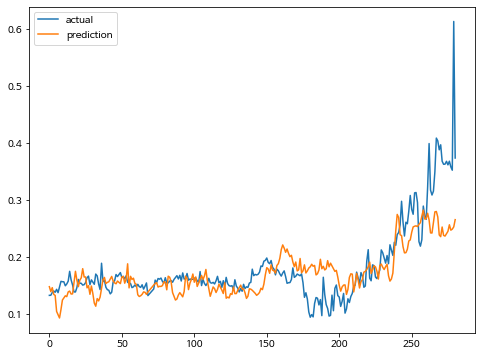

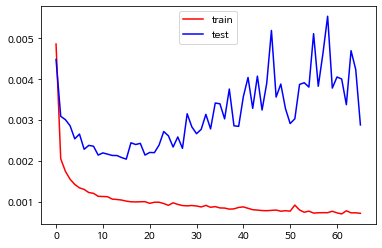

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/lime/explanation.py:168: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/lime/explanation.py:168: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

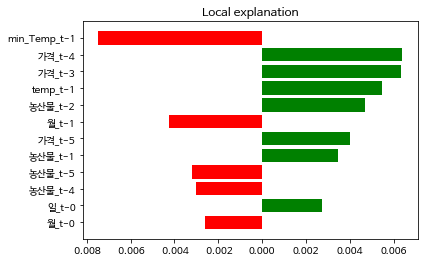

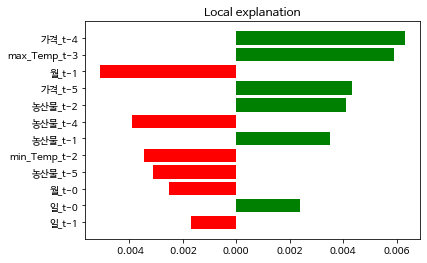

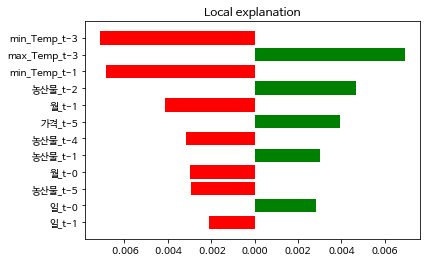

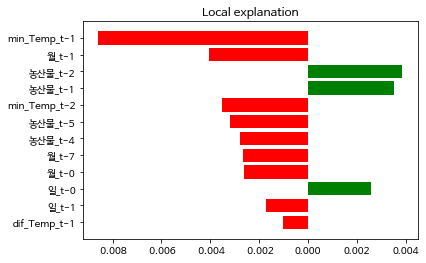

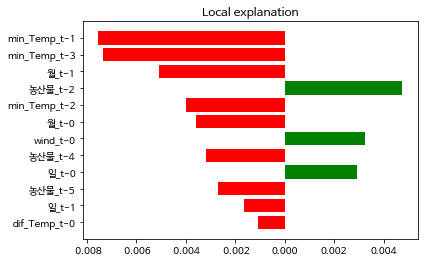

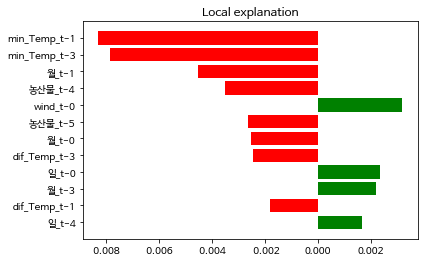

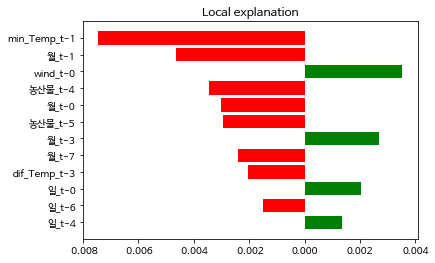

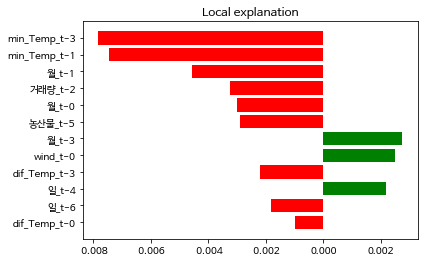

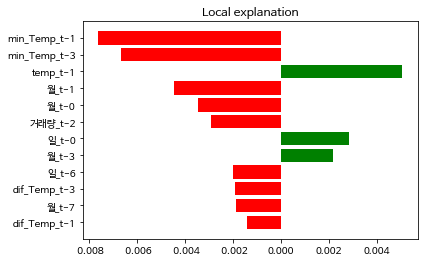

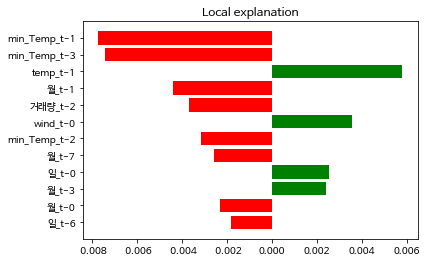

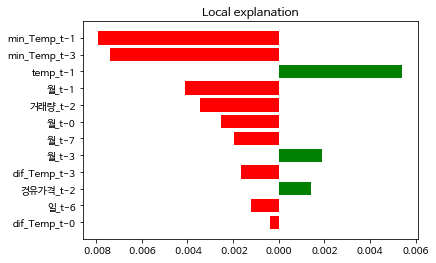

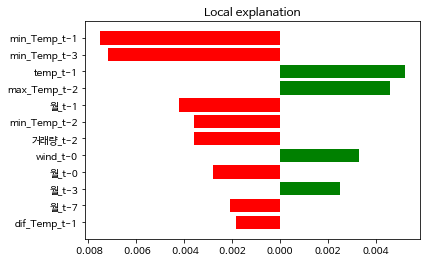

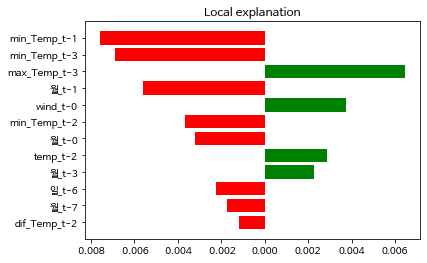

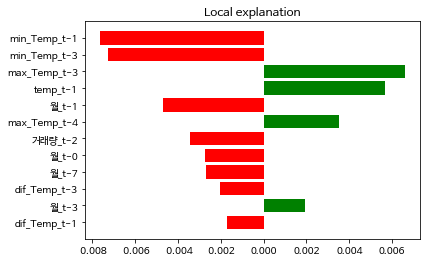

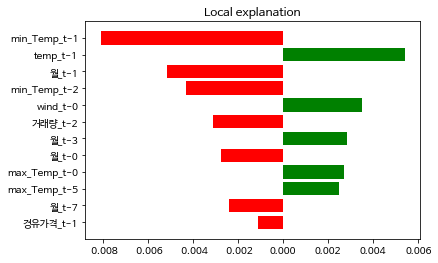

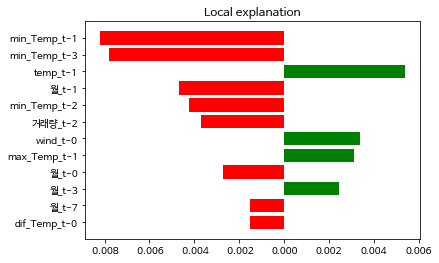

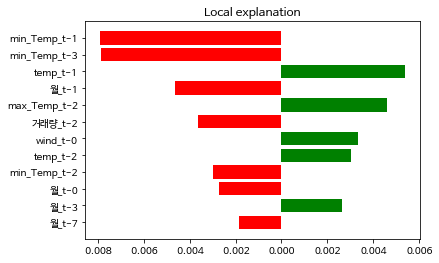

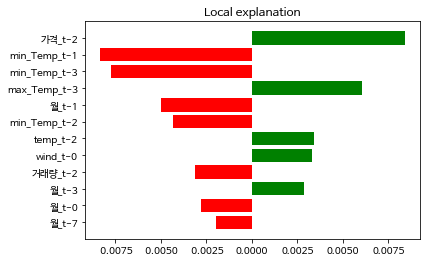

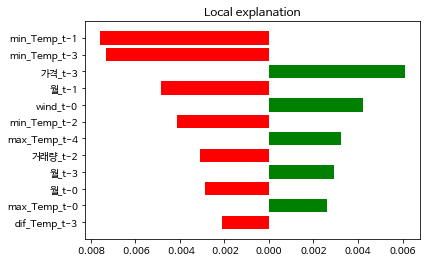

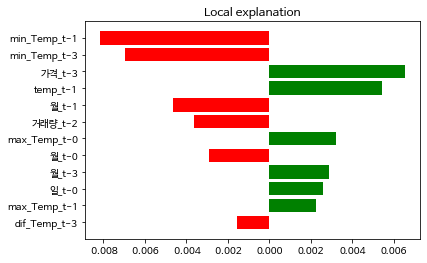

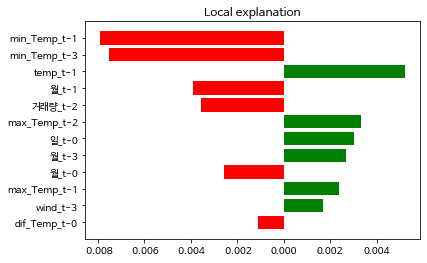

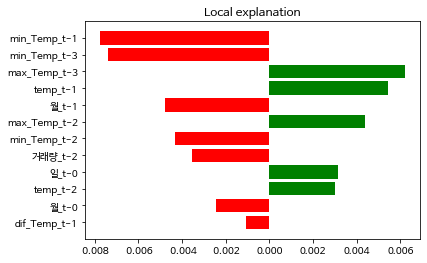

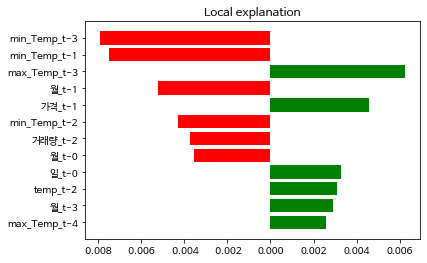

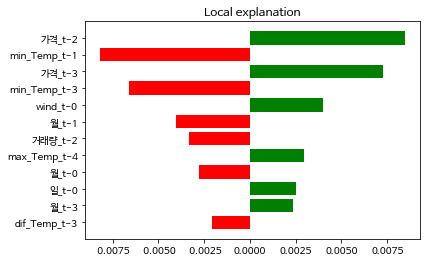

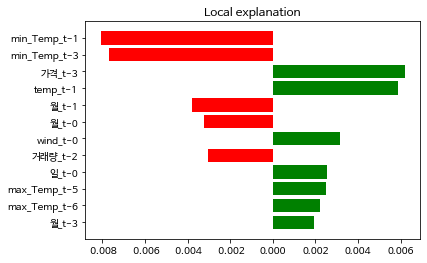

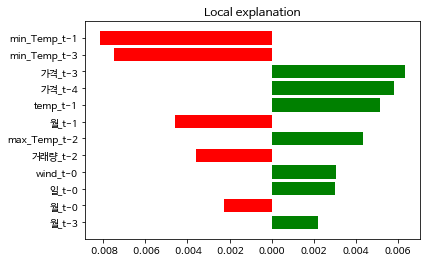

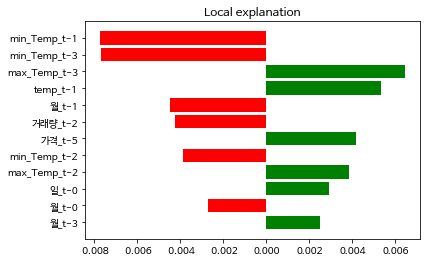

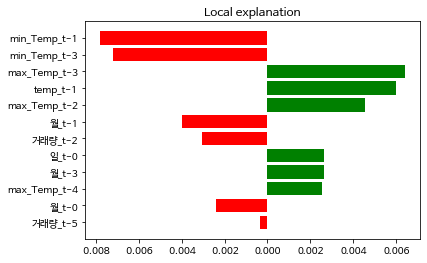

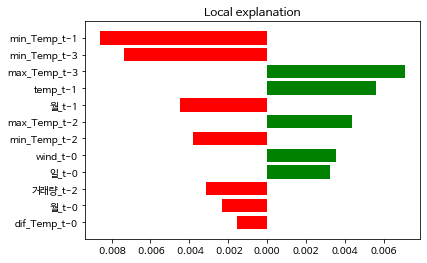

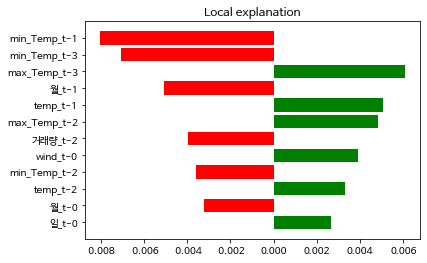

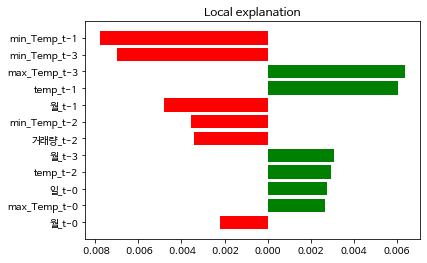

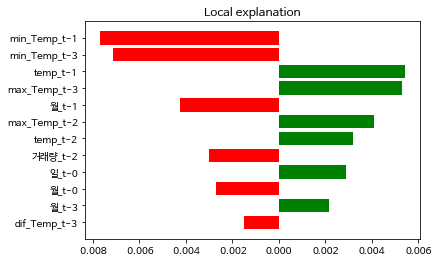

In [ ]:
WINDOW_SIZE=8
BATCH_SIZE=32
print('--------------- window size = {} ----------------------'.format(WINDOW_SIZE))
train_data = windowed_dataset(x_train, y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(x_test, y_test, WINDOW_SIZE, BATCH_SIZE, False)

# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

    
model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
        padding="causal",
        activation="relu",
        input_shape=[WINDOW_SIZE, x_train.shape[1]]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

# early stopping
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 50)

model_name = 'model_' + 'baechu' + str(WINDOW_SIZE) + '.h5'  
checkpoint = ModelCheckpoint(model_name,             # file명을 지정합니다
                            monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다         
                            save_best_only=True,  # 가장 best 값만 저장합니다
                            mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )


history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=200, verbose=0, callbacks = [checkpoint, earlystopping])

model = tf.keras.models.load_model(model_name)
# 예측
pred = model.predict(test_data)

##  NMAE 계산

nmae_df = pd.concat([pd.Series(pred.ravel()),y_test[WINDOW_SIZE:].reset_index(drop = True)], axis = 1)
nmae_df.columns = ['pred', 'true']

df11 = pd.concat([nmae_df['pred'], x_test.reset_index(drop = True)], axis = 1)[:-WINDOW_SIZE]
df10 = pd.concat([nmae_df['true'], x_test.reset_index(drop = True)], axis = 1)[:-WINDOW_SIZE]

# inverse scaling --> true_val : 실제 가격, pred_val : 예측한 가격
true_val = pd.DataFrame(scaler1.inverse_transform(df10))[0]
pred_val = pd.DataFrame(scaler1.inverse_transform(df11))[0]
# df20 : inverse scaling 한 pred와 true값을 지닌 df
df20 = pd.concat([true_val, pred_val], axis = 1)
df20.columns = ['true', 'pred']
nmae(df20) # nmae 계산


# 그래프 그리기
df9 = nmae_df.query('true != 0')
plt.figure(figsize=(8, 6))
plt.plot(df9['true'], label='actual')
plt.plot(df9['pred'], label='prediction')
plt.legend()
plt.show()


# loss 그래프
plt.plot(history.history['loss'], c = 'r', label='train')
plt.plot(history.history['val_loss'], c = 'b', label='test')
plt.legend()
plt.show()
print()





ttt = np.array(list(map(lambda x: x[0].numpy(), train_data)))[0]
ttt2 = np.array(list(map(lambda x: x[0].numpy(), test_data)))[0]
explainer = lime_tabular.RecurrentTabularExplainer(ttt, feature_names=x_train.columns, mode='regression',discretize_continuous=False)
for i in range(32):
    exp = explainer.explain_instance(ttt2[i,:,:], model.predict, num_features=len(x_train.columns))
    exp.as_pyplot_figure()

# 양파

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_onion.drop('1_week', 1), df_onion['1_week'], test_size=0.2, random_state=0, shuffle=False)

--------------- window size = 4 ----------------------
데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 4, 12)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32,)
NMAE : 0.16439648970013965


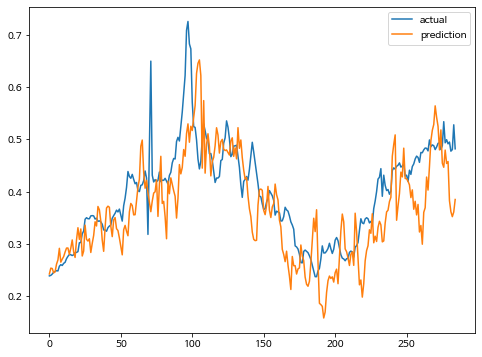

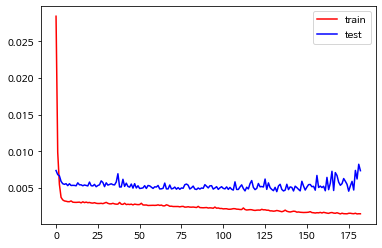

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/lime/explanation.py:168: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/

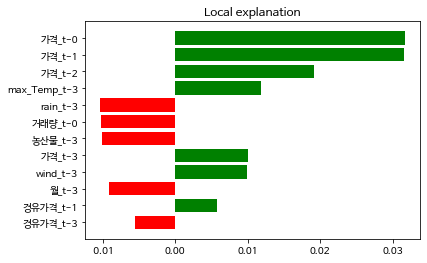

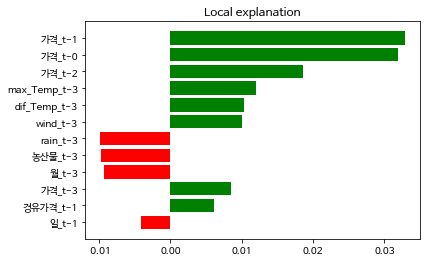

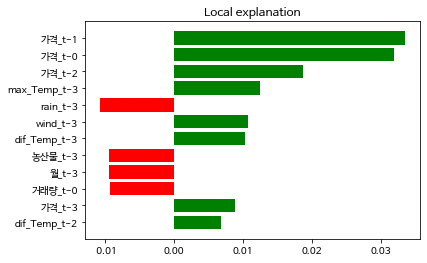

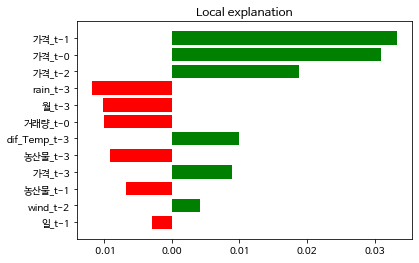

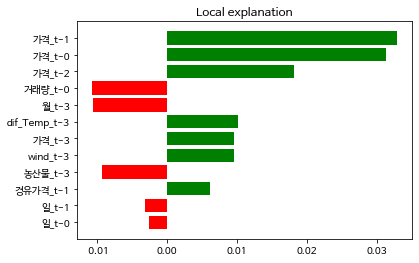

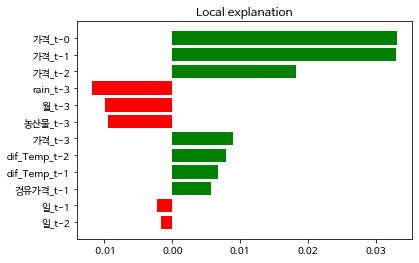

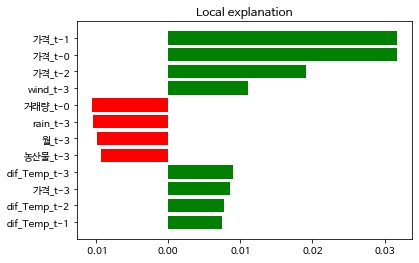

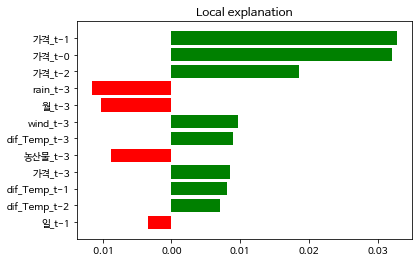

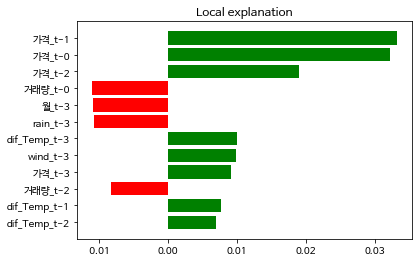

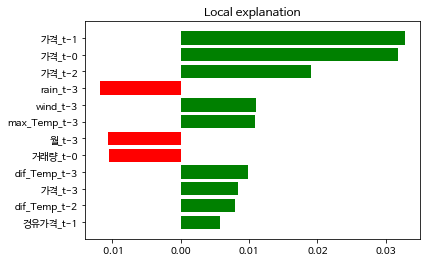

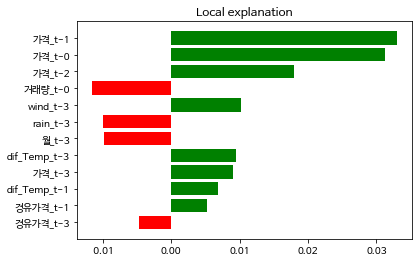

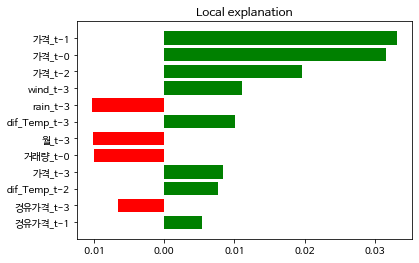

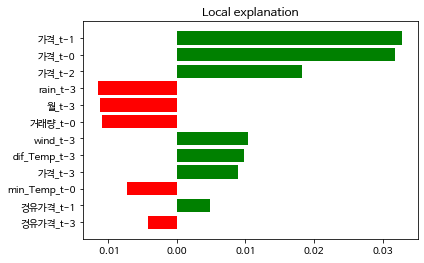

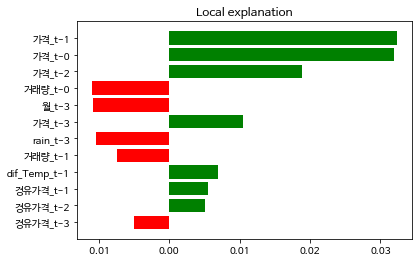

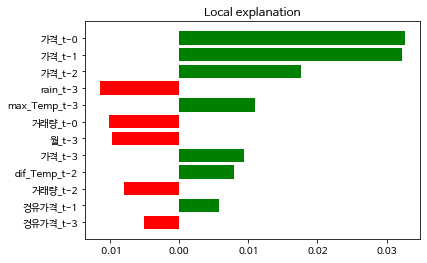

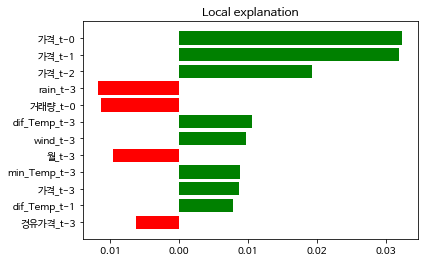

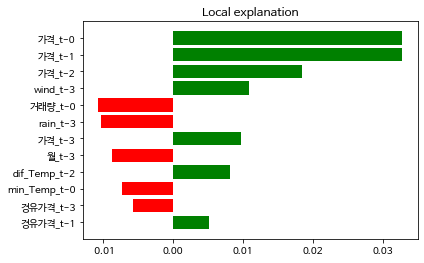

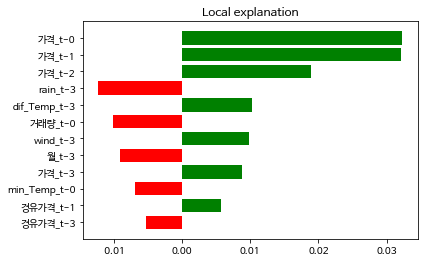

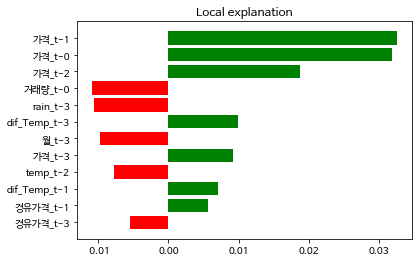

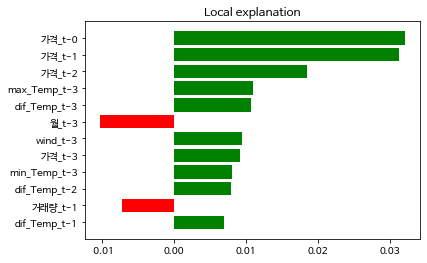

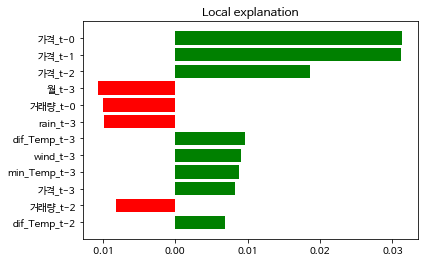

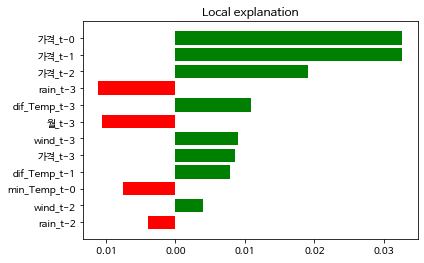

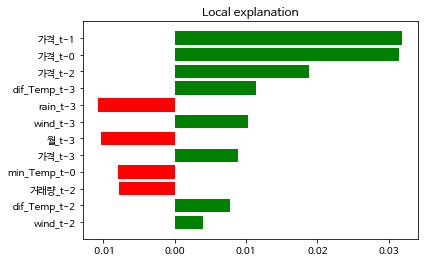

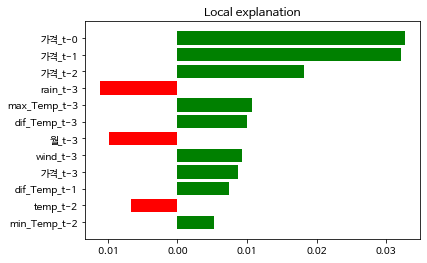

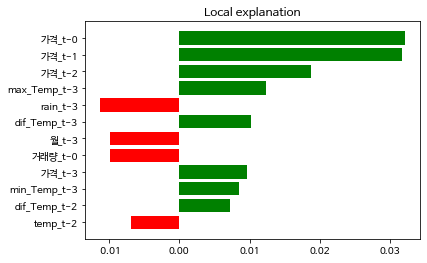

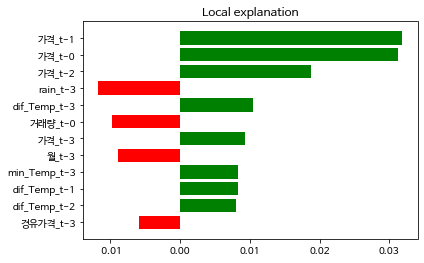

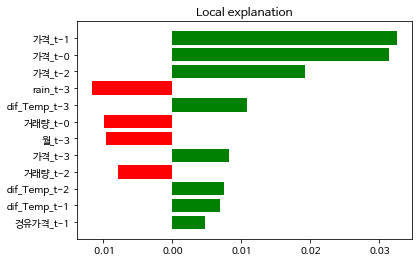

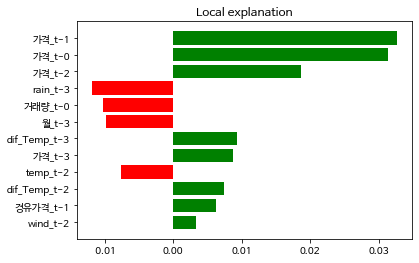

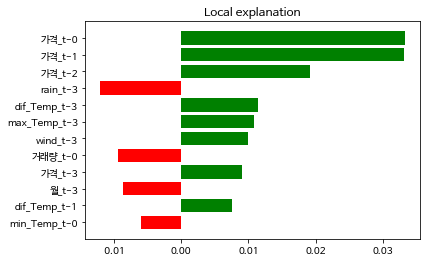

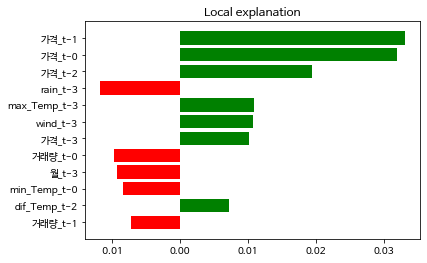

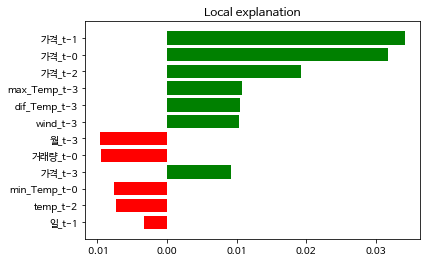

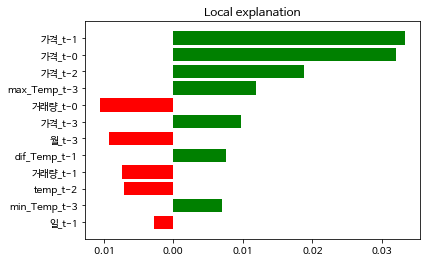

In [ ]:
WINDOW_SIZE=4
BATCH_SIZE=32
print('--------------- window size = {} ----------------------'.format(WINDOW_SIZE))
train_data = windowed_dataset(x_train, y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(x_test, y_test, WINDOW_SIZE, BATCH_SIZE, False)

# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

    
model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
        padding="causal",
        activation="relu",
        input_shape=[WINDOW_SIZE, x_train.shape[1]]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

# early stopping
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 50)

model_name = 'model_' + 'onion' + str(WINDOW_SIZE) + '.h5'   
checkpoint = ModelCheckpoint(model_name,             # file명을 지정합니다
                            monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다         
                            save_best_only=True,  # 가장 best 값만 저장합니다
                            mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )


history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=200, verbose=0, callbacks = [checkpoint, earlystopping])

model = tf.keras.models.load_model(model_name)
# 예측
pred = model.predict(test_data)

##  NMAE 계산

nmae_df = pd.concat([pd.Series(pred.ravel()),y_test[WINDOW_SIZE:].reset_index(drop = True)], axis = 1)
nmae_df.columns = ['pred', 'true']

df11 = pd.concat([nmae_df['pred'], x_test.reset_index(drop = True)], axis = 1)[:-WINDOW_SIZE]
df10 = pd.concat([nmae_df['true'], x_test.reset_index(drop = True)], axis = 1)[:-WINDOW_SIZE]

# inverse scaling --> true_val : 실제 가격, pred_val : 예측한 가격
true_val = pd.DataFrame(scaler2.inverse_transform(df10))[0]
pred_val = pd.DataFrame(scaler2.inverse_transform(df11))[0]
# df20 : inverse scaling 한 pred와 true값을 지닌 df
df20 = pd.concat([true_val, pred_val], axis = 1)
df20.columns = ['true', 'pred']
nmae(df20) # nmae 계산


# 그래프 그리기
df9 = nmae_df.query('true != 0')
plt.figure(figsize=(8, 6))
plt.plot(df9['true'], label='actual')
plt.plot(df9['pred'], label='prediction')
plt.legend()
plt.show()


# loss 그래프
plt.plot(history.history['loss'], c = 'r', label='train')
plt.plot(history.history['val_loss'], c = 'b', label='test')
plt.legend()
plt.show()
print()





ttt = np.array(list(map(lambda x: x[0].numpy(), train_data)))[0]
ttt2 = np.array(list(map(lambda x: x[0].numpy(), test_data)))[0]
explainer = lime_tabular.RecurrentTabularExplainer(ttt, feature_names=x_train.columns, mode='regression',discretize_continuous=False)
for i in range(32):
    exp = explainer.explain_instance(ttt2[i,:,:], model.predict, num_features=len(x_train.columns))
    exp.as_pyplot_figure()

# 건고추

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_gungochu.drop('1_week', 1), df_gungochu['1_week'], test_size=0.2, random_state=0, shuffle=False)

--------------- window size = 11 ----------------------
데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 11, 12)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32,)
NMAE : 30.686436427602537


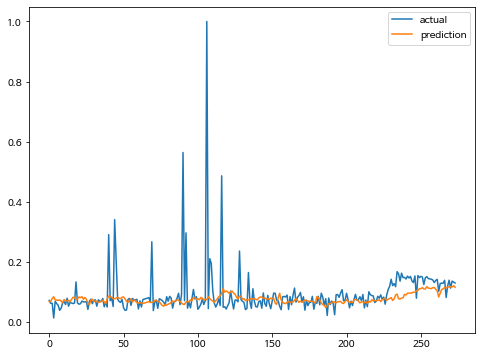

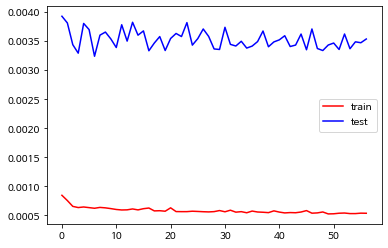

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/lime/explanation.py:168: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/

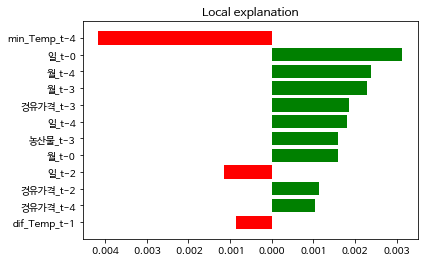

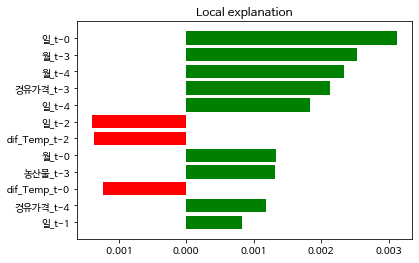

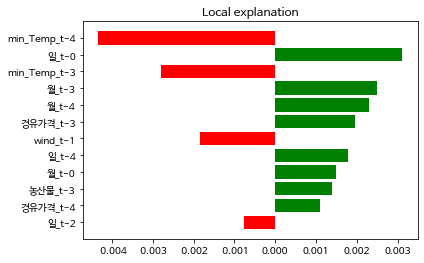

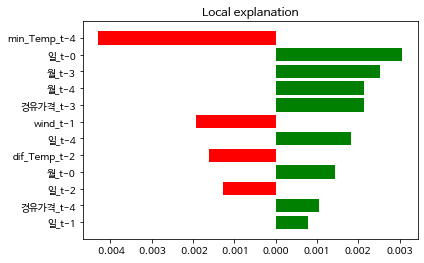

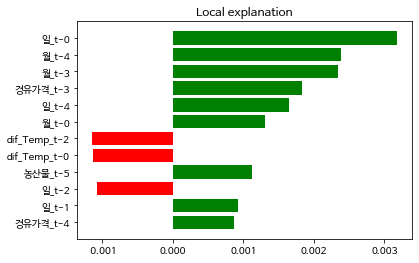

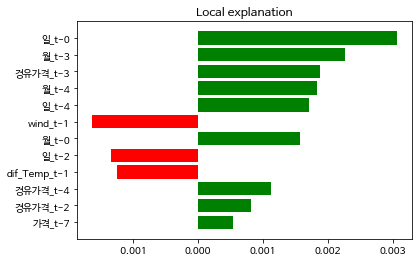

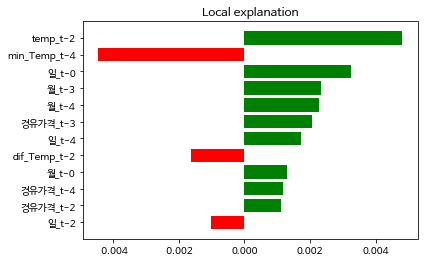

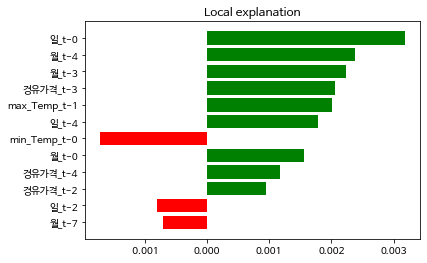

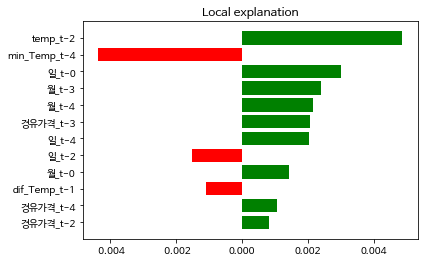

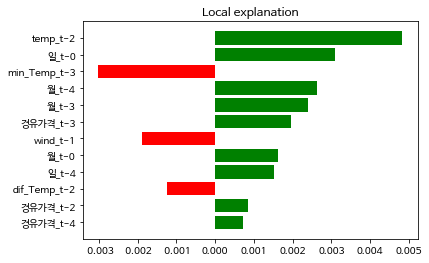

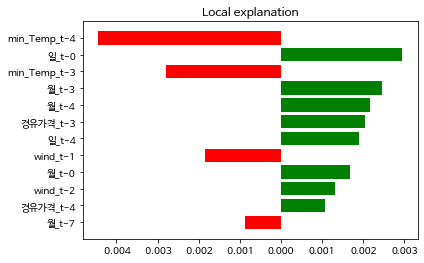

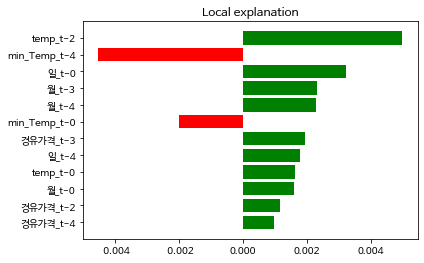

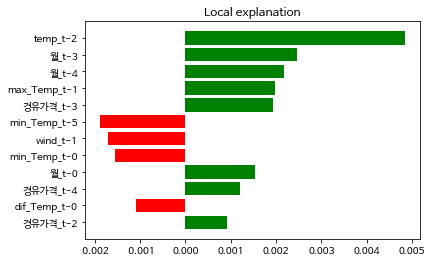

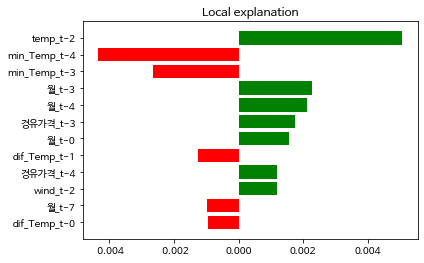

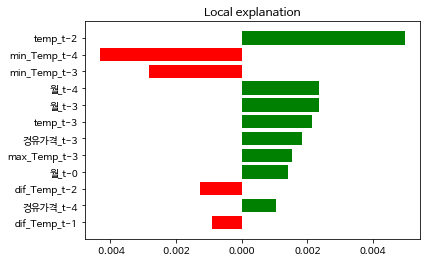

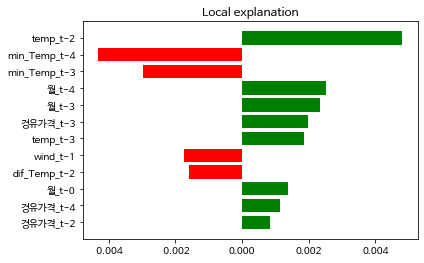

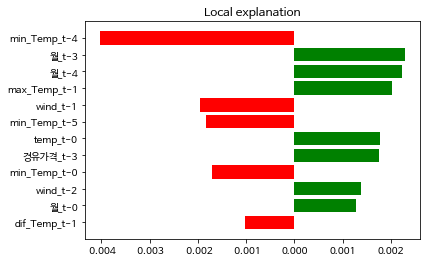

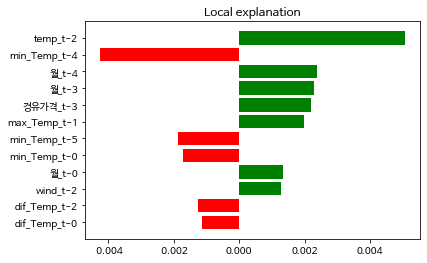

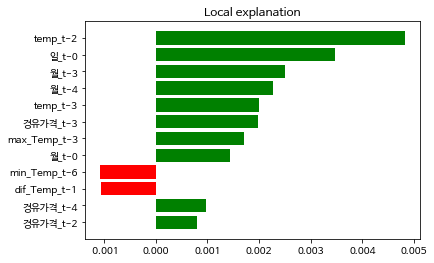

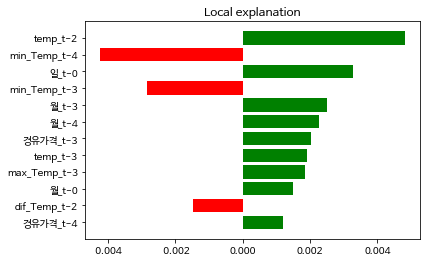

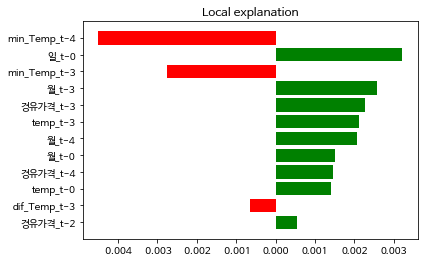

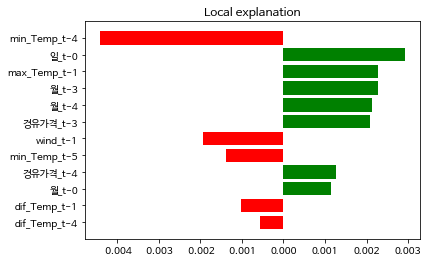

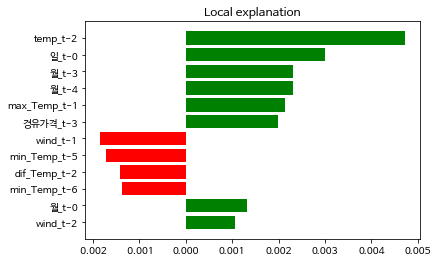

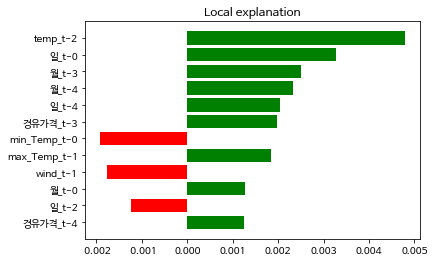

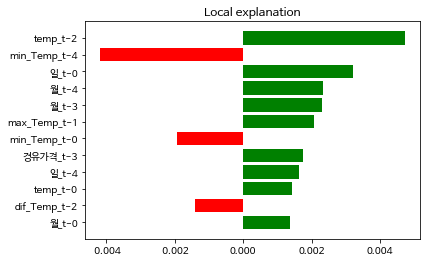

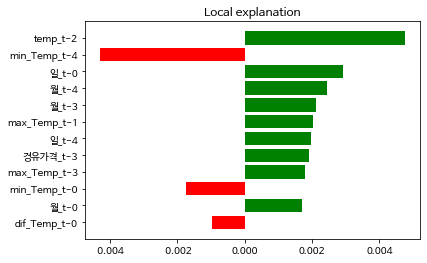

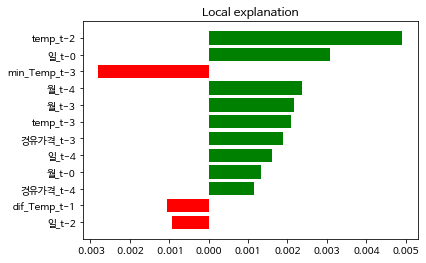

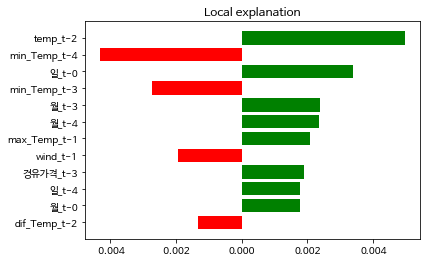

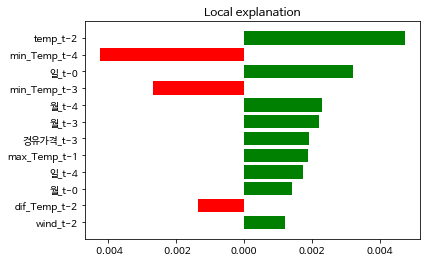

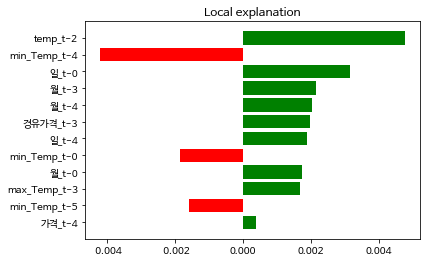

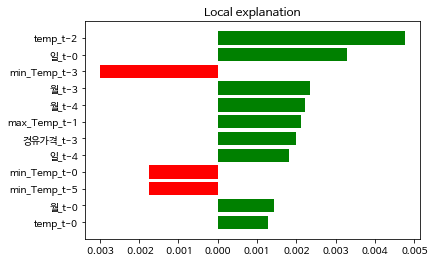

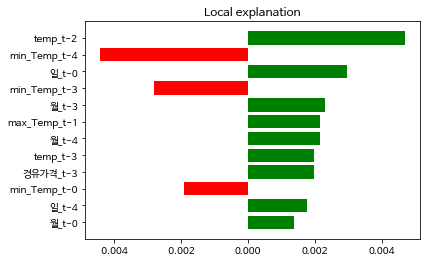

In [ ]:
WINDOW_SIZE=11
BATCH_SIZE=32
print('--------------- window size = {} ----------------------'.format(WINDOW_SIZE))
train_data = windowed_dataset(x_train, y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(x_test, y_test, WINDOW_SIZE, BATCH_SIZE, False)

# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

    
model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
        padding="causal",
        activation="relu",
        input_shape=[WINDOW_SIZE, x_train.shape[1]]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

# early stopping
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 50)

model_name = 'model_' + 'gungochu' + str(WINDOW_SIZE) + '.h5'  
checkpoint = ModelCheckpoint(model_name,             # file명을 지정합니다
                            monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다         
                            save_best_only=True,  # 가장 best 값만 저장합니다
                            mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )


history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=200, verbose=0, callbacks = [checkpoint, earlystopping])

model = tf.keras.models.load_model(model_name)
# 예측
pred = model.predict(test_data)

##  NMAE 계산

nmae_df = pd.concat([pd.Series(pred.ravel()),y_test[WINDOW_SIZE:].reset_index(drop = True)], axis = 1)
nmae_df.columns = ['pred', 'true']

df11 = pd.concat([nmae_df['pred'], x_test.reset_index(drop = True)], axis = 1)[:-WINDOW_SIZE]
df10 = pd.concat([nmae_df['true'], x_test.reset_index(drop = True)], axis = 1)[:-WINDOW_SIZE]

# inverse scaling --> true_val : 실제 가격, pred_val : 예측한 가격
true_val = pd.DataFrame(scaler3.inverse_transform(df10))[0]
pred_val = pd.DataFrame(scaler3.inverse_transform(df11))[0]
# df20 : inverse scaling 한 pred와 true값을 지닌 df
df20 = pd.concat([true_val, pred_val], axis = 1)
df20.columns = ['true', 'pred']
nmae(df20) # nmae 계산


# 그래프 그리기
df9 = nmae_df.query('true != 0')
plt.figure(figsize=(8, 6))
plt.plot(df9['true'], label='actual')
plt.plot(df9['pred'], label='prediction')
plt.legend()
plt.show()


# loss 그래프
plt.plot(history.history['loss'], c = 'r', label='train')
plt.plot(history.history['val_loss'], c = 'b', label='test')
plt.legend()
plt.show()
print()





ttt = np.array(list(map(lambda x: x[0].numpy(), train_data)))[0]
ttt2 = np.array(list(map(lambda x: x[0].numpy(), test_data)))[0]
explainer = lime_tabular.RecurrentTabularExplainer(ttt, feature_names=x_train.columns, mode='regression',discretize_continuous=False)
for i in range(32):
    exp = explainer.explain_instance(ttt2[i,:,:], model.predict, num_features=len(x_train.columns))
    exp.as_pyplot_figure()


# 마늘

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_maneul.drop('1_week', 1), df_maneul['1_week'], test_size=0.2, random_state=0, shuffle=False)

--------------- window size = 7 ----------------------
데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 7, 12)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32,)
NMAE : 0.14288004598615775


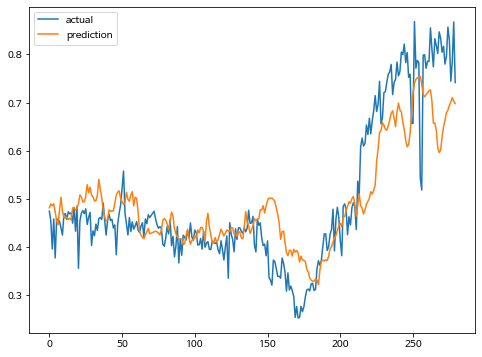

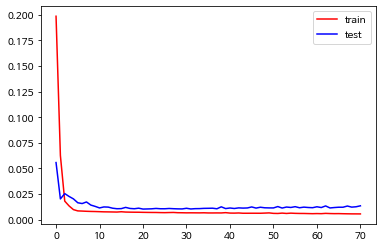

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/lime/explanation.py:168: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/

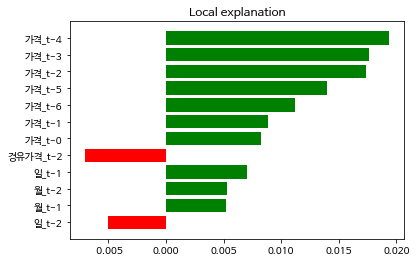

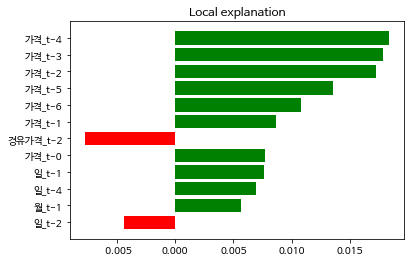

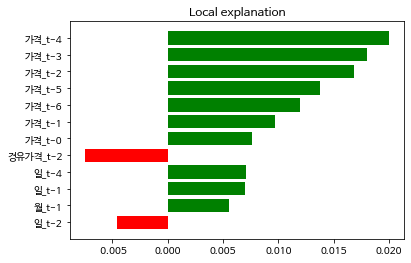

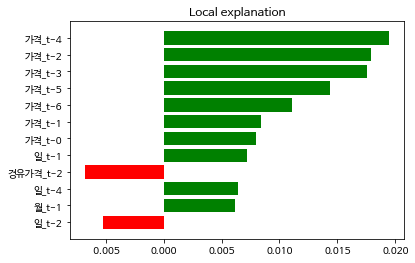

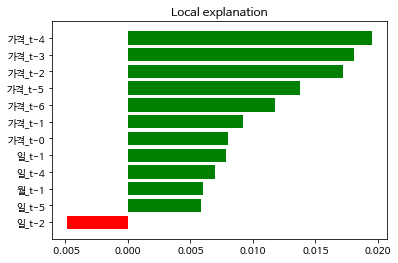

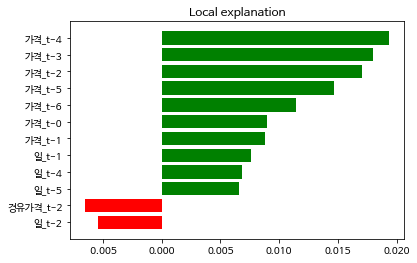

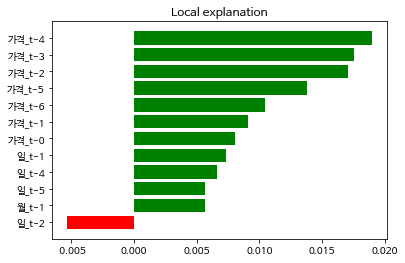

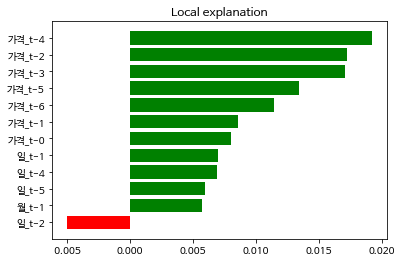

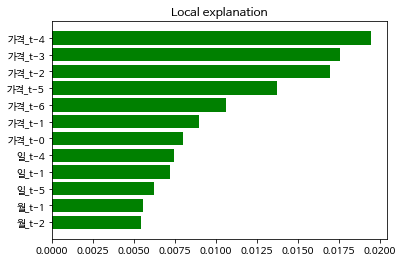

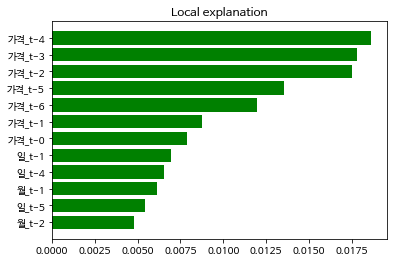

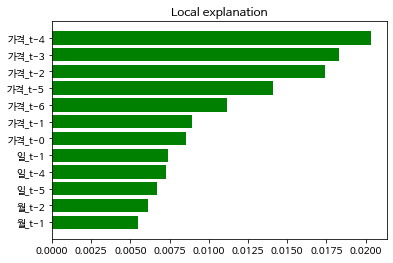

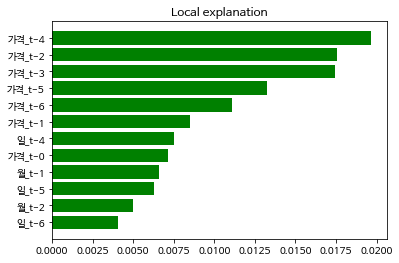

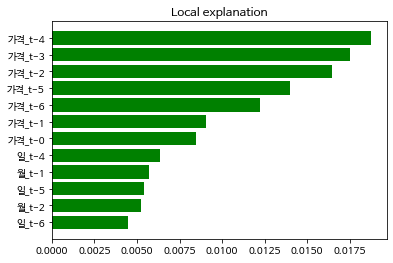

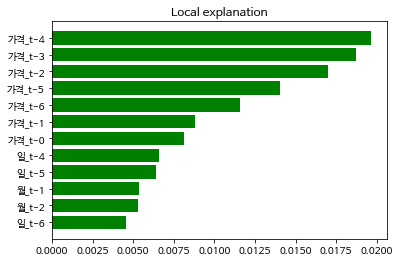

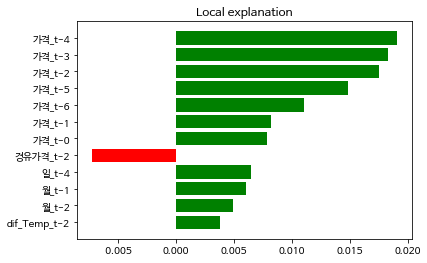

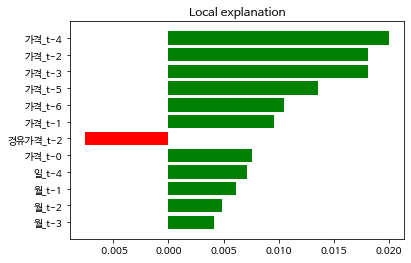

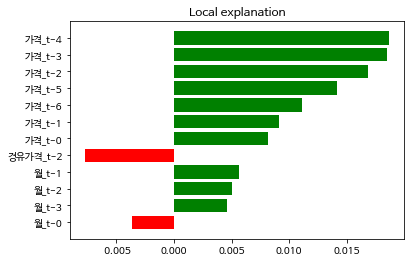

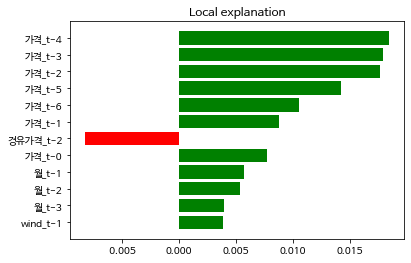

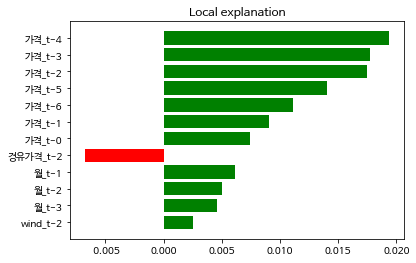

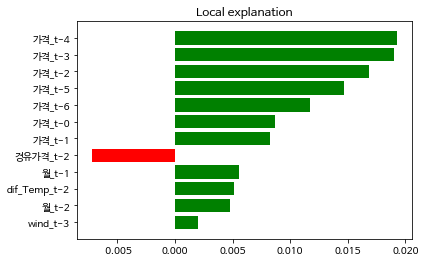

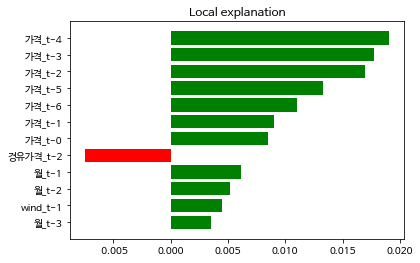

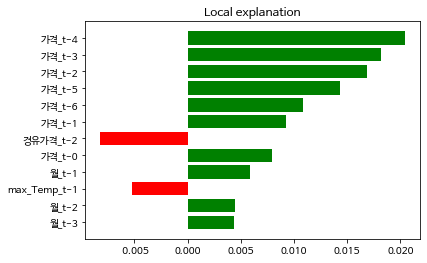

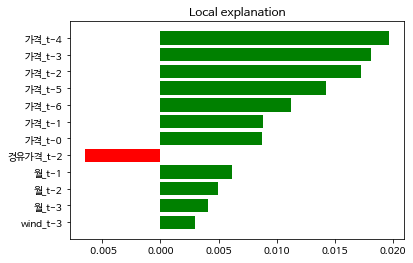

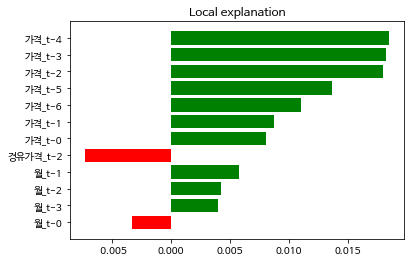

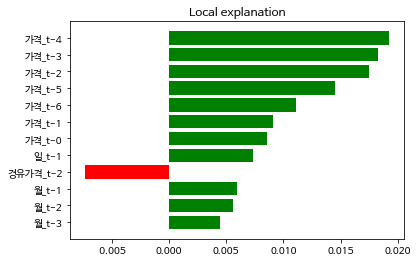

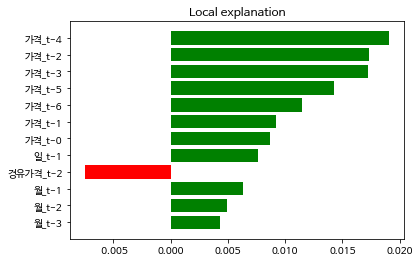

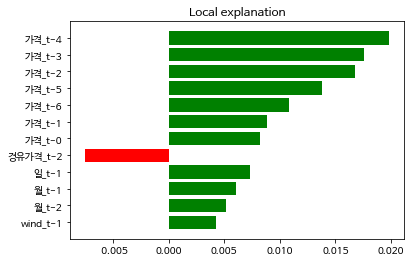

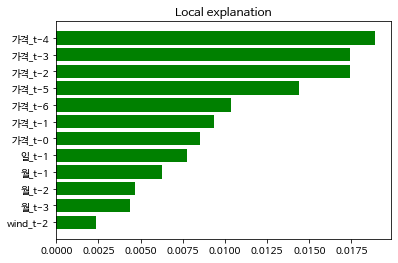

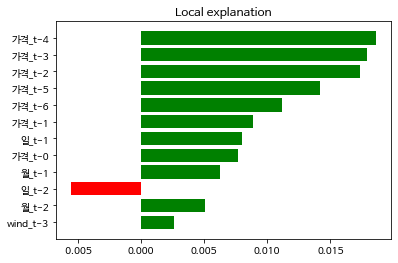

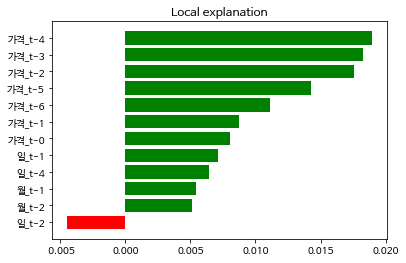

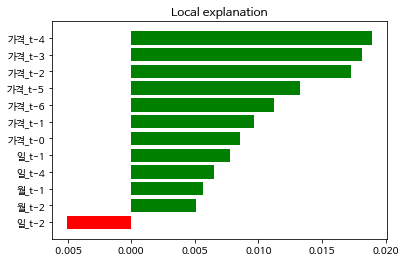

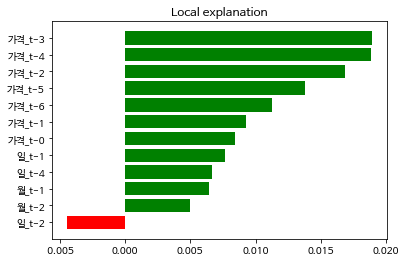

In [ ]:
WINDOW_SIZE=7
BATCH_SIZE=32
print('--------------- window size = {} ----------------------'.format(WINDOW_SIZE))
train_data = windowed_dataset(x_train, y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(x_test, y_test, WINDOW_SIZE, BATCH_SIZE, False)

# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

    
model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
        padding="causal",
        activation="relu",
        input_shape=[WINDOW_SIZE, x_train.shape[1]]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

# early stopping
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 50)

model_name = 'model_' + 'maneul' + str(WINDOW_SIZE) + '.h5'  
checkpoint = ModelCheckpoint(model_name,             # file명을 지정합니다
                            monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다         
                            save_best_only=True,  # 가장 best 값만 저장합니다
                            mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )


history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=200, verbose=0, callbacks = [checkpoint, earlystopping])

model = tf.keras.models.load_model(model_name)
# 예측
pred = model.predict(test_data)

##  NMAE 계산

nmae_df = pd.concat([pd.Series(pred.ravel()),y_test[WINDOW_SIZE:].reset_index(drop = True)], axis = 1)
nmae_df.columns = ['pred', 'true']

df11 = pd.concat([nmae_df['pred'], x_test.reset_index(drop = True)], axis = 1)[:-WINDOW_SIZE]
df10 = pd.concat([nmae_df['true'], x_test.reset_index(drop = True)], axis = 1)[:-WINDOW_SIZE]

# inverse scaling --> true_val : 실제 가격, pred_val : 예측한 가격
true_val = pd.DataFrame(scaler4.inverse_transform(df10))[0]
pred_val = pd.DataFrame(scaler4.inverse_transform(df11))[0]
# df20 : inverse scaling 한 pred와 true값을 지닌 df
df20 = pd.concat([true_val, pred_val], axis = 1)
df20.columns = ['true', 'pred']
nmae(df20) # nmae 계산


# 그래프 그리기
df9 = nmae_df.query('true != 0')
plt.figure(figsize=(8, 6))
plt.plot(df9['true'], label='actual')
plt.plot(df9['pred'], label='prediction')
plt.legend()
plt.show()


# loss 그래프
plt.plot(history.history['loss'], c = 'r', label='train')
plt.plot(history.history['val_loss'], c = 'b', label='test')
plt.legend()
plt.show()
print()





ttt = np.array(list(map(lambda x: x[0].numpy(), train_data)))[0]
ttt2 = np.array(list(map(lambda x: x[0].numpy(), test_data)))[0]
explainer = lime_tabular.RecurrentTabularExplainer(ttt, feature_names=x_train.columns, mode='regression',discretize_continuous=False)
for i in range(32):
    exp = explainer.explain_instance(ttt2[i,:,:], model.predict, num_features=len(x_train.columns))
    exp.as_pyplot_figure()


# 대파

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_daepa.drop('1_week', 1), df_daepa['1_week'], test_size=0.2, random_state=0, shuffle=False)

--------------- window size = 6 ----------------------
데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 6, 12)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32,)
NMAE : 0.17300015099021687


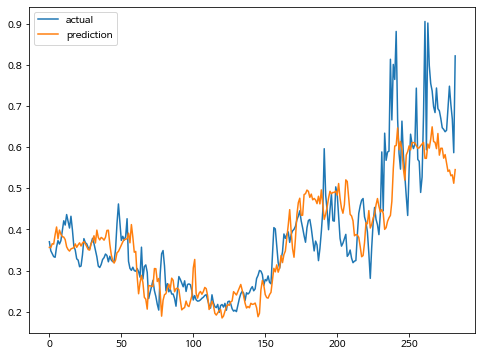

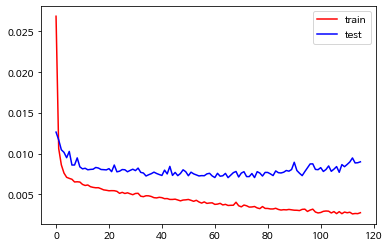

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/lime/explanation.py:168: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/

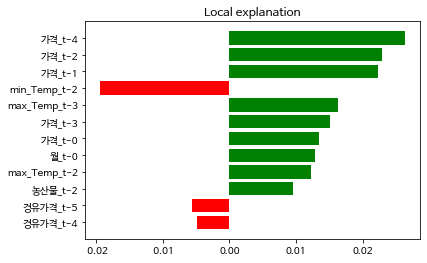

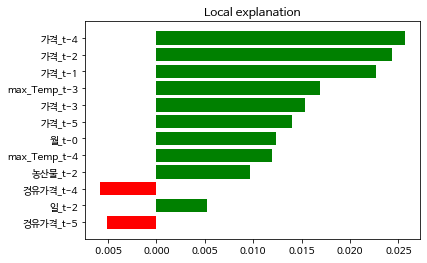

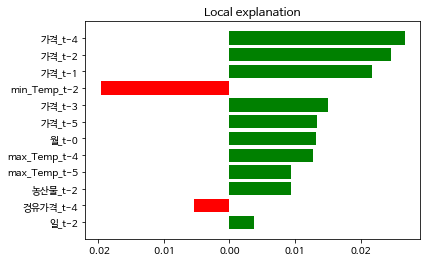

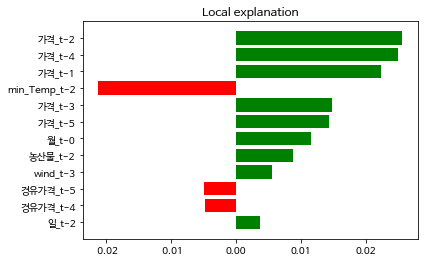

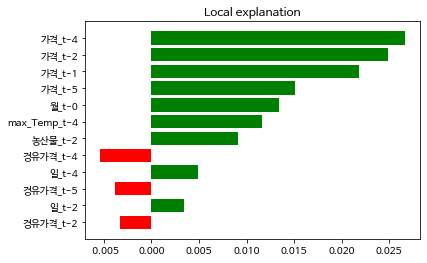

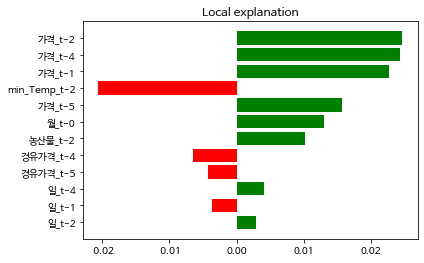

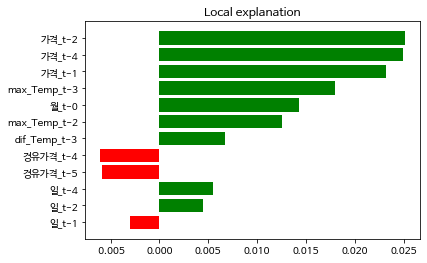

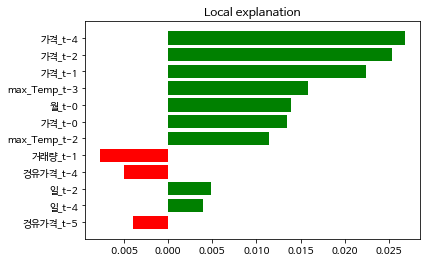

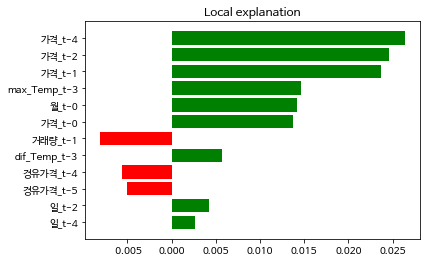

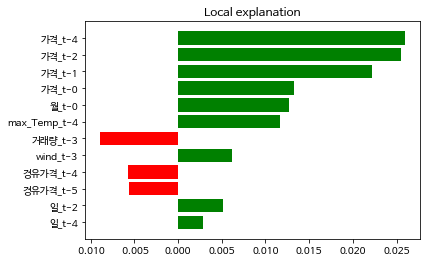

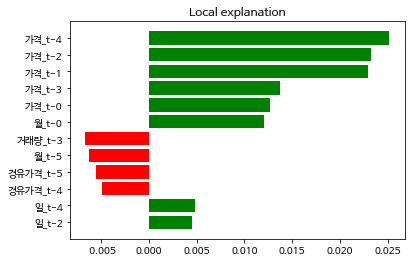

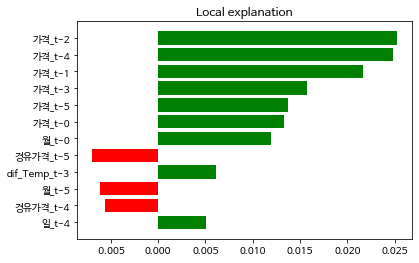

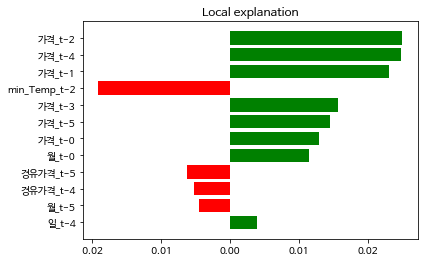

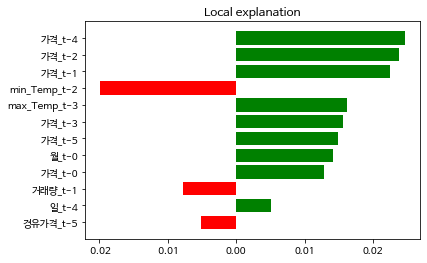

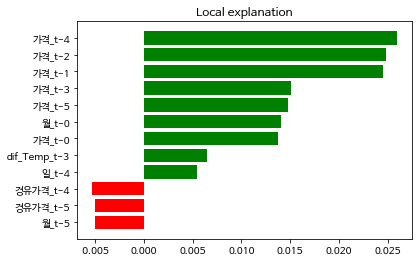

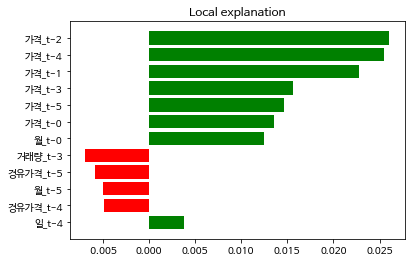

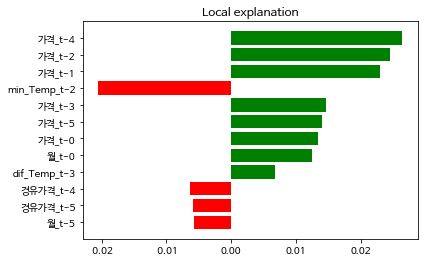

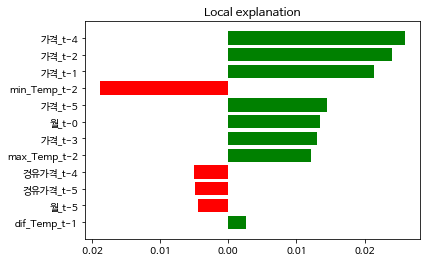

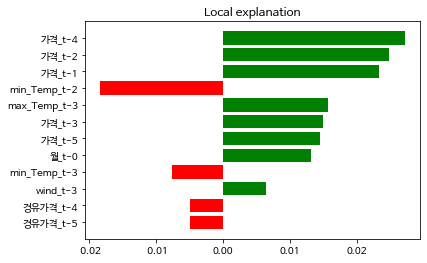

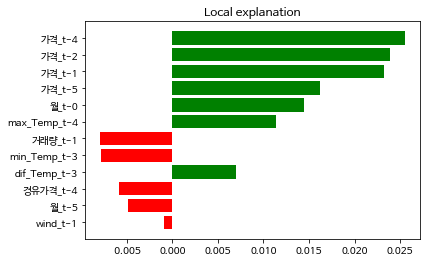

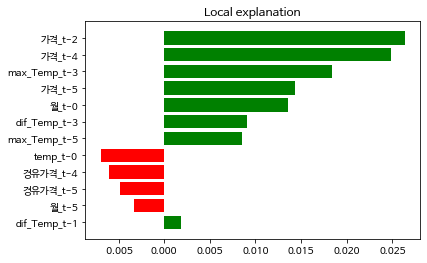

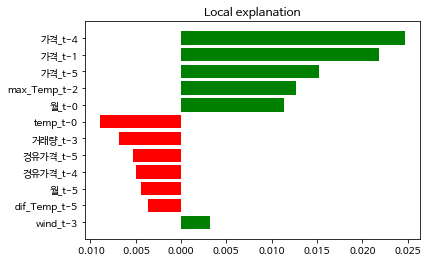

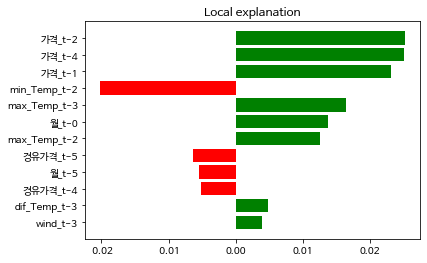

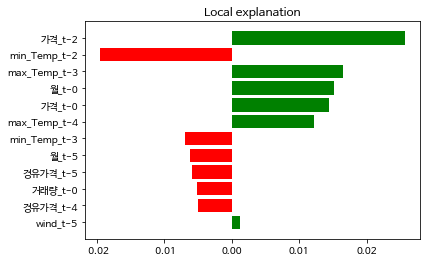

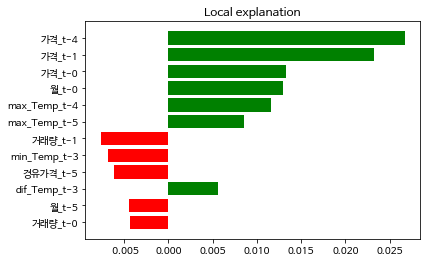

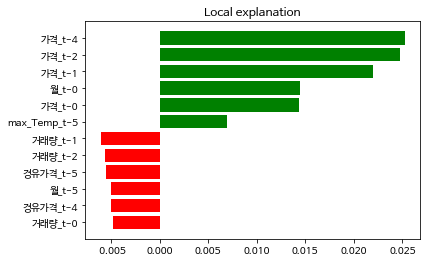

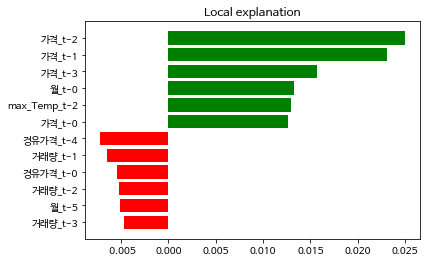

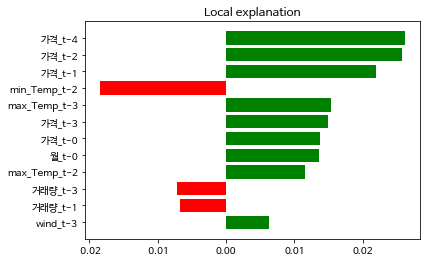

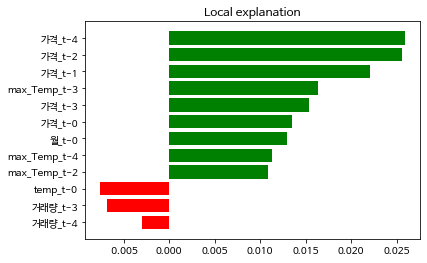

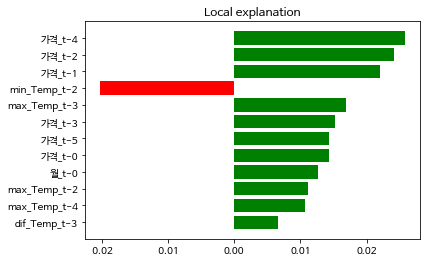

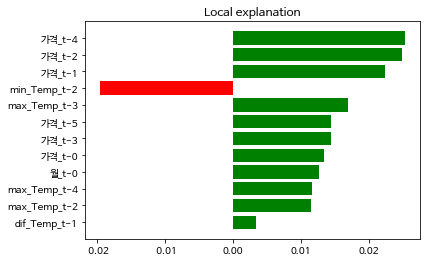

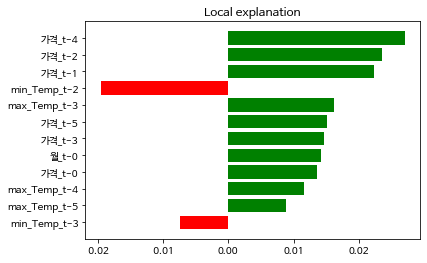

In [ ]:
WINDOW_SIZE=6
BATCH_SIZE=32
print('--------------- window size = {} ----------------------'.format(WINDOW_SIZE))
train_data = windowed_dataset(x_train, y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(x_test, y_test, WINDOW_SIZE, BATCH_SIZE, False)

# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

    
model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
        padding="causal",
        activation="relu",
        input_shape=[WINDOW_SIZE, x_train.shape[1]]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

# early stopping
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 50)

model_name = 'model_' + 'daepa' + str(WINDOW_SIZE) + '.h5'  
checkpoint = ModelCheckpoint(model_name,             # file명을 지정합니다
                            monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다         
                            save_best_only=True,  # 가장 best 값만 저장합니다
                            mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )


history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=200, verbose=0, callbacks = [checkpoint, earlystopping])

model = tf.keras.models.load_model(model_name)
# 예측
pred = model.predict(test_data)

##  NMAE 계산

nmae_df = pd.concat([pd.Series(pred.ravel()),y_test[WINDOW_SIZE:].reset_index(drop = True)], axis = 1)
nmae_df.columns = ['pred', 'true']

df11 = pd.concat([nmae_df['pred'], x_test.reset_index(drop = True)], axis = 1)[:-WINDOW_SIZE]
df10 = pd.concat([nmae_df['true'], x_test.reset_index(drop = True)], axis = 1)[:-WINDOW_SIZE]

# inverse scaling --> true_val : 실제 가격, pred_val : 예측한 가격
true_val = pd.DataFrame(scaler5.inverse_transform(df10))[0]
pred_val = pd.DataFrame(scaler5.inverse_transform(df11))[0]
# df20 : inverse scaling 한 pred와 true값을 지닌 df
df20 = pd.concat([true_val, pred_val], axis = 1)
df20.columns = ['true', 'pred']
nmae(df20) # nmae 계산


# 그래프 그리기
df9 = nmae_df.query('true != 0')
plt.figure(figsize=(8, 6))
plt.plot(df9['true'], label='actual')
plt.plot(df9['pred'], label='prediction')
plt.legend()
plt.show()


# loss 그래프
plt.plot(history.history['loss'], c = 'r', label='train')
plt.plot(history.history['val_loss'], c = 'b', label='test')
plt.legend()
plt.show()
print()





ttt = np.array(list(map(lambda x: x[0].numpy(), train_data)))[0]
ttt2 = np.array(list(map(lambda x: x[0].numpy(), test_data)))[0]
explainer = lime_tabular.RecurrentTabularExplainer(ttt, feature_names=x_train.columns, mode='regression',discretize_continuous=False)
for i in range(32):
    exp = explainer.explain_instance(ttt2[i,:,:], model.predict, num_features=len(x_train.columns))
    exp.as_pyplot_figure()

# 얼갈이 배추

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_eolbaechu.drop('1_week', 1), df_eolbaechu['1_week'], test_size=0.2, random_state=0, shuffle=False)

--------------- window size = 5 ----------------------
데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 5, 12)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32,)
NMAE : 0.24395387592944398


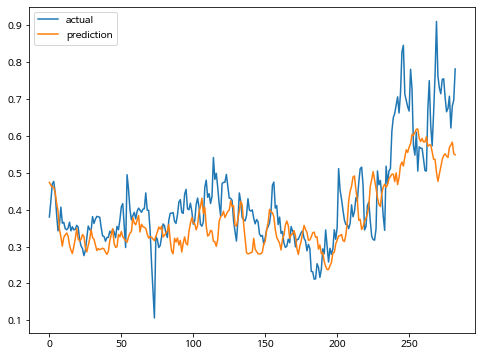

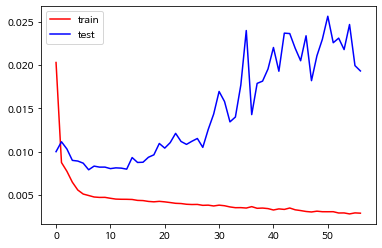

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/lime/explanation.py:168: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/

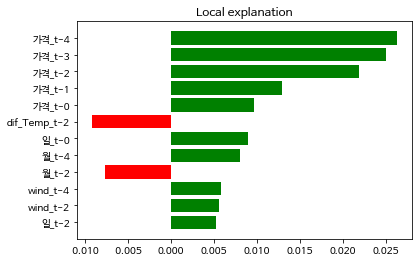

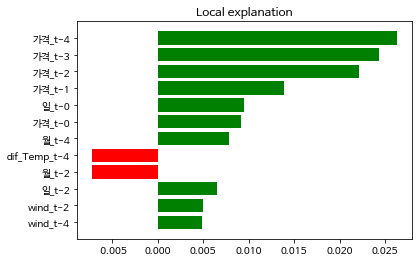

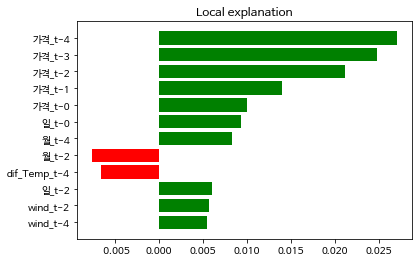

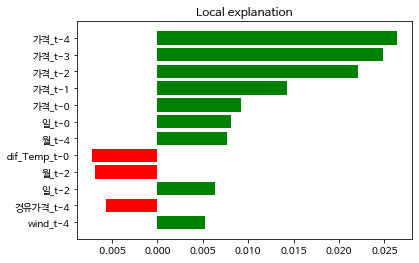

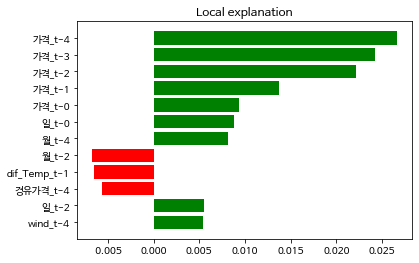

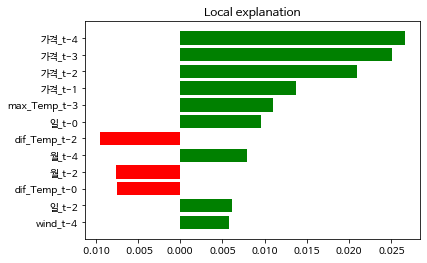

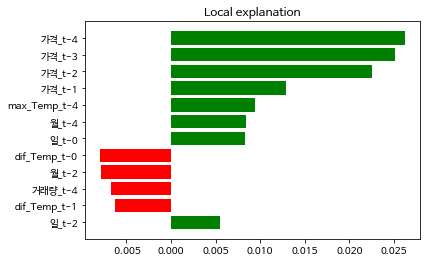

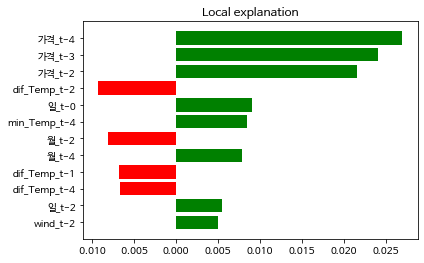

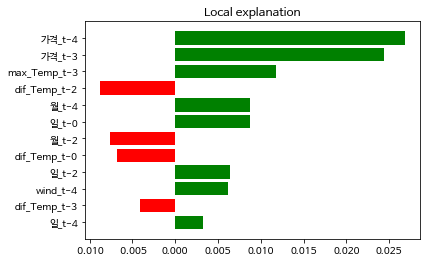

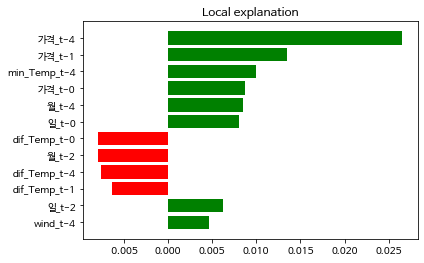

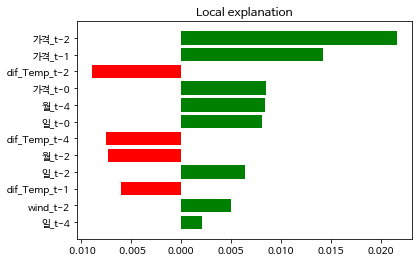

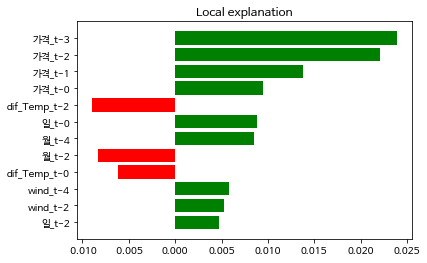

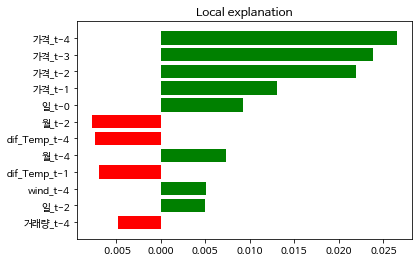

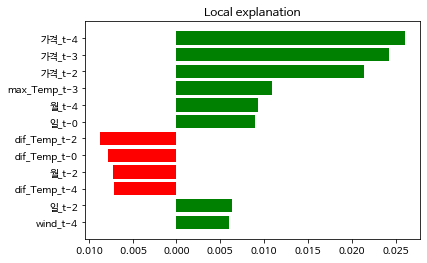

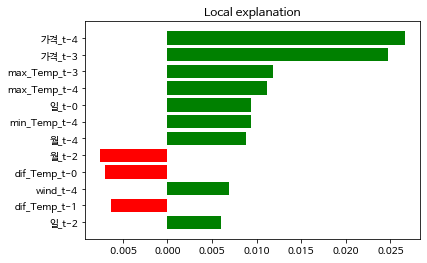

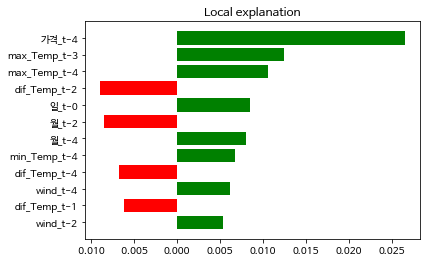

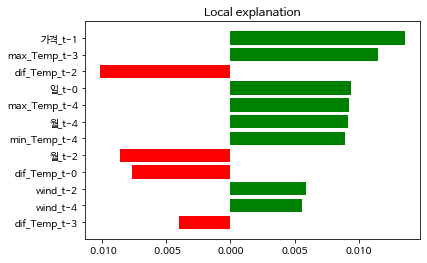

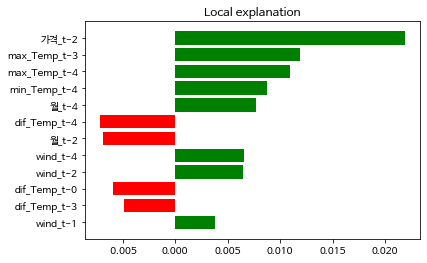

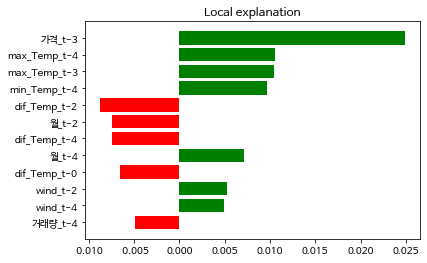

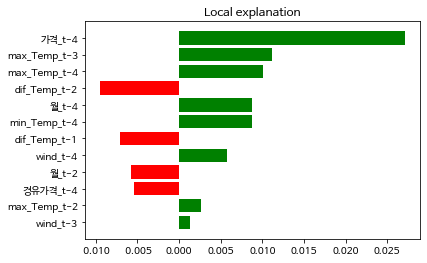

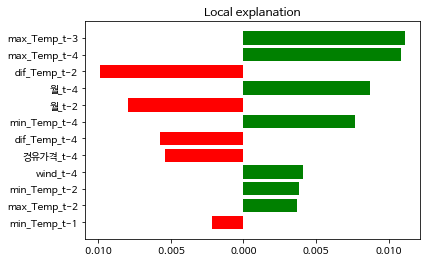

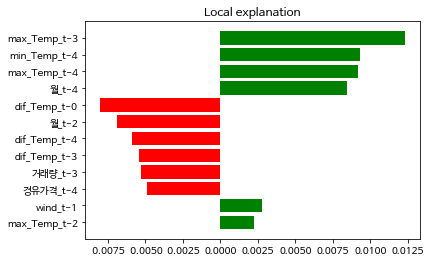

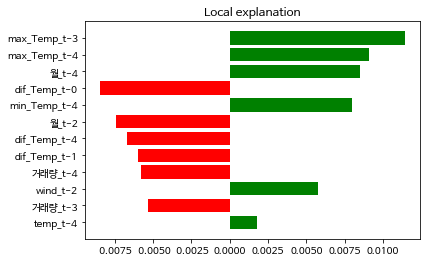

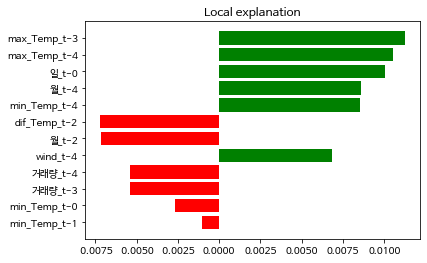

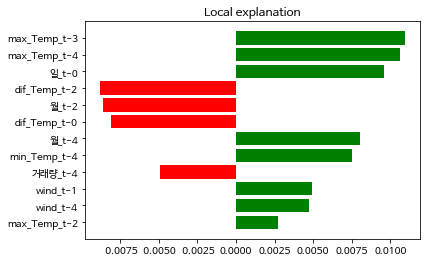

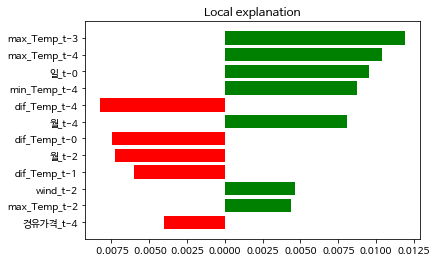

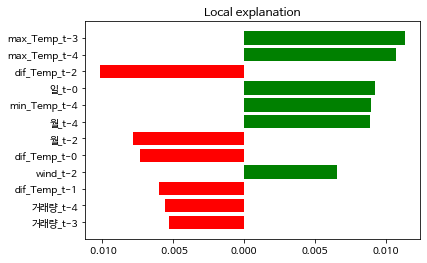

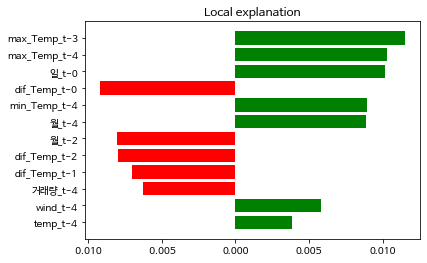

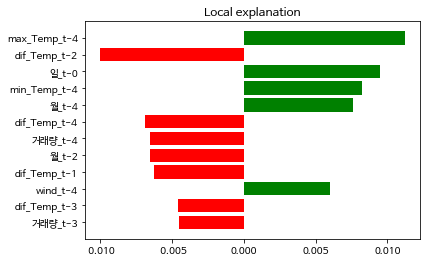

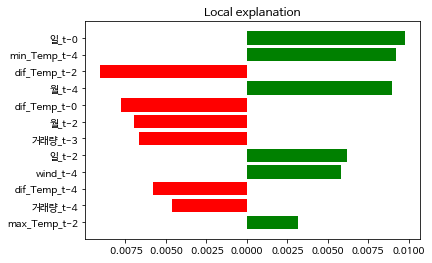

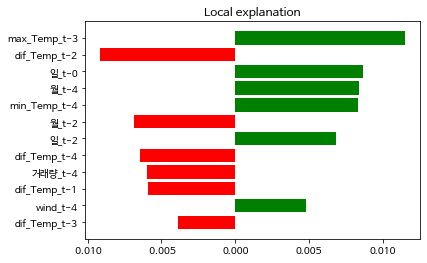

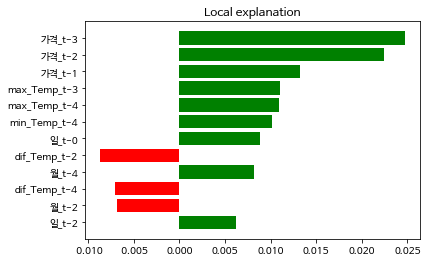

In [ ]:
WINDOW_SIZE=5
BATCH_SIZE=32
print('--------------- window size = {} ----------------------'.format(WINDOW_SIZE))
train_data = windowed_dataset(x_train, y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(x_test, y_test, WINDOW_SIZE, BATCH_SIZE, False)

# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

    
model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
        padding="causal",
        activation="relu",
        input_shape=[WINDOW_SIZE, x_train.shape[1]]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

# early stopping
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 50)

model_name = 'model_' + 'eolbaechu' + str(WINDOW_SIZE) + '.h5'  
checkpoint = ModelCheckpoint(model_name,             # file명을 지정합니다
                            monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다         
                            save_best_only=True,  # 가장 best 값만 저장합니다
                            mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )


history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=200, verbose=0, callbacks = [checkpoint, earlystopping])

model = tf.keras.models.load_model(model_name)
# 예측
pred = model.predict(test_data)

##  NMAE 계산

nmae_df = pd.concat([pd.Series(pred.ravel()),y_test[WINDOW_SIZE:].reset_index(drop = True)], axis = 1)
nmae_df.columns = ['pred', 'true']

df11 = pd.concat([nmae_df['pred'], x_test.reset_index(drop = True)], axis = 1)[:-WINDOW_SIZE]
df10 = pd.concat([nmae_df['true'], x_test.reset_index(drop = True)], axis = 1)[:-WINDOW_SIZE]

# inverse scaling --> true_val : 실제 가격, pred_val : 예측한 가격
true_val = pd.DataFrame(scaler6.inverse_transform(df10))[0]
pred_val = pd.DataFrame(scaler6.inverse_transform(df11))[0]
# df20 : inverse scaling 한 pred와 true값을 지닌 df
df20 = pd.concat([true_val, pred_val], axis = 1)
df20.columns = ['true', 'pred']
nmae(df20) # nmae 계산


# 그래프 그리기
df9 = nmae_df.query('true != 0')
plt.figure(figsize=(8, 6))
plt.plot(df9['true'], label='actual')
plt.plot(df9['pred'], label='prediction')
plt.legend()
plt.show()


# loss 그래프
plt.plot(history.history['loss'], c = 'r', label='train')
plt.plot(history.history['val_loss'], c = 'b', label='test')
plt.legend()
plt.show()
print()





ttt = np.array(list(map(lambda x: x[0].numpy(), train_data)))[0]
ttt2 = np.array(list(map(lambda x: x[0].numpy(), test_data)))[0]
explainer = lime_tabular.RecurrentTabularExplainer(ttt, feature_names=x_train.columns, mode='regression',discretize_continuous=False)
for i in range(32):
    exp = explainer.explain_instance(ttt2[i,:,:], model.predict, num_features=len(x_train.columns))
    exp.as_pyplot_figure()

# 깻잎

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_leaf.drop('1_week', 1), df_leaf['1_week'], test_size=0.2, random_state=0, shuffle=False)

--------------- window size = 2 ----------------------
데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 2, 12)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32,)
NMAE : 0.23624185913964865


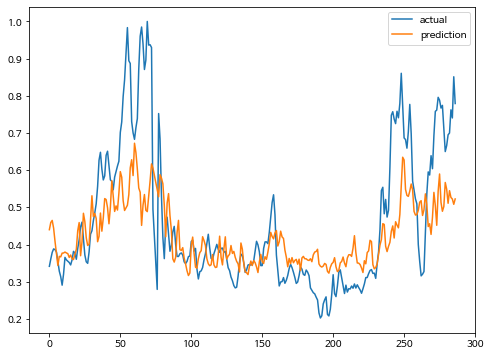

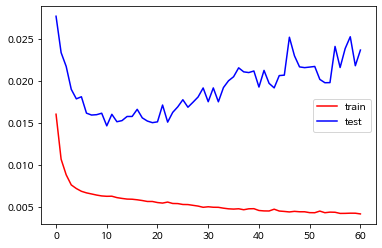

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/lime/explanation.py:168: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/

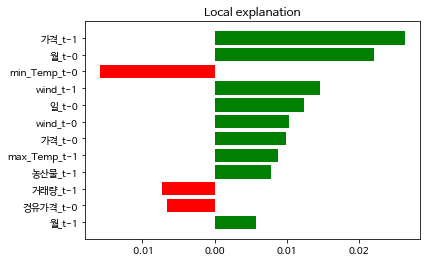

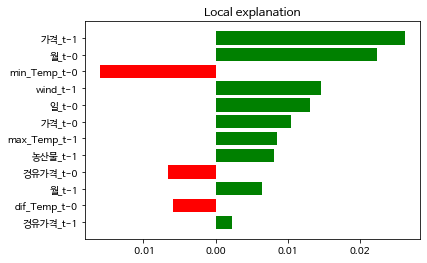

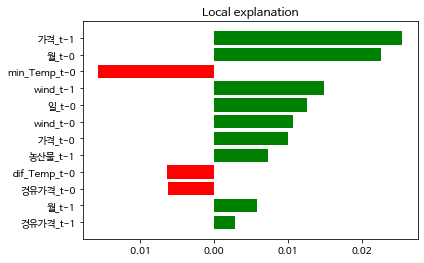

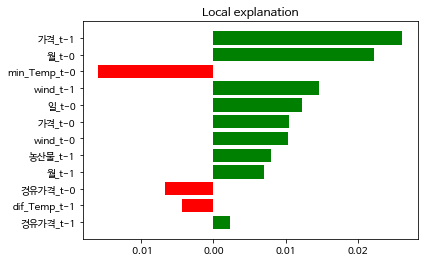

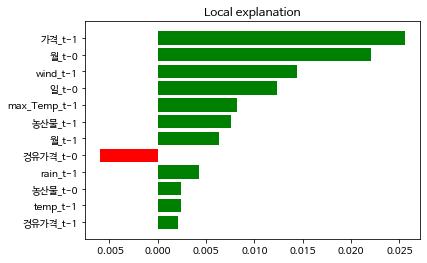

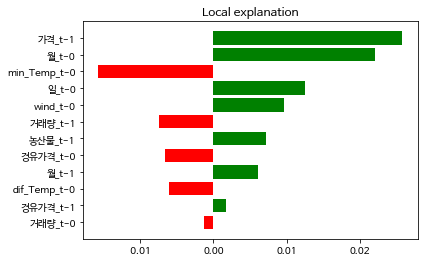

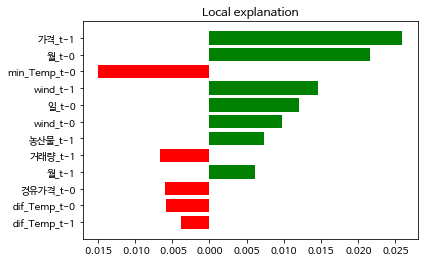

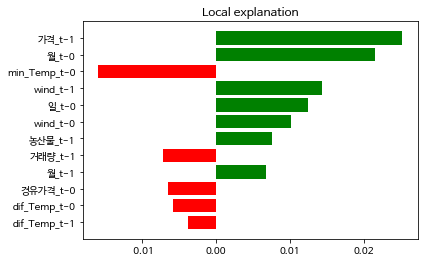

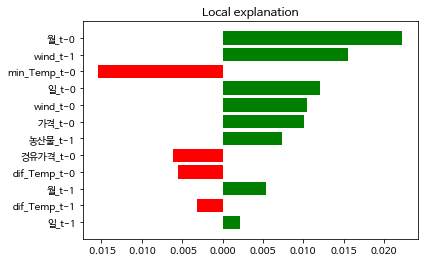

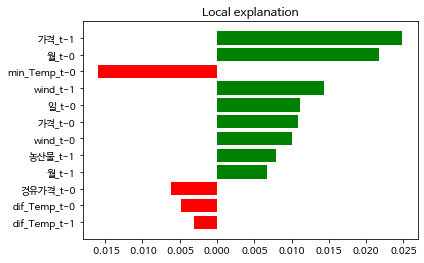

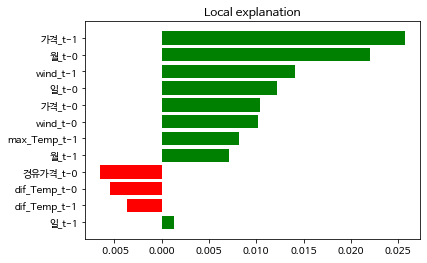

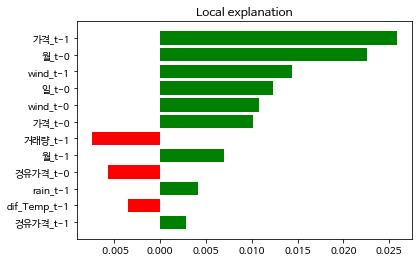

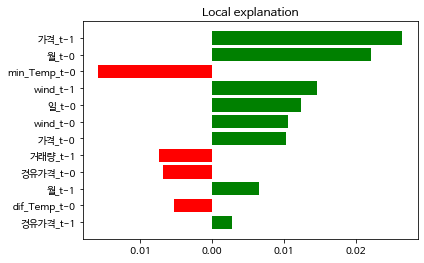

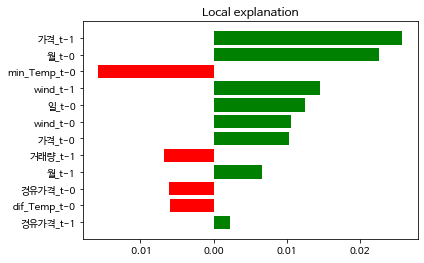

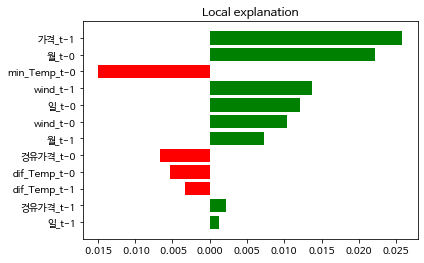

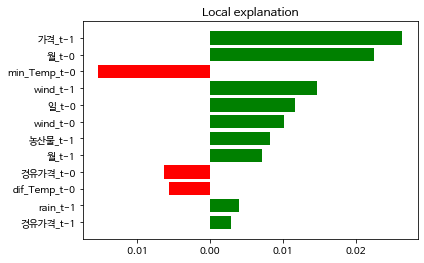

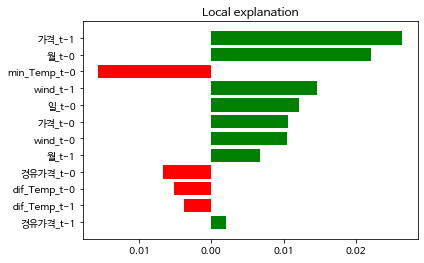

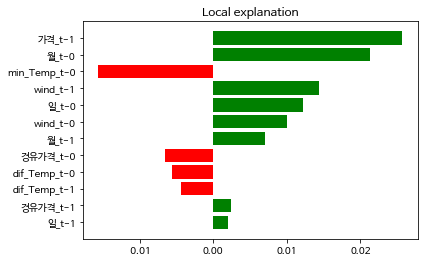

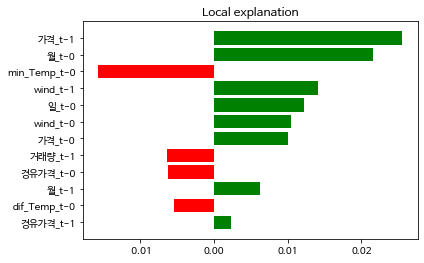

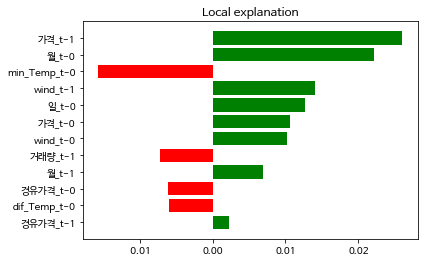

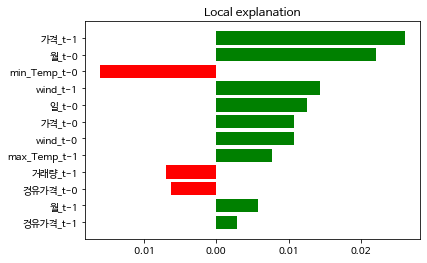

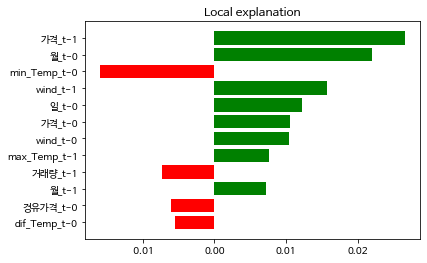

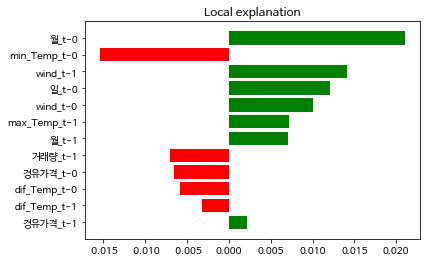

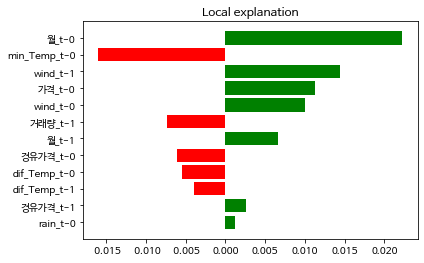

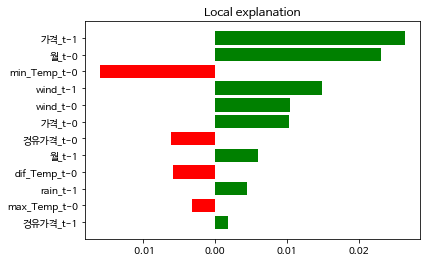

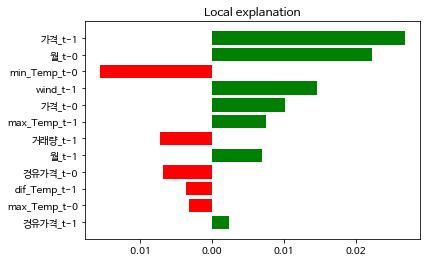

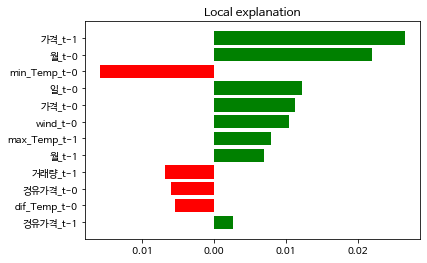

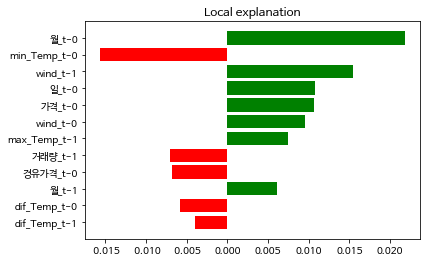

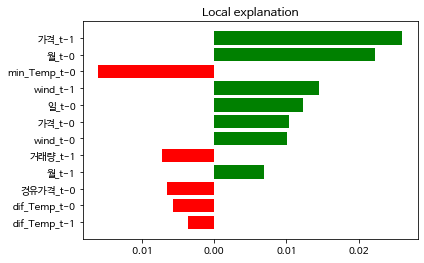

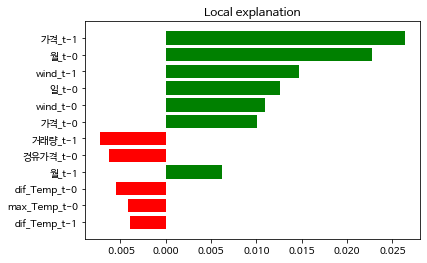

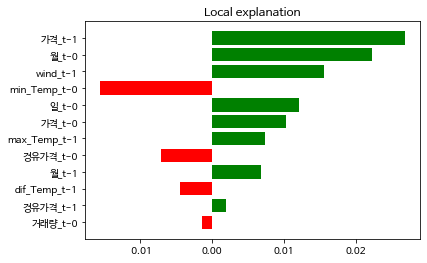

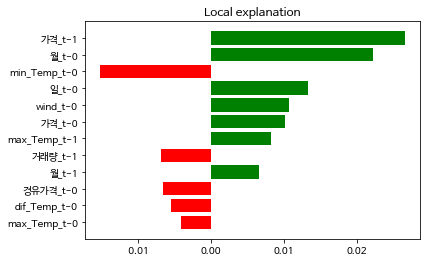

In [ ]:
WINDOW_SIZE=2
BATCH_SIZE=32
print('--------------- window size = {} ----------------------'.format(WINDOW_SIZE))
train_data = windowed_dataset(x_train, y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(x_test, y_test, WINDOW_SIZE, BATCH_SIZE, False)

# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

    
model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
        padding="causal",
        activation="relu",
        input_shape=[WINDOW_SIZE, x_train.shape[1]]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

# early stopping
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 50)

model_name = 'model_' + 'leaf' + str(WINDOW_SIZE) + '.h5'  
checkpoint = ModelCheckpoint(model_name,             # file명을 지정합니다
                            monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다         
                            save_best_only=True,  # 가장 best 값만 저장합니다
                            mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )


history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=200, verbose=0, callbacks = [checkpoint, earlystopping])

model = tf.keras.models.load_model(model_name)
# 예측
pred = model.predict(test_data)

##  NMAE 계산

nmae_df = pd.concat([pd.Series(pred.ravel()),y_test[WINDOW_SIZE:].reset_index(drop = True)], axis = 1)
nmae_df.columns = ['pred', 'true']

df11 = pd.concat([nmae_df['pred'], x_test.reset_index(drop = True)], axis = 1)[:-WINDOW_SIZE]
df10 = pd.concat([nmae_df['true'], x_test.reset_index(drop = True)], axis = 1)[:-WINDOW_SIZE]

# inverse scaling --> true_val : 실제 가격, pred_val : 예측한 가격
true_val = pd.DataFrame(scaler7.inverse_transform(df10))[0]
pred_val = pd.DataFrame(scaler7.inverse_transform(df11))[0]
# df20 : inverse scaling 한 pred와 true값을 지닌 df
df20 = pd.concat([true_val, pred_val], axis = 1)
df20.columns = ['true', 'pred']
nmae(df20) # nmae 계산


# 그래프 그리기
df9 = nmae_df.query('true != 0')
plt.figure(figsize=(8, 6))
plt.plot(df9['true'], label='actual')
plt.plot(df9['pred'], label='prediction')
plt.legend()
plt.show()


# loss 그래프
plt.plot(history.history['loss'], c = 'r', label='train')
plt.plot(history.history['val_loss'], c = 'b', label='test')
plt.legend()
plt.show()
print()





ttt = np.array(list(map(lambda x: x[0].numpy(), train_data)))[0]
ttt2 = np.array(list(map(lambda x: x[0].numpy(), test_data)))[0]
explainer = lime_tabular.RecurrentTabularExplainer(ttt, feature_names=x_train.columns, mode='regression',discretize_continuous=False)
for i in range(32):
    exp = explainer.explain_instance(ttt2[i,:,:], model.predict, num_features=len(x_train.columns))
    exp.as_pyplot_figure()

# 시금치

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_sigeumchi.drop('1_week', 1), df_sigeumchi['1_week'], test_size=0.2, random_state=0, shuffle=False)

--------------- window size = 3 ----------------------
데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 3, 12)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32,)
NMAE : 0.25493328137757165


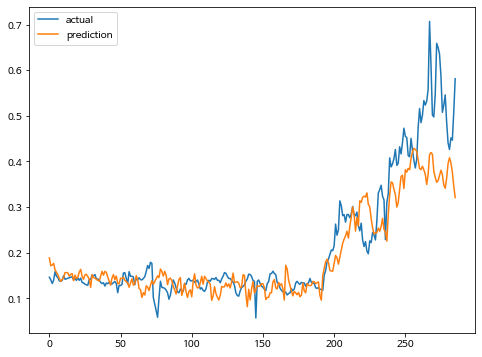

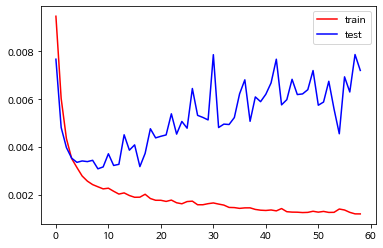

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/lime/explanation.py:168: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/

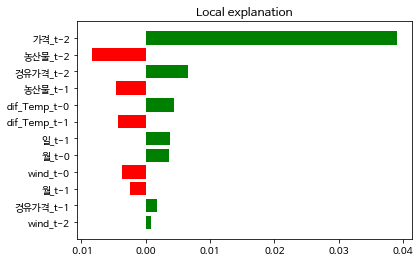

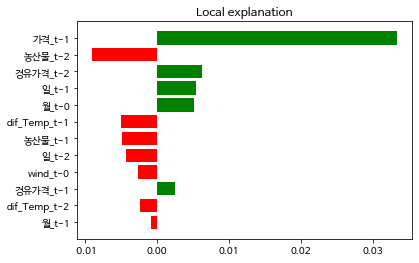

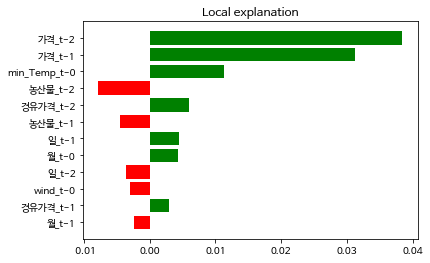

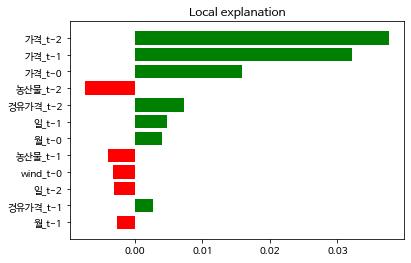

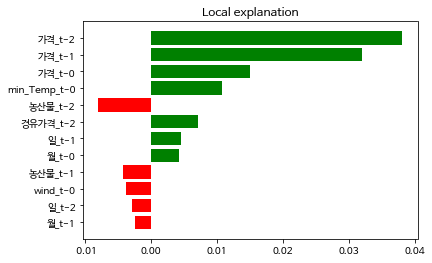

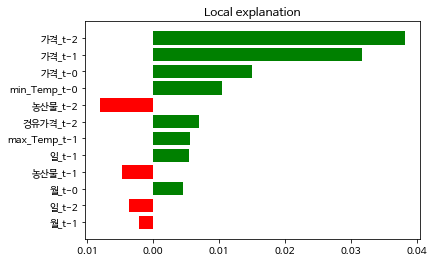

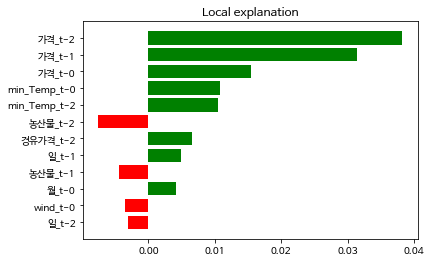

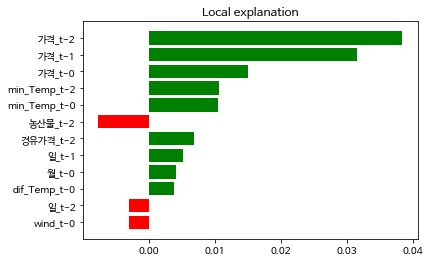

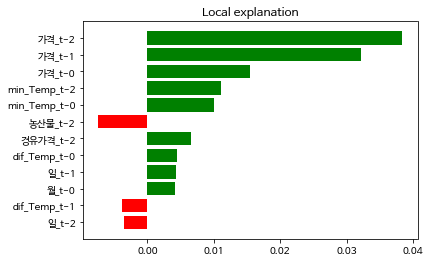

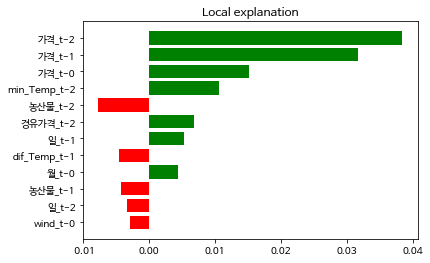

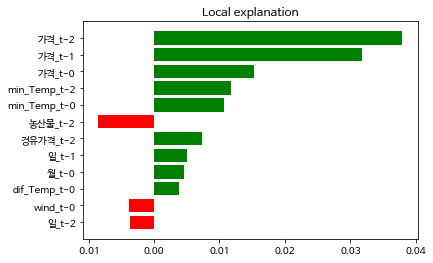

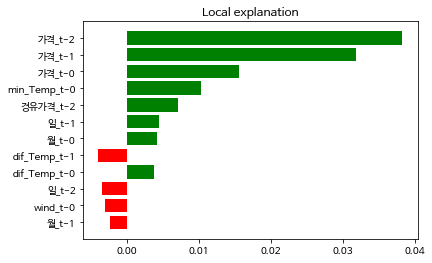

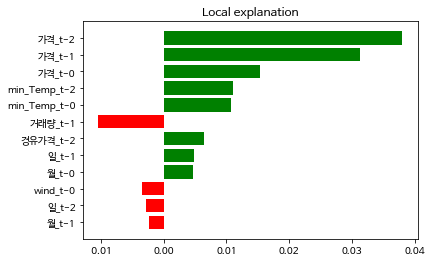

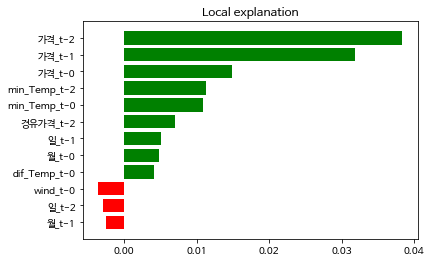

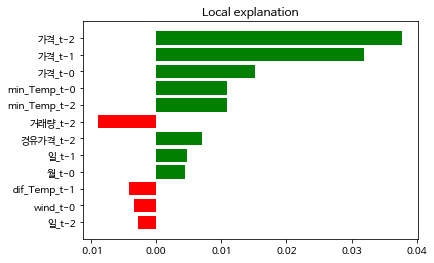

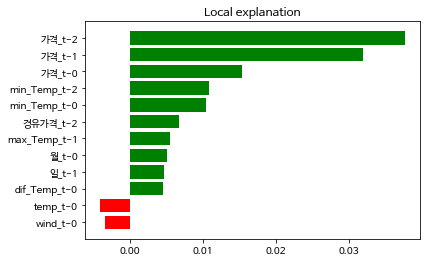

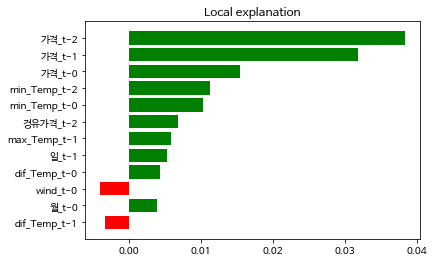

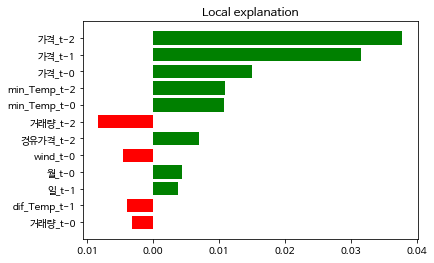

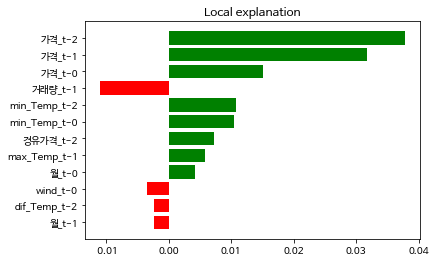

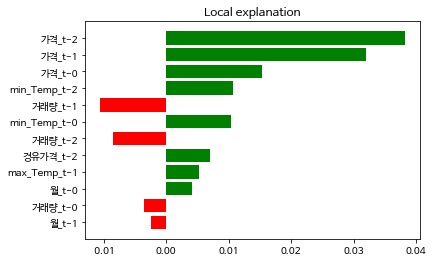

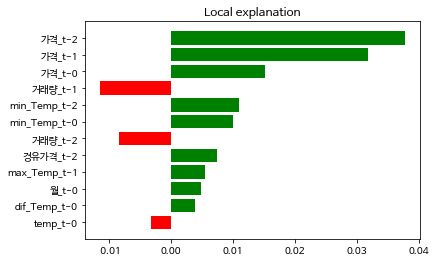

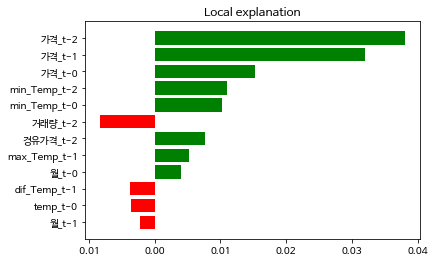

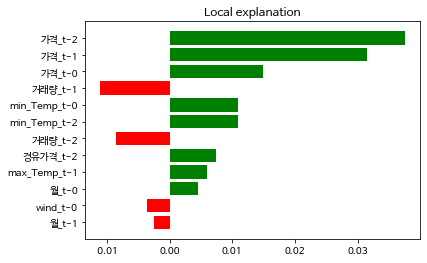

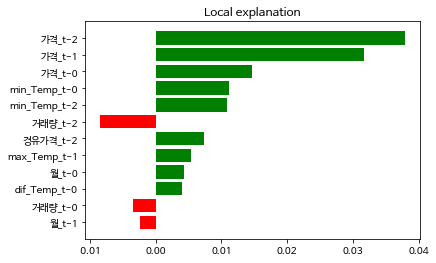

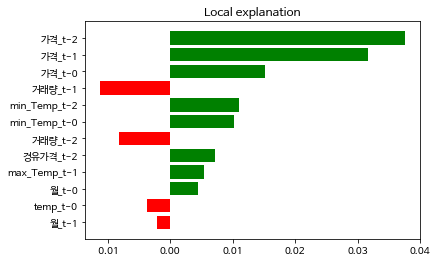

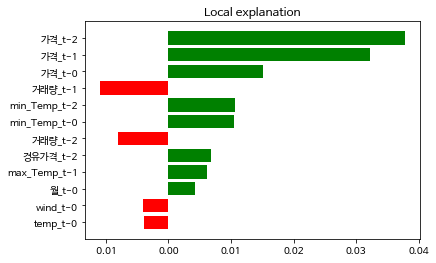

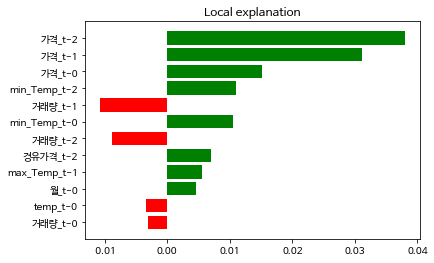

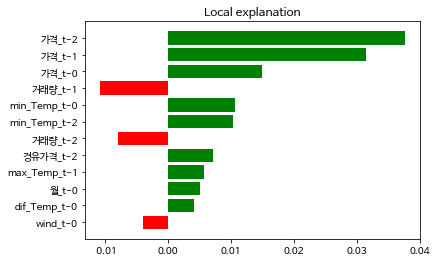

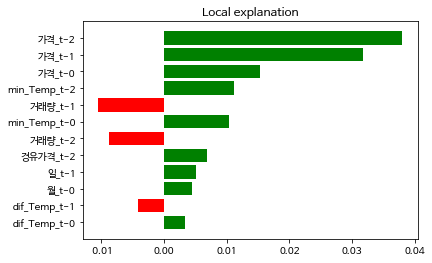

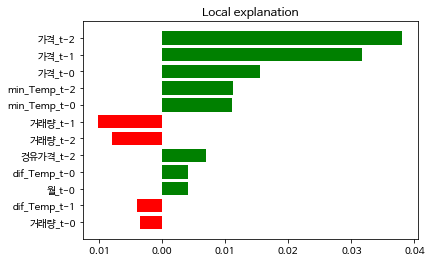

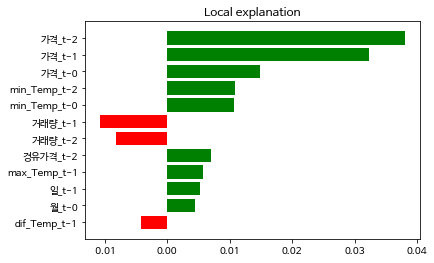

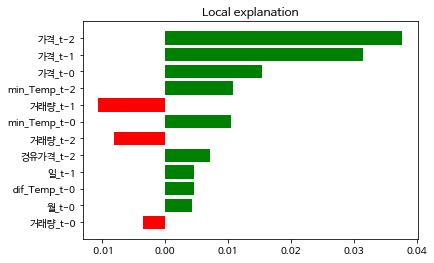

In [ ]:
WINDOW_SIZE=3
BATCH_SIZE=32
print('--------------- window size = {} ----------------------'.format(WINDOW_SIZE))
train_data = windowed_dataset(x_train, y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(x_test, y_test, WINDOW_SIZE, BATCH_SIZE, False)

# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

    
model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
        padding="causal",
        activation="relu",
        input_shape=[WINDOW_SIZE, x_train.shape[1]]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

# early stopping
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 50)

model_name = 'model_' + 'sigeumchi' + str(WINDOW_SIZE) + '.h5'    
checkpoint = ModelCheckpoint(model_name,             # file명을 지정합니다
                            monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다         
                            save_best_only=True,  # 가장 best 값만 저장합니다
                            mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )


history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=200, verbose=0, callbacks = [checkpoint, earlystopping])

model = tf.keras.models.load_model(model_name)
# 예측
pred = model.predict(test_data)

##  NMAE 계산

nmae_df = pd.concat([pd.Series(pred.ravel()),y_test[WINDOW_SIZE:].reset_index(drop = True)], axis = 1)
nmae_df.columns = ['pred', 'true']

df11 = pd.concat([nmae_df['pred'], x_test.reset_index(drop = True)], axis = 1)[:-WINDOW_SIZE]
df10 = pd.concat([nmae_df['true'], x_test.reset_index(drop = True)], axis = 1)[:-WINDOW_SIZE]

# inverse scaling --> true_val : 실제 가격, pred_val : 예측한 가격
true_val = pd.DataFrame(scaler8.inverse_transform(df10))[0]
pred_val = pd.DataFrame(scaler8.inverse_transform(df11))[0]
# df20 : inverse scaling 한 pred와 true값을 지닌 df
df20 = pd.concat([true_val, pred_val], axis = 1)
df20.columns = ['true', 'pred']
nmae(df20) # nmae 계산


# 그래프 그리기
df9 = nmae_df.query('true != 0')
plt.figure(figsize=(8, 6))
plt.plot(df9['true'], label='actual')
plt.plot(df9['pred'], label='prediction')
plt.legend()
plt.show()


# loss 그래프
plt.plot(history.history['loss'], c = 'r', label='train')
plt.plot(history.history['val_loss'], c = 'b', label='test')
plt.legend()
plt.show()
print()





ttt = np.array(list(map(lambda x: x[0].numpy(), train_data)))[0]
ttt2 = np.array(list(map(lambda x: x[0].numpy(), test_data)))[0]
explainer = lime_tabular.RecurrentTabularExplainer(ttt, feature_names=x_train.columns, mode='regression',discretize_continuous=False)
for i in range(32):
    exp = explainer.explain_instance(ttt2[i,:,:], model.predict, num_features=len(x_train.columns))
    exp.as_pyplot_figure()

# 미나리

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_minary.drop('1_week', 1), df_minary['1_week'], test_size=0.2, random_state=0, shuffle=False)

--------------- window size = 6 ----------------------
데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 6, 12)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32,)
NMAE : 0.37257394497624363


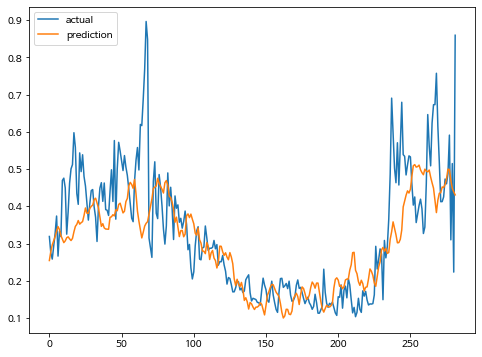

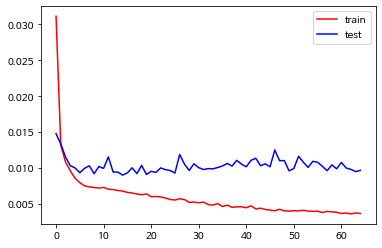

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/lime/explanation.py:168: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/

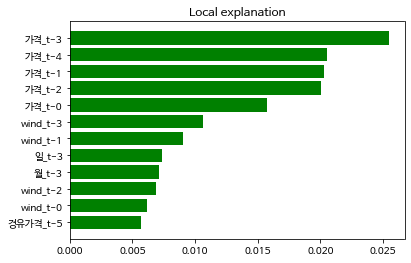

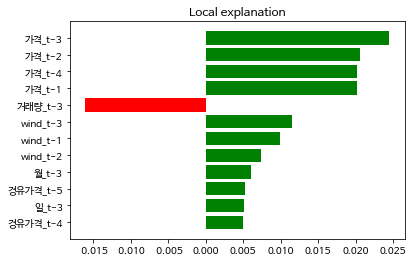

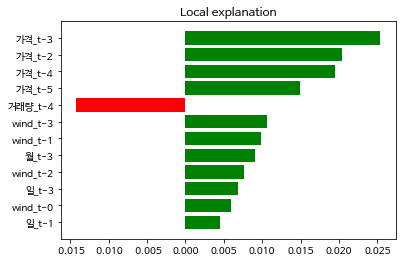

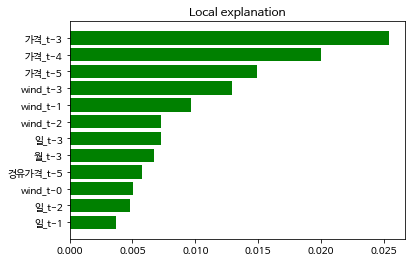

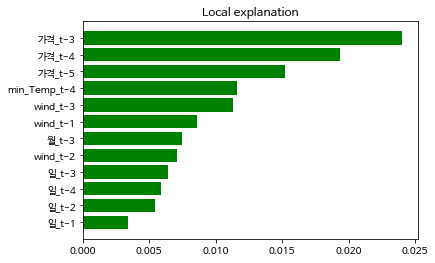

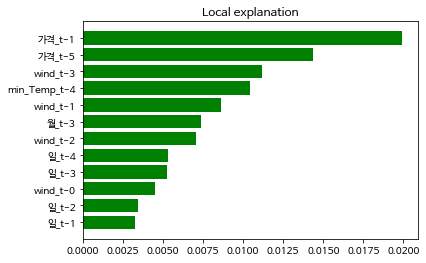

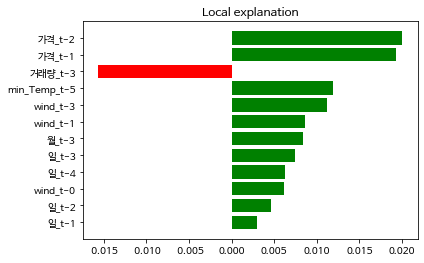

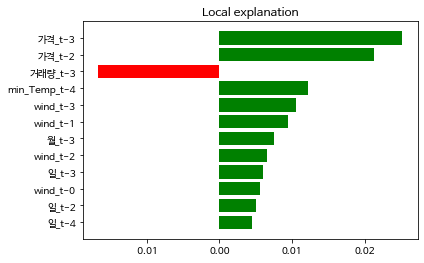

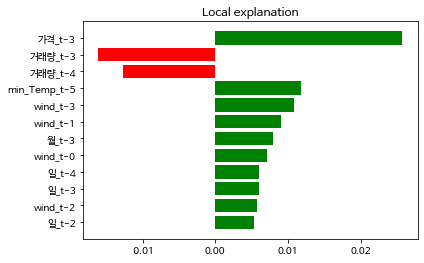

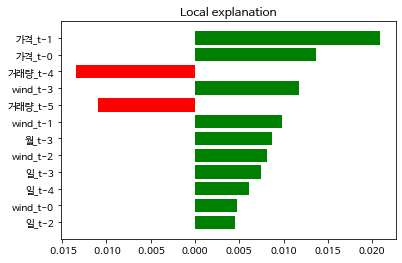

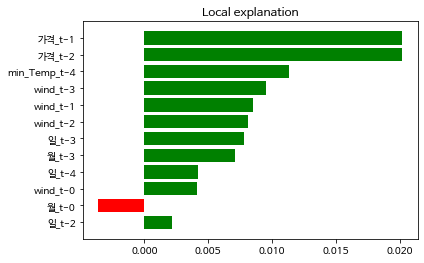

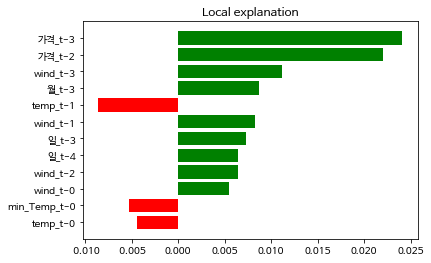

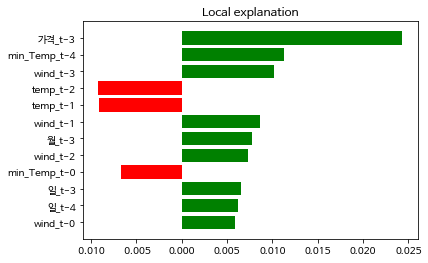

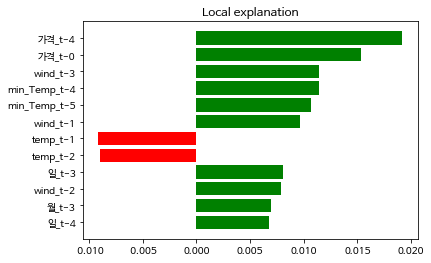

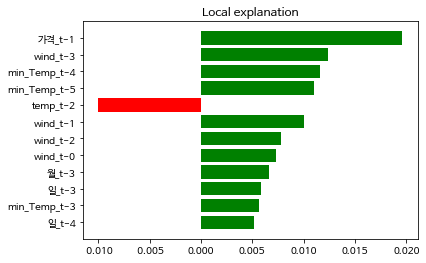

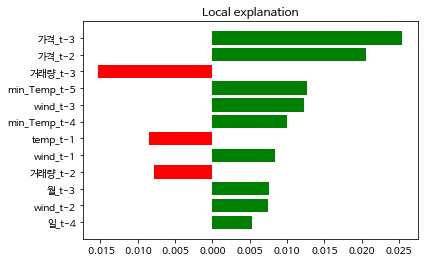

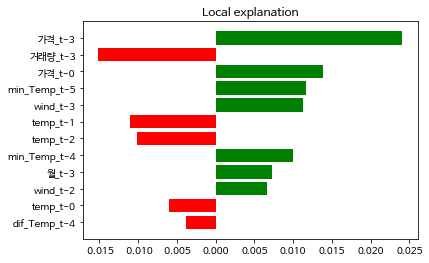

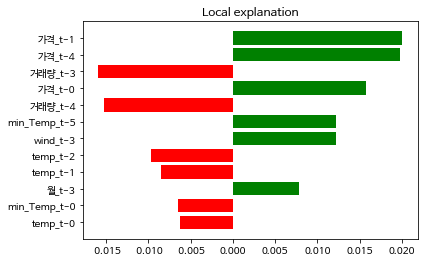

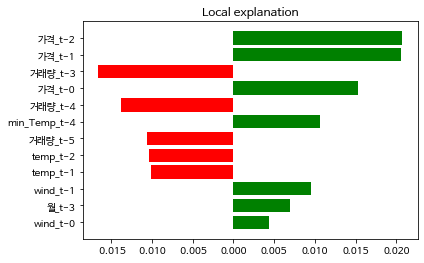

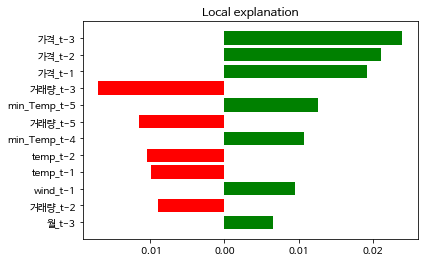

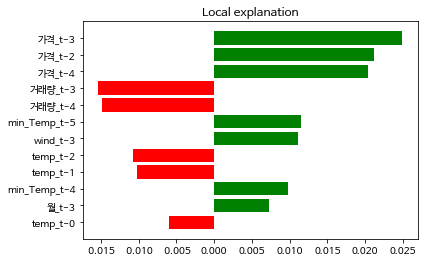

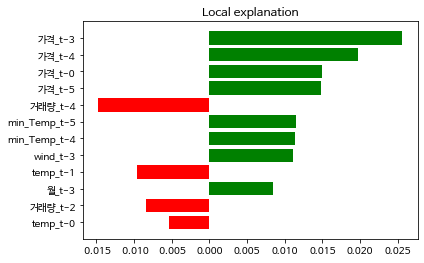

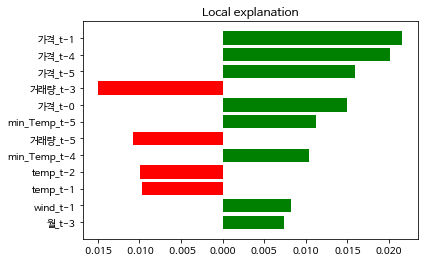

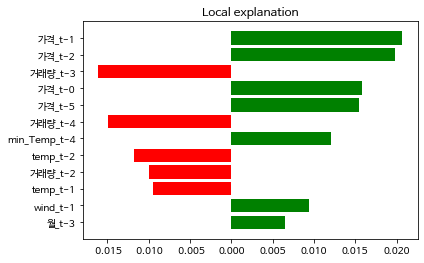

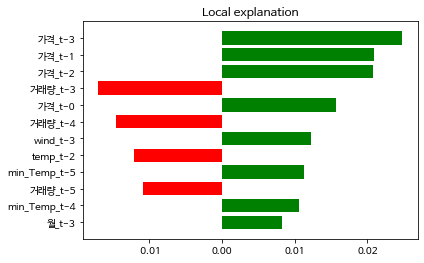

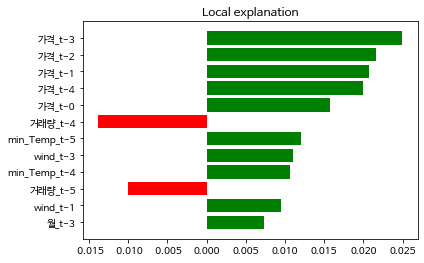

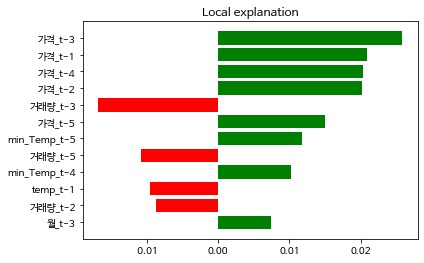

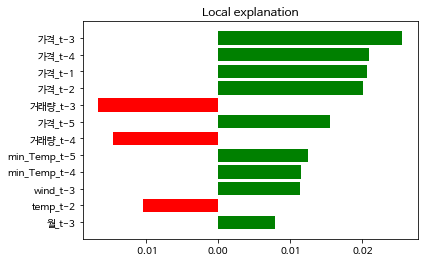

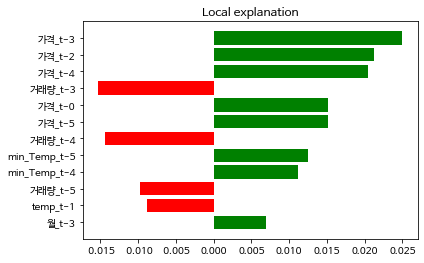

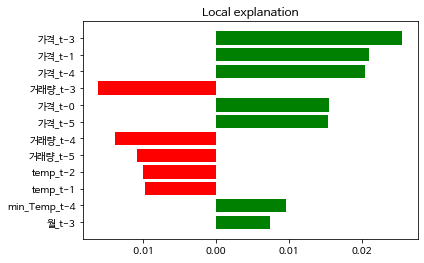

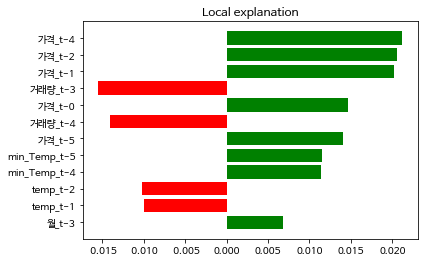

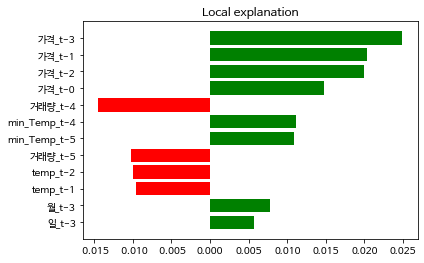

In [ ]:
WINDOW_SIZE=6
BATCH_SIZE=32
print('--------------- window size = {} ----------------------'.format(WINDOW_SIZE))
train_data = windowed_dataset(x_train, y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(x_test, y_test, WINDOW_SIZE, BATCH_SIZE, False)

# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

    
model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
        padding="causal",
        activation="relu",
        input_shape=[WINDOW_SIZE, x_train.shape[1]]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

# early stopping
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 50)

model_name = 'model_' + 'minary' + str(WINDOW_SIZE) + '.h5'   
checkpoint = ModelCheckpoint(model_name,             # file명을 지정합니다
                            monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다         
                            save_best_only=True,  # 가장 best 값만 저장합니다
                            mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )


history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=200, verbose=0, callbacks = [checkpoint, earlystopping])

model = tf.keras.models.load_model(model_name)
# 예측
pred = model.predict(test_data)

##  NMAE 계산

nmae_df = pd.concat([pd.Series(pred.ravel()),y_test[WINDOW_SIZE:].reset_index(drop = True)], axis = 1)
nmae_df.columns = ['pred', 'true']

df11 = pd.concat([nmae_df['pred'], x_test.reset_index(drop = True)], axis = 1)[:-WINDOW_SIZE]
df10 = pd.concat([nmae_df['true'], x_test.reset_index(drop = True)], axis = 1)[:-WINDOW_SIZE]

# inverse scaling --> true_val : 실제 가격, pred_val : 예측한 가격
true_val = pd.DataFrame(scaler9.inverse_transform(df10))[0]
pred_val = pd.DataFrame(scaler9.inverse_transform(df11))[0]
# df20 : inverse scaling 한 pred와 true값을 지닌 df
df20 = pd.concat([true_val, pred_val], axis = 1)
df20.columns = ['true', 'pred']
nmae(df20) # nmae 계산


# 그래프 그리기
df9 = nmae_df.query('true != 0')
plt.figure(figsize=(8, 6))
plt.plot(df9['true'], label='actual')
plt.plot(df9['pred'], label='prediction')
plt.legend()
plt.show()


# loss 그래프
plt.plot(history.history['loss'], c = 'r', label='train')
plt.plot(history.history['val_loss'], c = 'b', label='test')
plt.legend()
plt.show()
print()





ttt = np.array(list(map(lambda x: x[0].numpy(), train_data)))[0]
ttt2 = np.array(list(map(lambda x: x[0].numpy(), test_data)))[0]
explainer = lime_tabular.RecurrentTabularExplainer(ttt, feature_names=x_train.columns, mode='regression',discretize_continuous=False)
for i in range(32):
    exp = explainer.explain_instance(ttt2[i,:,:], model.predict, num_features=len(x_train.columns))
    exp.as_pyplot_figure()

# 파프리카

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_paprica.drop('1_week', 1), df_paprica['1_week'], test_size=0.2, random_state=0, shuffle=False)

--------------- window size = 4 ----------------------
데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 4, 12)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32,)
NMAE : 0.2369172117171703


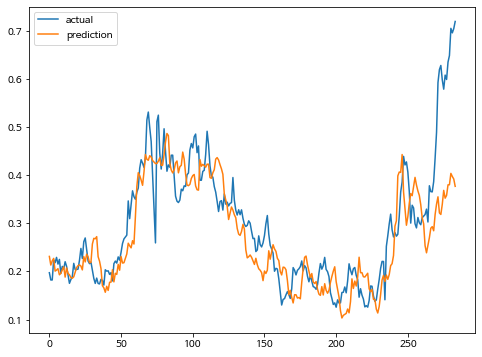

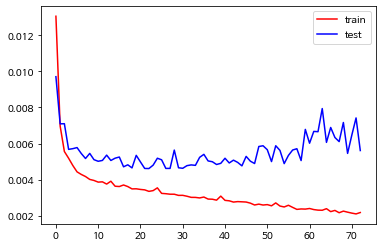

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/lime/explanation.py:168: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/

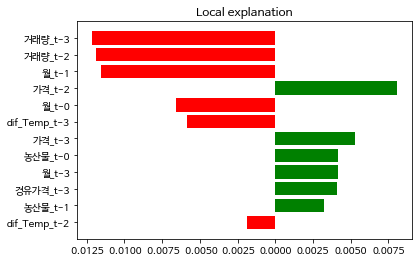

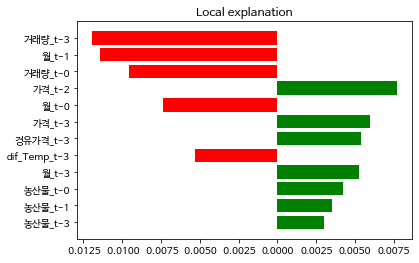

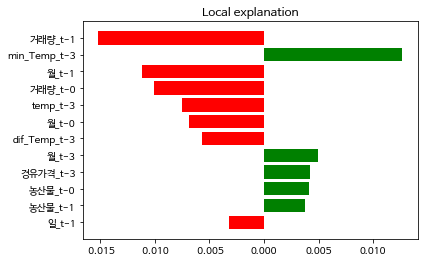

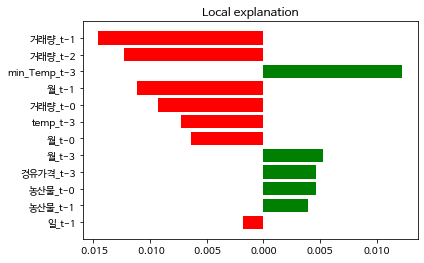

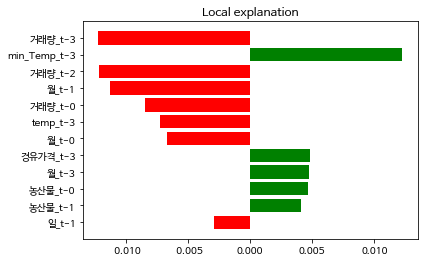

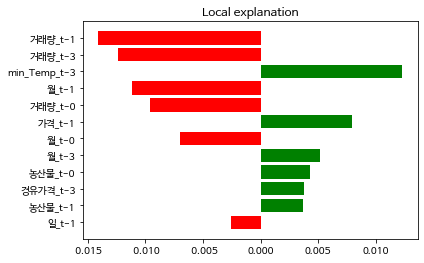

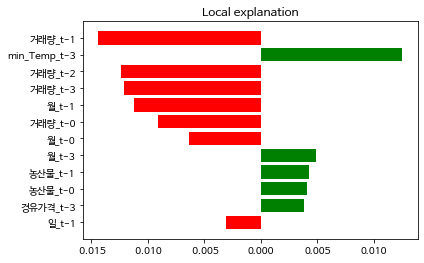

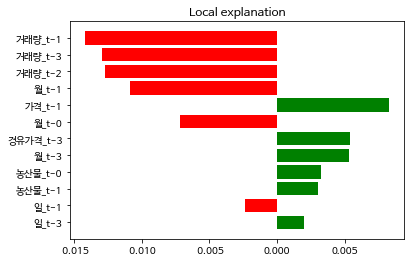

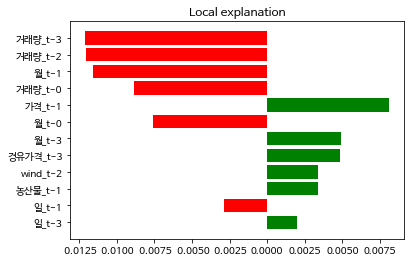

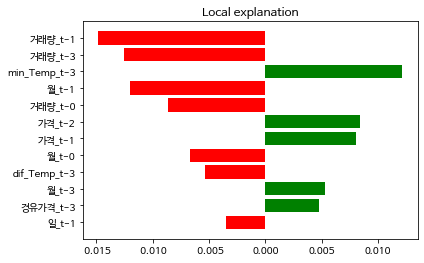

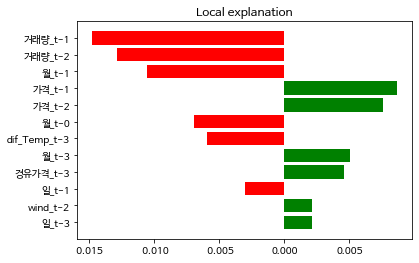

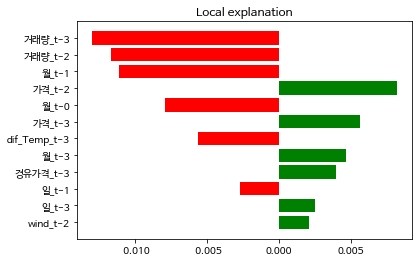

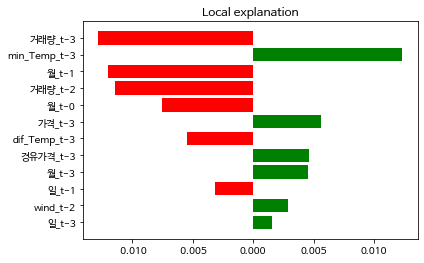

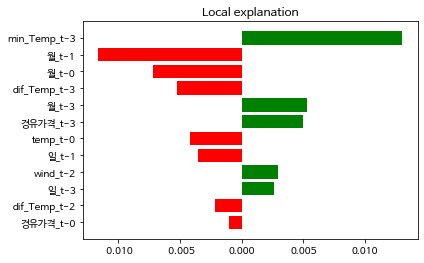

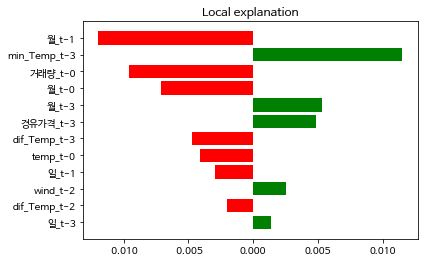

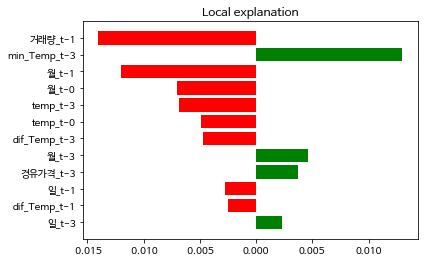

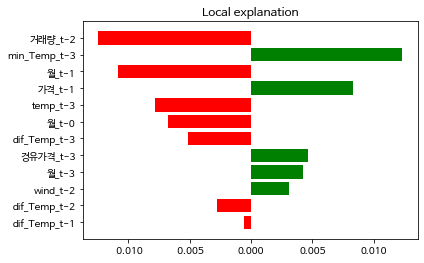

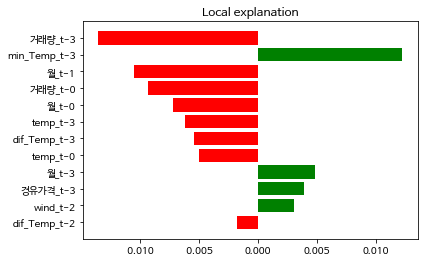

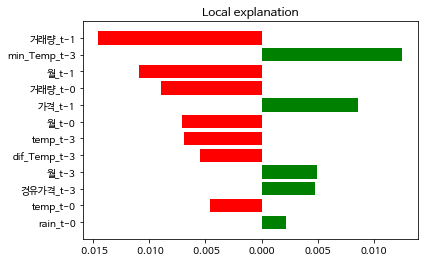

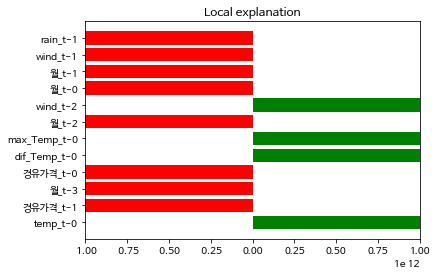

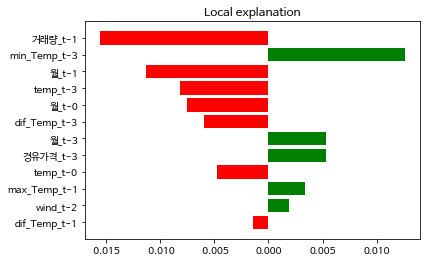

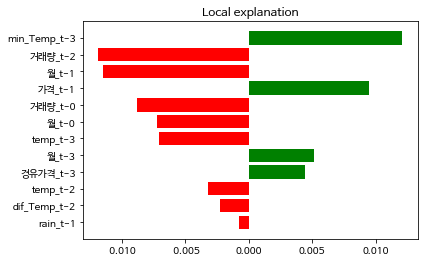

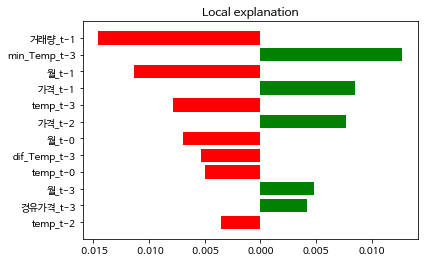

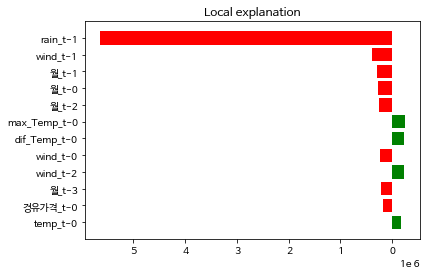

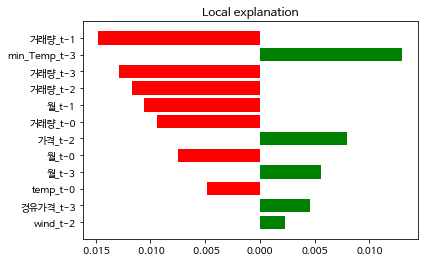

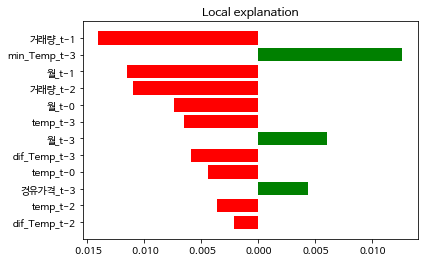

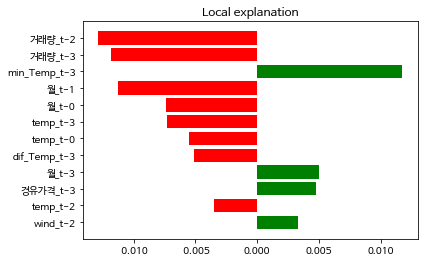

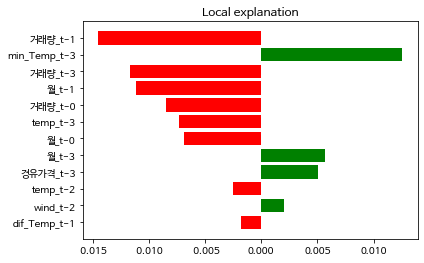

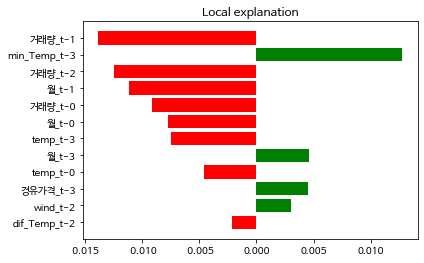

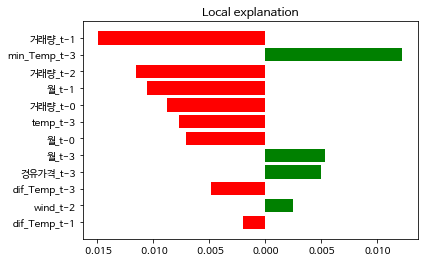

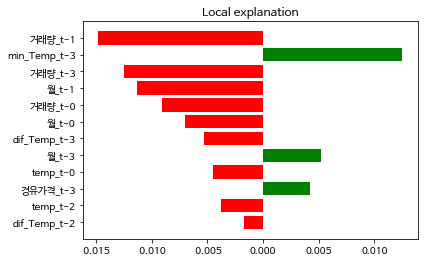

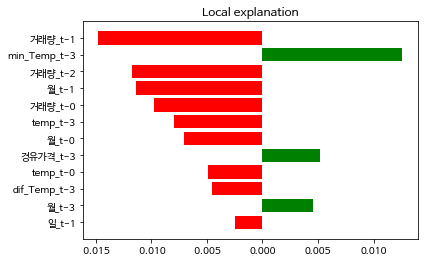

In [ ]:
WINDOW_SIZE=4
BATCH_SIZE=32
print('--------------- window size = {} ----------------------'.format(WINDOW_SIZE))
train_data = windowed_dataset(x_train, y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(x_test, y_test, WINDOW_SIZE, BATCH_SIZE, False)

# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

    
model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
        padding="causal",
        activation="relu",
        input_shape=[WINDOW_SIZE, x_train.shape[1]]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

# early stopping
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 50)

model_name = 'model_' + 'paprica' + str(WINDOW_SIZE) + '.h5'  
checkpoint = ModelCheckpoint(model_name,             # file명을 지정합니다
                            monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다         
                            save_best_only=True,  # 가장 best 값만 저장합니다
                            mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )


history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=200, verbose=0, callbacks = [checkpoint, earlystopping])

model = tf.keras.models.load_model(model_name)
# 예측
pred = model.predict(test_data)

##  NMAE 계산

nmae_df = pd.concat([pd.Series(pred.ravel()),y_test[WINDOW_SIZE:].reset_index(drop = True)], axis = 1)
nmae_df.columns = ['pred', 'true']

df11 = pd.concat([nmae_df['pred'], x_test.reset_index(drop = True)], axis = 1)[:-WINDOW_SIZE]
df10 = pd.concat([nmae_df['true'], x_test.reset_index(drop = True)], axis = 1)[:-WINDOW_SIZE]

# inverse scaling --> true_val : 실제 가격, pred_val : 예측한 가격
true_val = pd.DataFrame(scaler10.inverse_transform(df10))[0]
pred_val = pd.DataFrame(scaler10.inverse_transform(df11))[0]
# df20 : inverse scaling 한 pred와 true값을 지닌 df
df20 = pd.concat([true_val, pred_val], axis = 1)
df20.columns = ['true', 'pred']
nmae(df20) # nmae 계산


# 그래프 그리기
df9 = nmae_df.query('true != 0')
plt.figure(figsize=(8, 6))
plt.plot(df9['true'], label='actual')
plt.plot(df9['pred'], label='prediction')
plt.legend()
plt.show()


# loss 그래프
plt.plot(history.history['loss'], c = 'r', label='train')
plt.plot(history.history['val_loss'], c = 'b', label='test')
plt.legend()
plt.show()
print()





ttt = np.array(list(map(lambda x: x[0].numpy(), train_data)))[0]
ttt2 = np.array(list(map(lambda x: x[0].numpy(), test_data)))[0]
explainer = lime_tabular.RecurrentTabularExplainer(ttt, feature_names=x_train.columns, mode='regression',discretize_continuous=False)
for i in range(32):
    exp = explainer.explain_instance(ttt2[i,:,:], model.predict, num_features=len(x_train.columns))
    exp.as_pyplot_figure()

# 새송이 

비용, 가격

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_newsong.drop('1_week', 1), df_newsong['1_week'], test_size=0.2, random_state=0, shuffle=False)

--------------- window size = 3 ----------------------
데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 3, 12)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32,)
NMAE : 0.07572821716835014


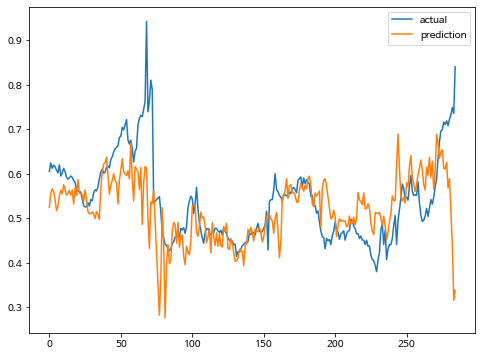

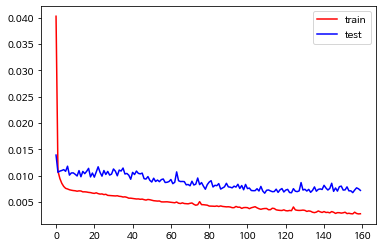

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/lime/explanation.py:168: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/

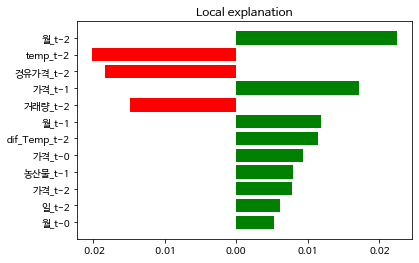

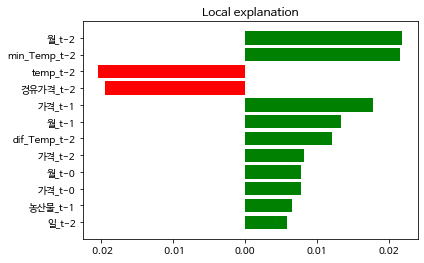

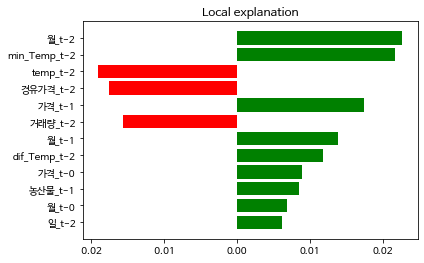

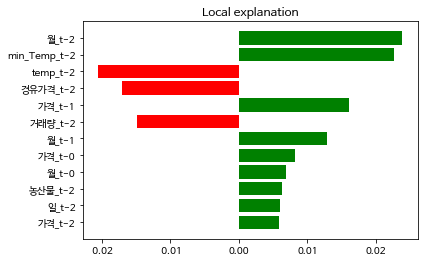

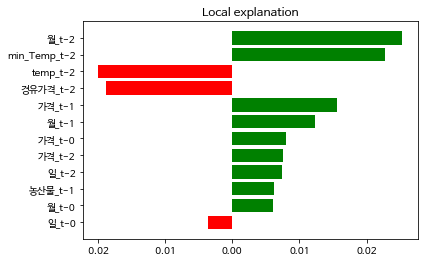

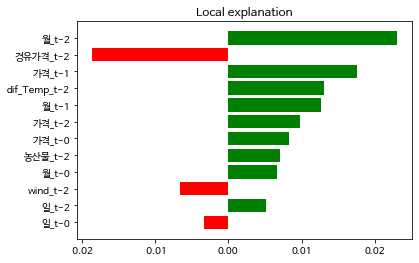

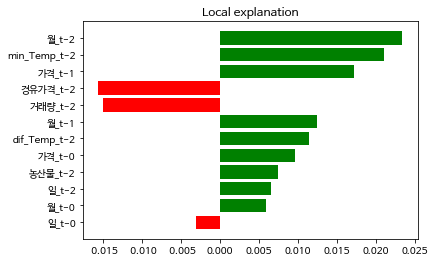

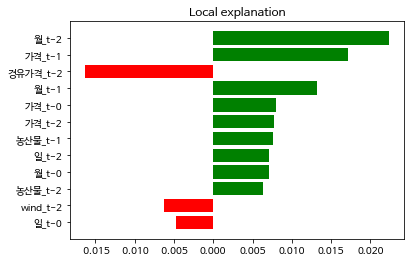

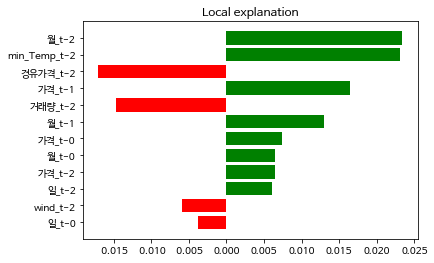

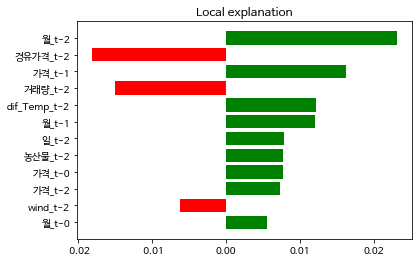

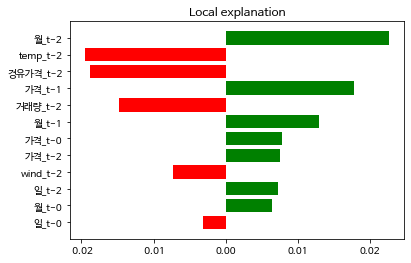

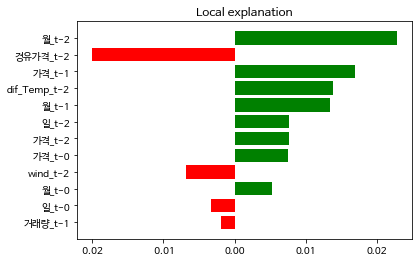

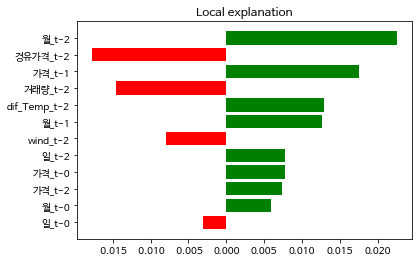

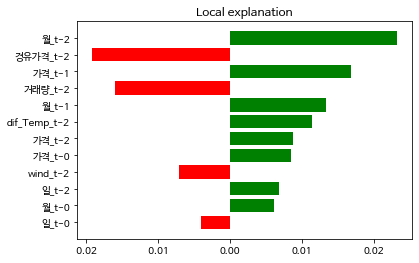

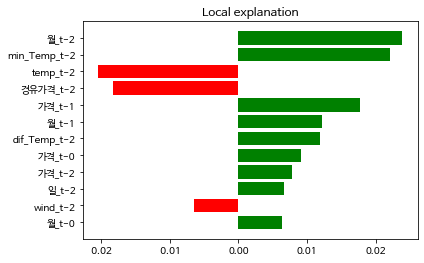

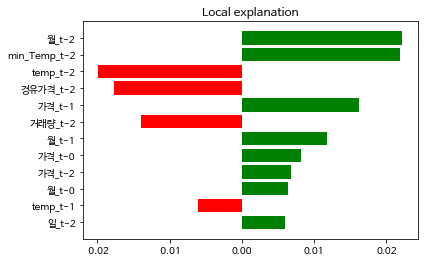

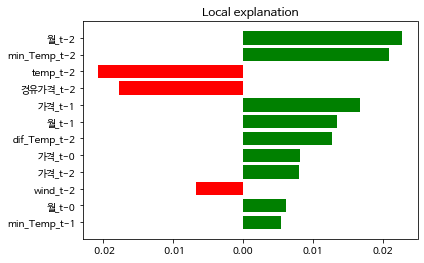

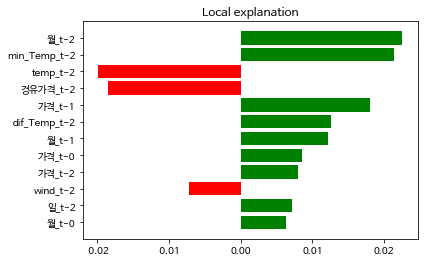

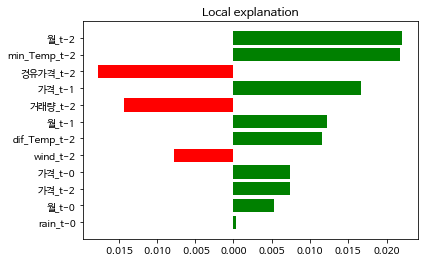

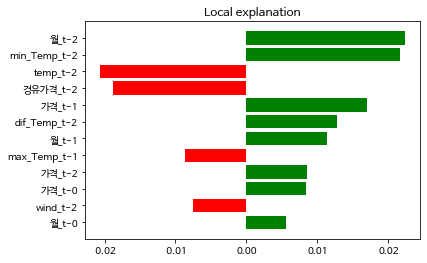

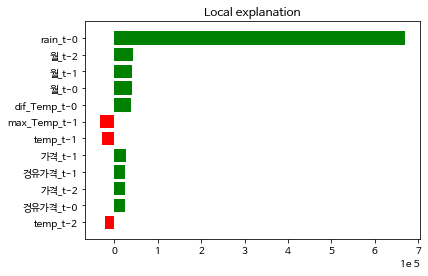

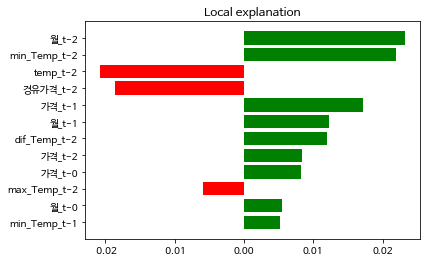

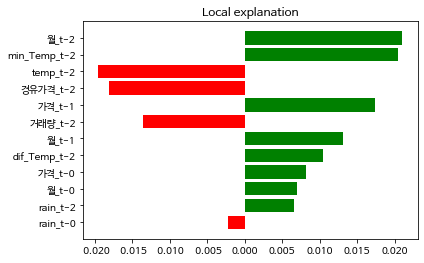

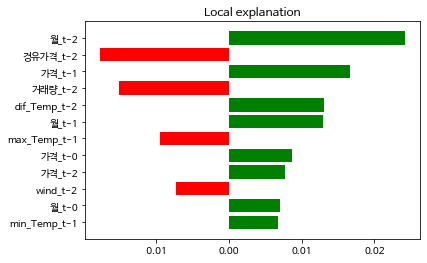

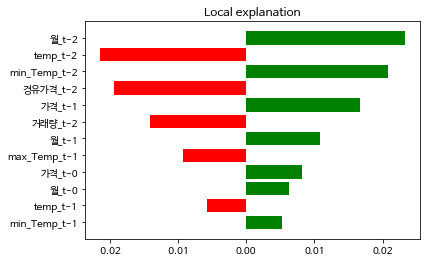

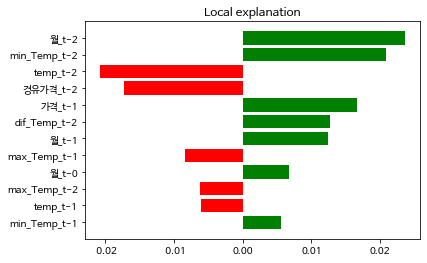

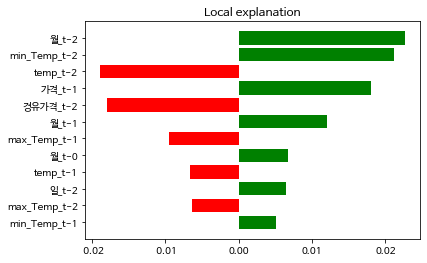

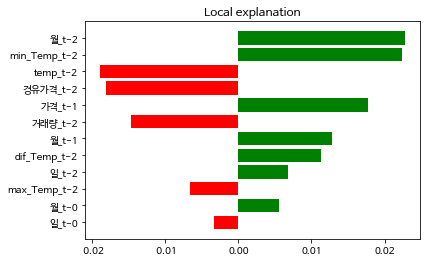

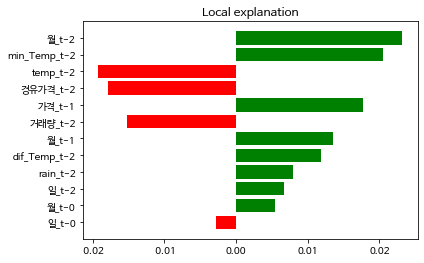

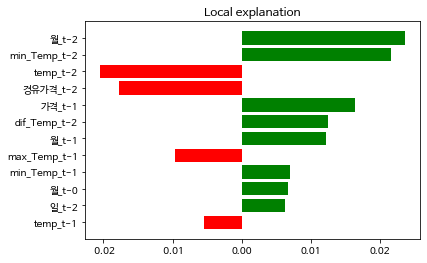

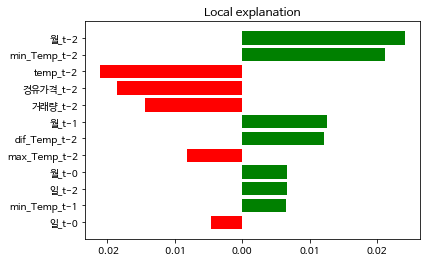

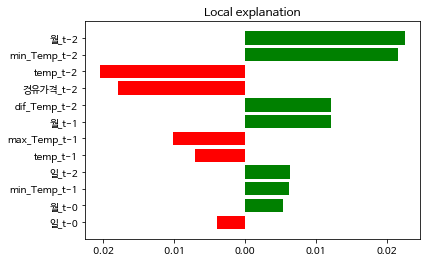

In [ ]:
WINDOW_SIZE=3
BATCH_SIZE=32
print('--------------- window size = {} ----------------------'.format(WINDOW_SIZE))
train_data = windowed_dataset(x_train, y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(x_test, y_test, WINDOW_SIZE, BATCH_SIZE, False)

# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

    
model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
        padding="causal",
        activation="relu",
        input_shape=[WINDOW_SIZE, x_train.shape[1]]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

# early stopping
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 50)

model_name = 'model_' + 'newsong' + str(WINDOW_SIZE) + '.h5'   
checkpoint = ModelCheckpoint(model_name,             # file명을 지정합니다
                            monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다         
                            save_best_only=True,  # 가장 best 값만 저장합니다
                            mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )


history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=200, verbose=0, callbacks = [checkpoint, earlystopping])

model = tf.keras.models.load_model(model_name)
# 예측
pred = model.predict(test_data)

##  NMAE 계산

nmae_df = pd.concat([pd.Series(pred.ravel()),y_test[WINDOW_SIZE:].reset_index(drop = True)], axis = 1)
nmae_df.columns = ['pred', 'true']

df11 = pd.concat([nmae_df['pred'], x_test.reset_index(drop = True)], axis = 1)[:-WINDOW_SIZE]
df10 = pd.concat([nmae_df['true'], x_test.reset_index(drop = True)], axis = 1)[:-WINDOW_SIZE]

# inverse scaling --> true_val : 실제 가격, pred_val : 예측한 가격
true_val = pd.DataFrame(scaler11.inverse_transform(df10))[0]
pred_val = pd.DataFrame(scaler11.inverse_transform(df11))[0]
# df20 : inverse scaling 한 pred와 true값을 지닌 df
df20 = pd.concat([true_val, pred_val], axis = 1)
df20.columns = ['true', 'pred']
nmae(df20) # nmae 계산


# 그래프 그리기
df9 = nmae_df.query('true != 0')
plt.figure(figsize=(8, 6))
plt.plot(df9['true'], label='actual')
plt.plot(df9['pred'], label='prediction')
plt.legend()
plt.show()


# loss 그래프
plt.plot(history.history['loss'], c = 'r', label='train')
plt.plot(history.history['val_loss'], c = 'b', label='test')
plt.legend()
plt.show()
print()





ttt = np.array(list(map(lambda x: x[0].numpy(), train_data)))[0]
ttt2 = np.array(list(map(lambda x: x[0].numpy(), test_data)))[0]
explainer = lime_tabular.RecurrentTabularExplainer(ttt, feature_names=x_train.columns, mode='regression',discretize_continuous=False)
for i in range(32):
    exp = explainer.explain_instance(ttt2[i,:,:], model.predict, num_features=len(x_train.columns))
    exp.as_pyplot_figure()

# 팽이버섯

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_mushroom.drop('1_week', 1), df_mushroom['1_week'], test_size=0.2, random_state=0, shuffle=False)

--------------- window size = 2 ----------------------
데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 2, 12)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32,)
NMAE : 0.1972398194803378


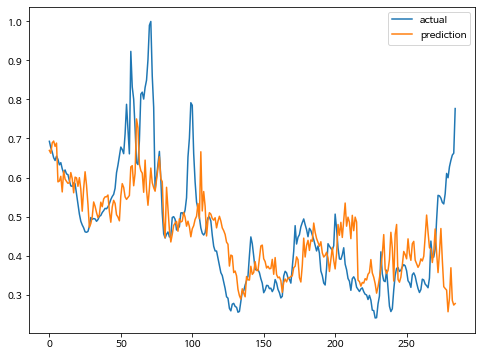

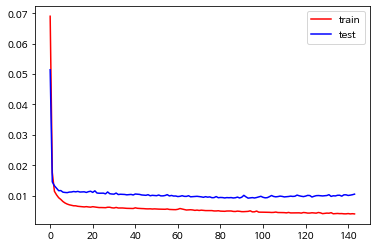

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/lime/explanation.py:168: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/

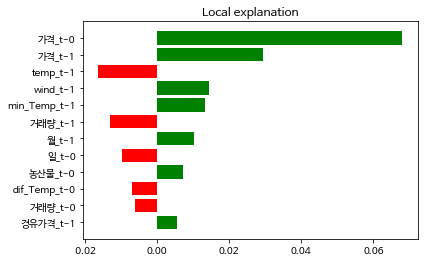

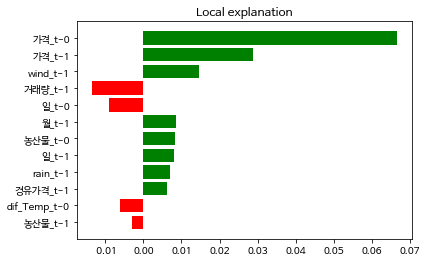

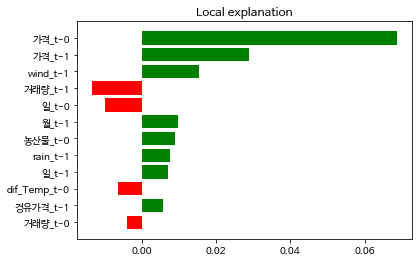

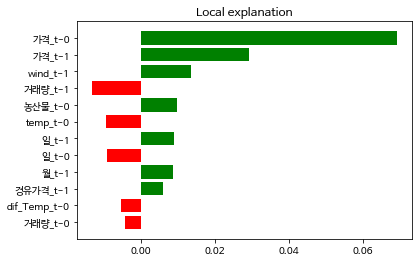

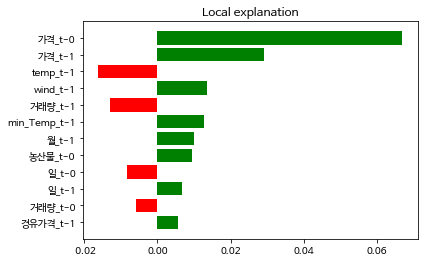

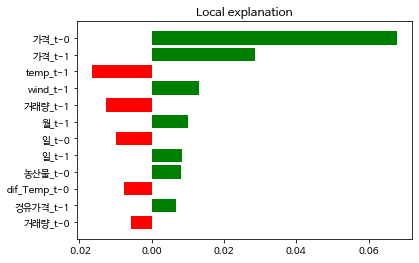

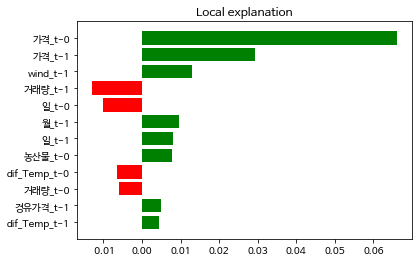

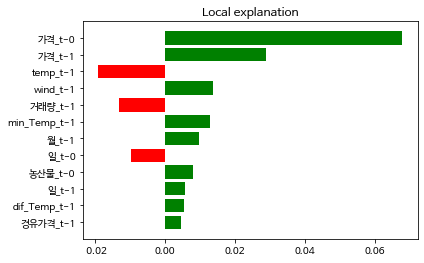

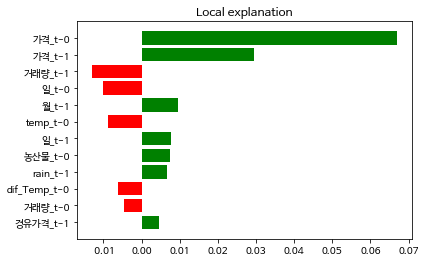

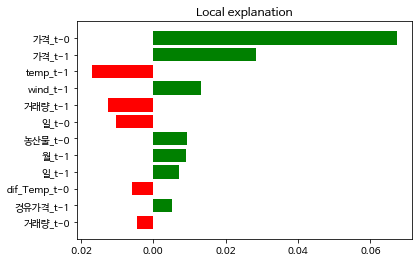

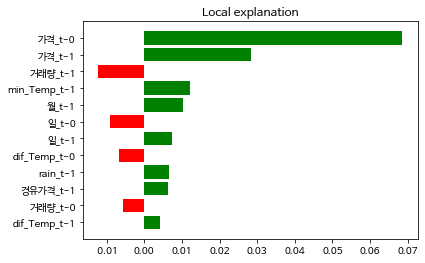

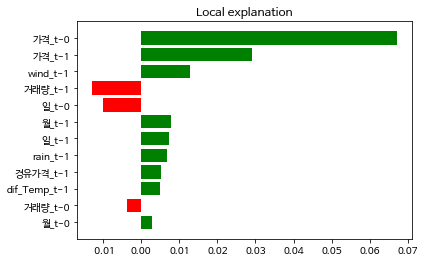

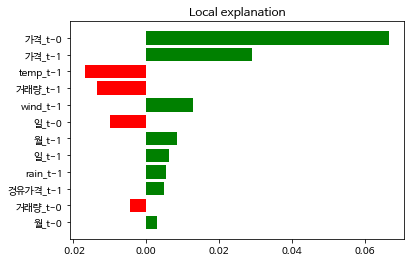

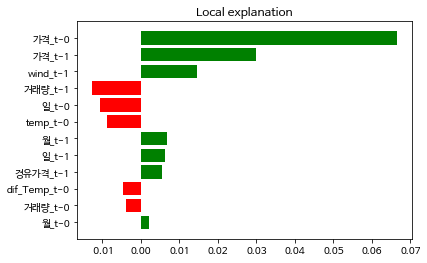

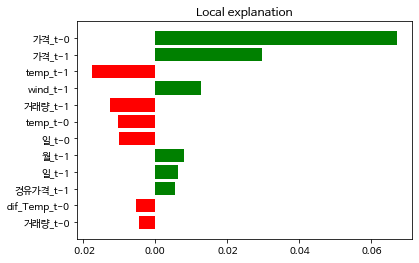

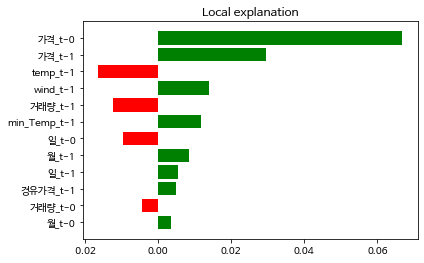

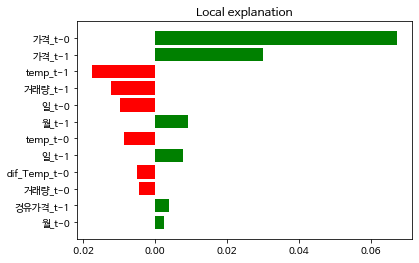

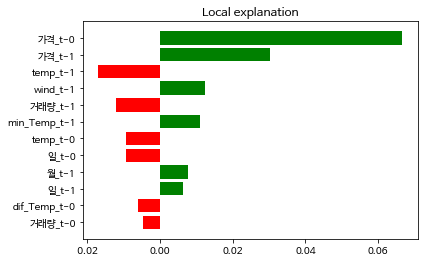

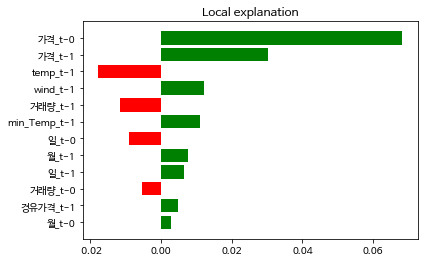

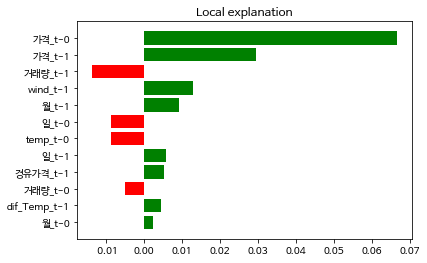

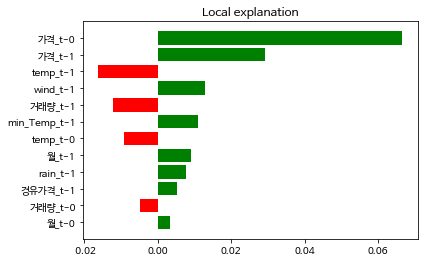

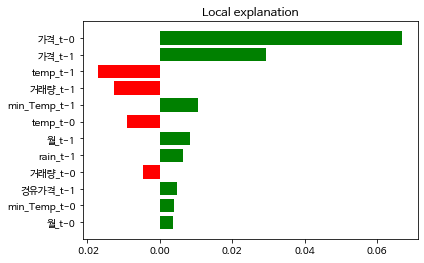

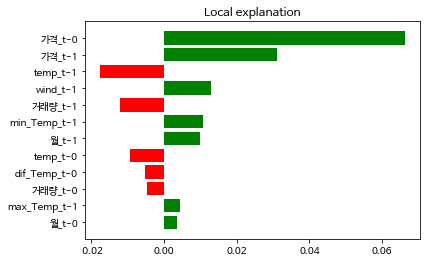

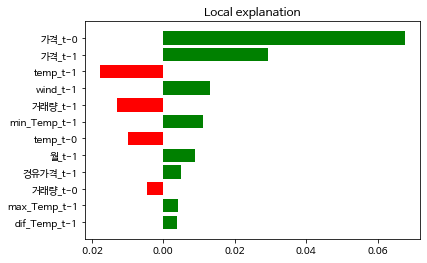

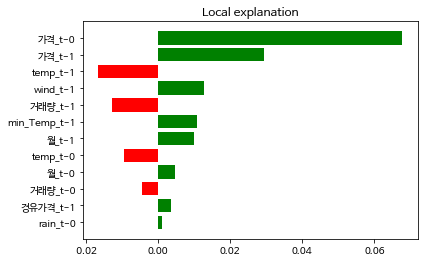

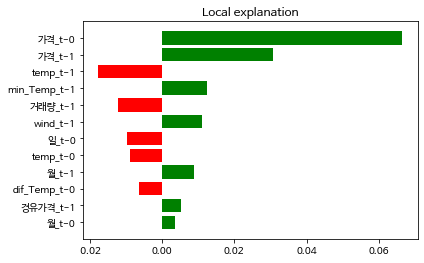

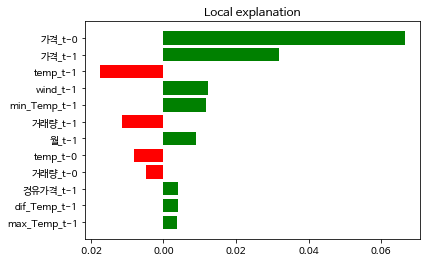

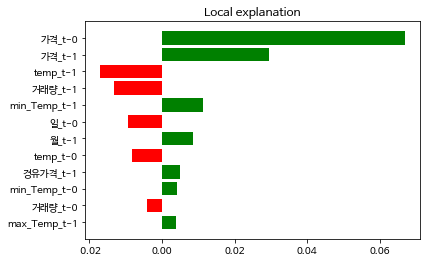

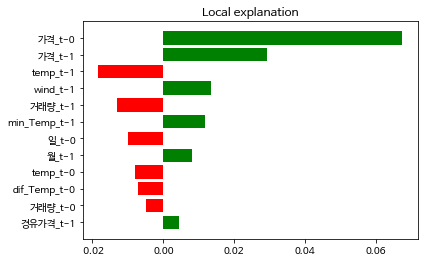

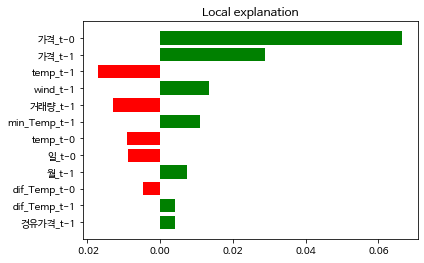

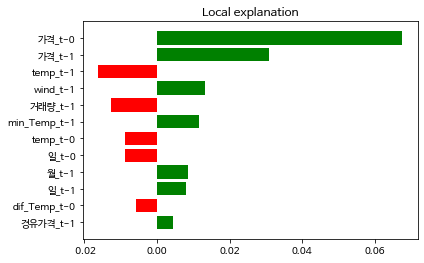

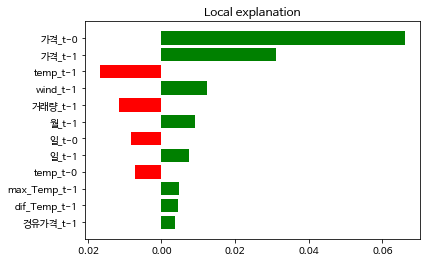

In [ ]:
WINDOW_SIZE=2
BATCH_SIZE=32
print('--------------- window size = {} ----------------------'.format(WINDOW_SIZE))
train_data = windowed_dataset(x_train, y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(x_test, y_test, WINDOW_SIZE, BATCH_SIZE, False)

# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

    
model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
        padding="causal",
        activation="relu",
        input_shape=[WINDOW_SIZE, x_train.shape[1]]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

# early stopping
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 50)

model_name = 'model_' + 'mushroom' + str(WINDOW_SIZE) + '.h5'   
checkpoint = ModelCheckpoint(model_name,             # file명을 지정합니다
                            monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다         
                            save_best_only=True,  # 가장 best 값만 저장합니다
                            mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )


history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=200, verbose=0, callbacks = [checkpoint, earlystopping])

model = tf.keras.models.load_model(model_name)
# 예측
pred = model.predict(test_data)

##  NMAE 계산

nmae_df = pd.concat([pd.Series(pred.ravel()),y_test[WINDOW_SIZE:].reset_index(drop = True)], axis = 1)
nmae_df.columns = ['pred', 'true']

df11 = pd.concat([nmae_df['pred'], x_test.reset_index(drop = True)], axis = 1)[:-WINDOW_SIZE]
df10 = pd.concat([nmae_df['true'], x_test.reset_index(drop = True)], axis = 1)[:-WINDOW_SIZE]

# inverse scaling --> true_val : 실제 가격, pred_val : 예측한 가격
true_val = pd.DataFrame(scaler12.inverse_transform(df10))[0]
pred_val = pd.DataFrame(scaler12.inverse_transform(df11))[0]
# df20 : inverse scaling 한 pred와 true값을 지닌 df
df20 = pd.concat([true_val, pred_val], axis = 1)
df20.columns = ['true', 'pred']
nmae(df20) # nmae 계산


# 그래프 그리기
df9 = nmae_df.query('true != 0')
plt.figure(figsize=(8, 6))
plt.plot(df9['true'], label='actual')
plt.plot(df9['pred'], label='prediction')
plt.legend()
plt.show()


# loss 그래프
plt.plot(history.history['loss'], c = 'r', label='train')
plt.plot(history.history['val_loss'], c = 'b', label='test')
plt.legend()
plt.show()
print()





ttt = np.array(list(map(lambda x: x[0].numpy(), train_data)))[0]
ttt2 = np.array(list(map(lambda x: x[0].numpy(), test_data)))[0]
explainer = lime_tabular.RecurrentTabularExplainer(ttt, feature_names=x_train.columns, mode='regression',discretize_continuous=False)
for i in range(32):
    exp = explainer.explain_instance(ttt2[i,:,:], model.predict, num_features=len(x_train.columns))
    exp.as_pyplot_figure()

# 토마토

기후쪽 영향 어느정도 존재

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_tomato.drop('1_week', 1), df_tomato['1_week'], test_size=0.2, random_state=0, shuffle=False)

--------------- window size = 8 ----------------------
데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 8, 12)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32,)
NMAE : 0.28028292289240525


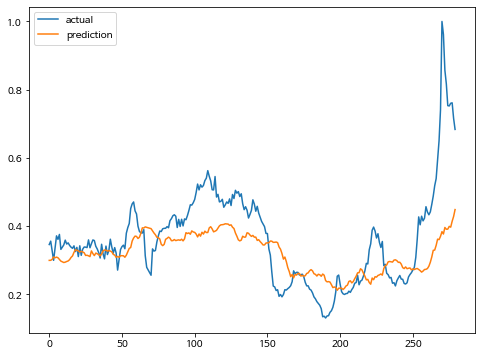

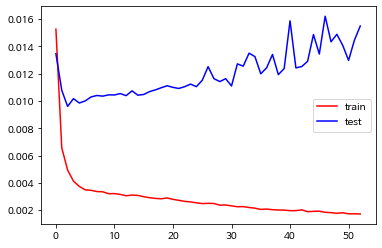

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/lime/explanation.py:168: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/

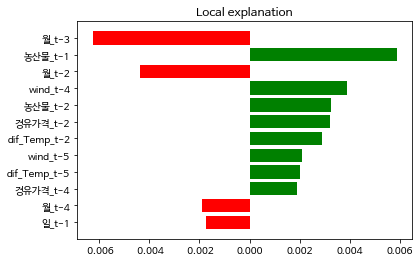

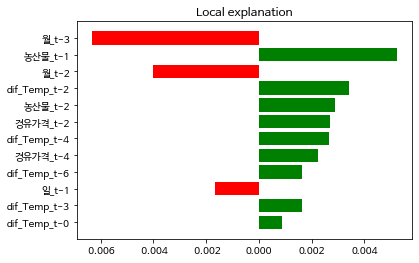

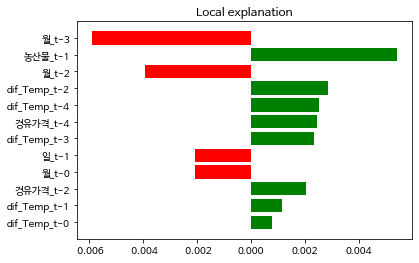

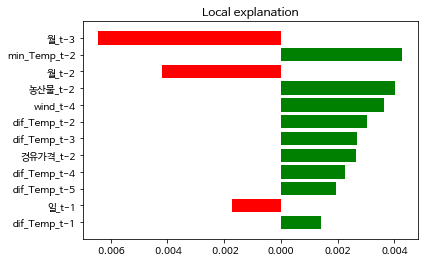

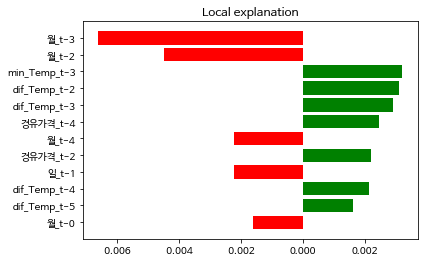

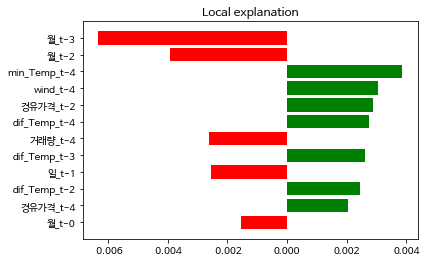

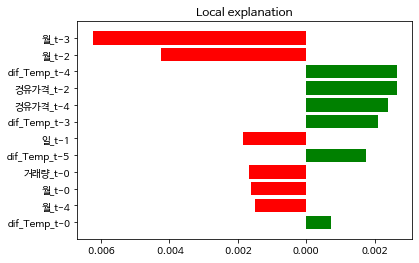

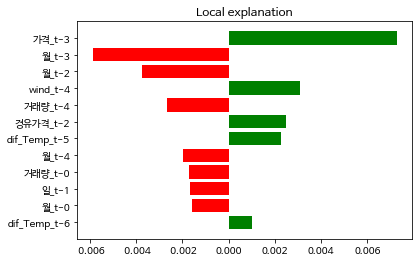

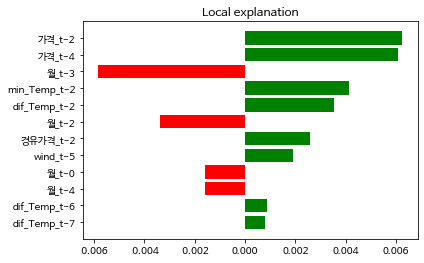

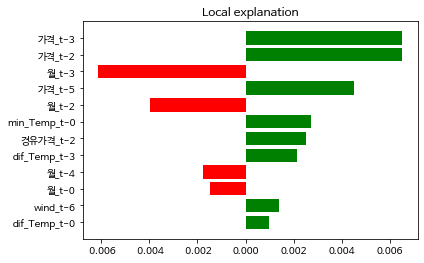

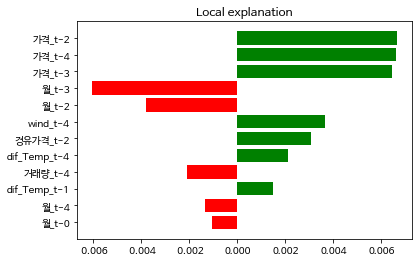

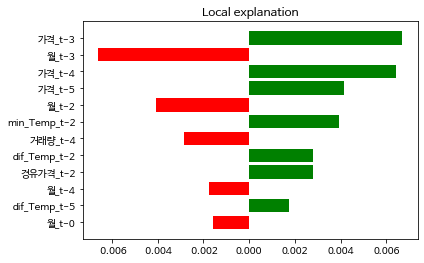

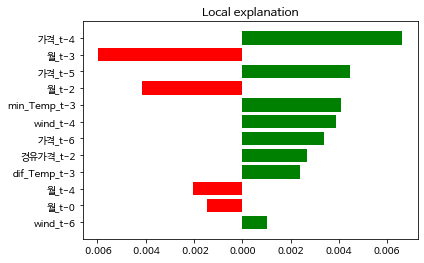

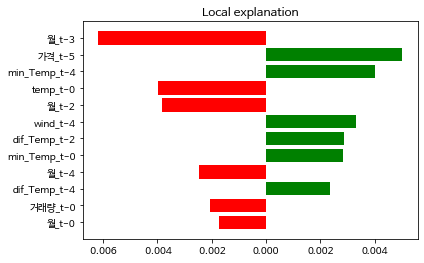

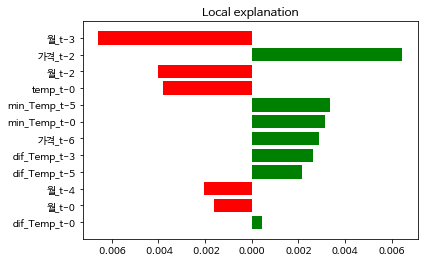

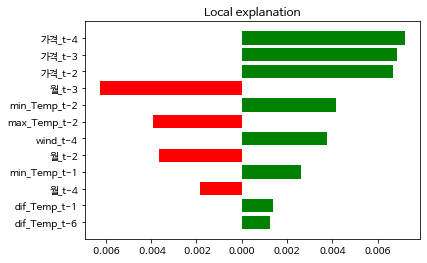

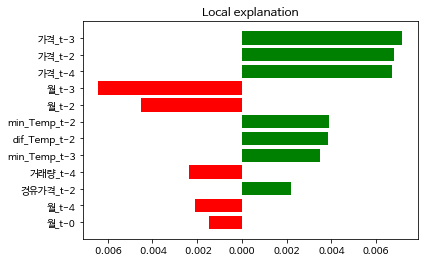

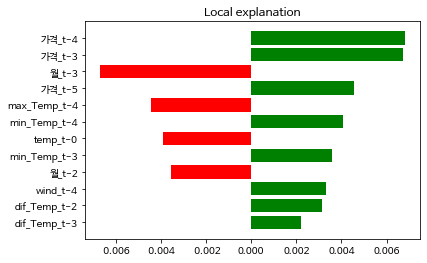

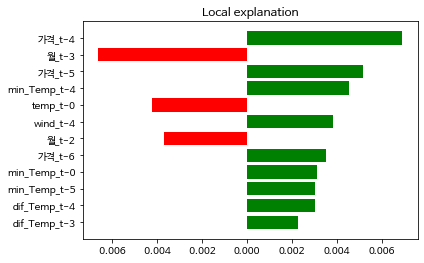

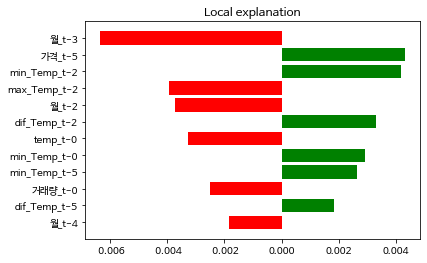

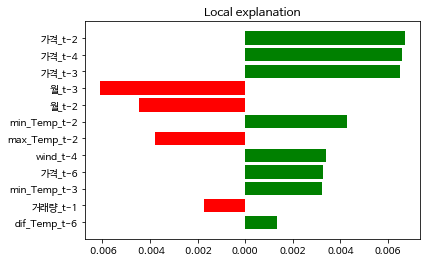

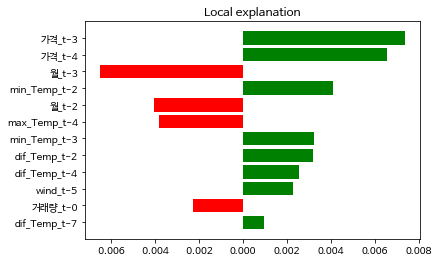

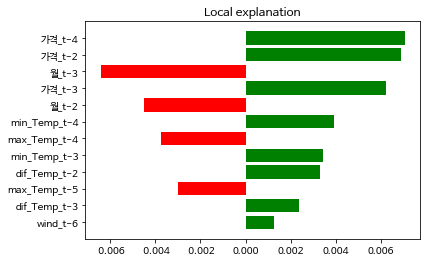

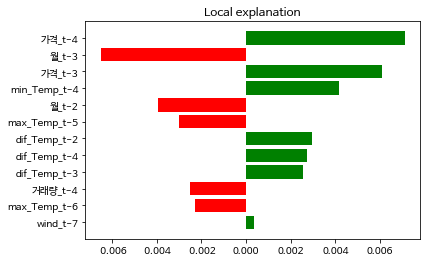

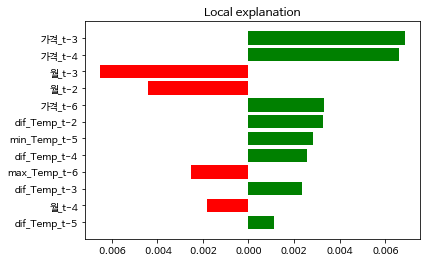

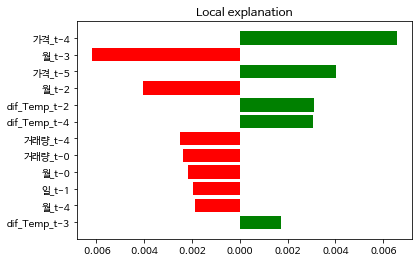

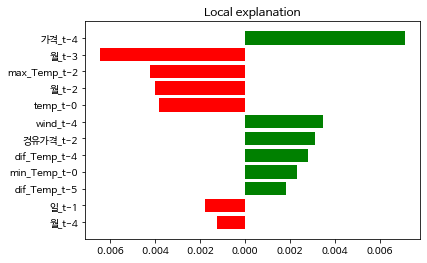

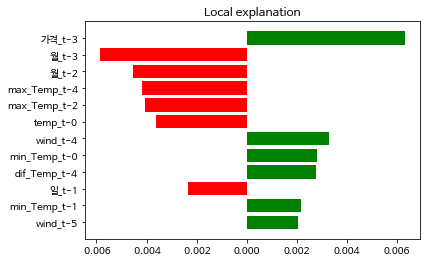

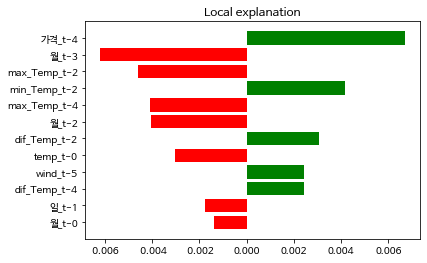

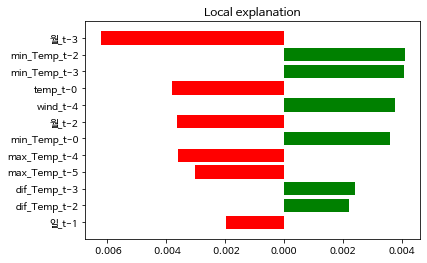

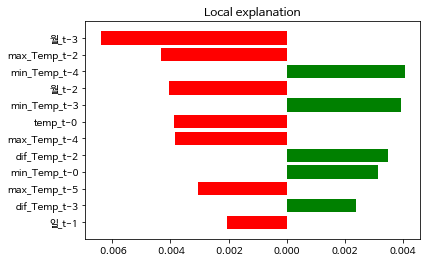

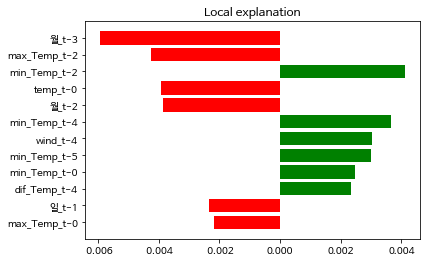

In [ ]:
WINDOW_SIZE=8
BATCH_SIZE=32
print('--------------- window size = {} ----------------------'.format(WINDOW_SIZE))
train_data = windowed_dataset(x_train, y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(x_test, y_test, WINDOW_SIZE, BATCH_SIZE, False)

# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

    
model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
        padding="causal",
        activation="relu",
        input_shape=[WINDOW_SIZE, x_train.shape[1]]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

# early stopping
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 50)

model_name = 'model_' + 'tomato' + str(WINDOW_SIZE) + '.h5'   
checkpoint = ModelCheckpoint(model_name,             # file명을 지정합니다
                            monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다         
                            save_best_only=True,  # 가장 best 값만 저장합니다
                            mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )


history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=200, verbose=0, callbacks = [checkpoint, earlystopping])

model = tf.keras.models.load_model(model_name)
# 예측
pred = model.predict(test_data)

##  NMAE 계산

nmae_df = pd.concat([pd.Series(pred.ravel()),y_test[WINDOW_SIZE:].reset_index(drop = True)], axis = 1)
nmae_df.columns = ['pred', 'true']

df11 = pd.concat([nmae_df['pred'], x_test.reset_index(drop = True)], axis = 1)[:-WINDOW_SIZE]
df10 = pd.concat([nmae_df['true'], x_test.reset_index(drop = True)], axis = 1)[:-WINDOW_SIZE]

# inverse scaling --> true_val : 실제 가격, pred_val : 예측한 가격
true_val = pd.DataFrame(scaler13.inverse_transform(df10))[0]
pred_val = pd.DataFrame(scaler13.inverse_transform(df11))[0]
# df20 : inverse scaling 한 pred와 true값을 지닌 df
df20 = pd.concat([true_val, pred_val], axis = 1)
df20.columns = ['true', 'pred']
nmae(df20) # nmae 계산


# 그래프 그리기
df9 = nmae_df.query('true != 0')
plt.figure(figsize=(8, 6))
plt.plot(df9['true'], label='actual')
plt.plot(df9['pred'], label='prediction')
plt.legend()
plt.show()


# loss 그래프
plt.plot(history.history['loss'], c = 'r', label='train')
plt.plot(history.history['val_loss'], c = 'b', label='test')
plt.legend()
plt.show()
print()





ttt = np.array(list(map(lambda x: x[0].numpy(), train_data)))[0]
ttt2 = np.array(list(map(lambda x: x[0].numpy(), test_data)))[0]
explainer = lime_tabular.RecurrentTabularExplainer(ttt, feature_names=x_train.columns, mode='regression',discretize_continuous=False)
for i in range(32):
    exp = explainer.explain_instance(ttt2[i,:,:], model.predict, num_features=len(x_train.columns))
    exp.as_pyplot_figure()

# 청상추

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_sangchu.drop('1_week', 1), df_sangchu['1_week'], test_size=0.2, random_state=0, shuffle=False)

--------------- window size = 3 ----------------------
데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 3, 12)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32,)
NMAE : 0.3121254344210852


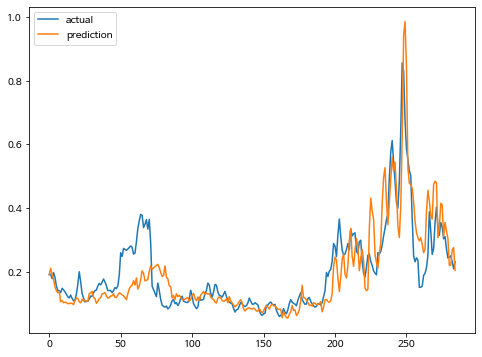

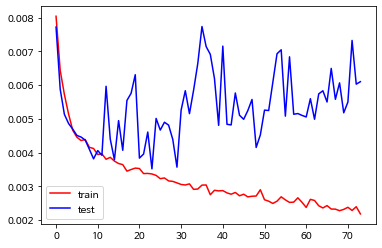

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/lime/explanation.py:168: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/

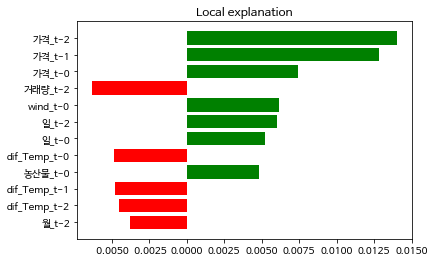

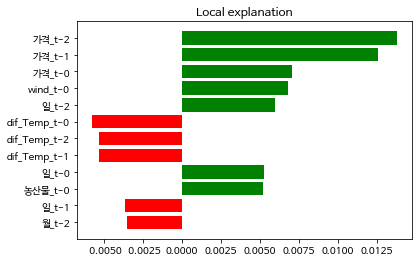

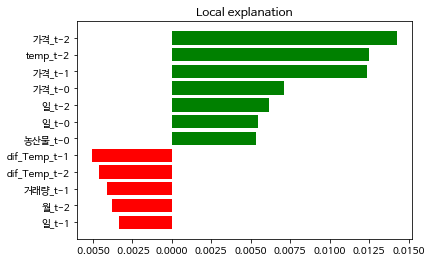

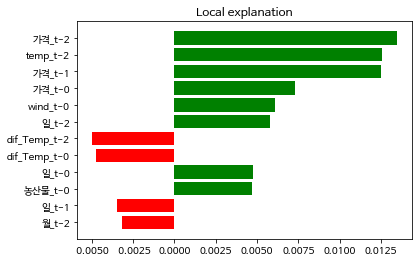

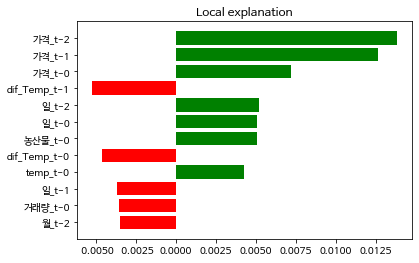

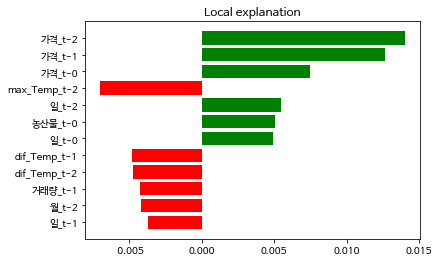

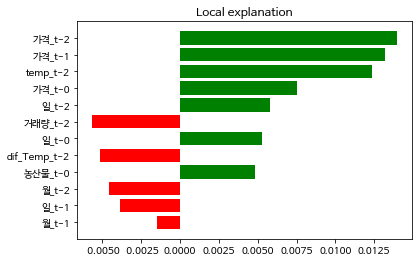

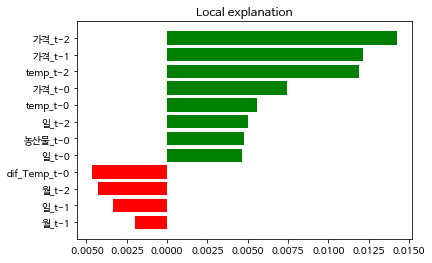

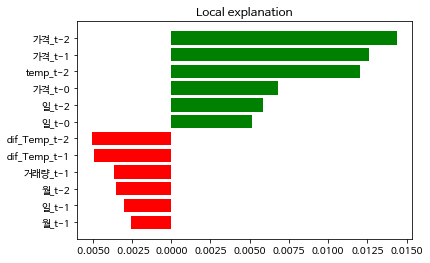

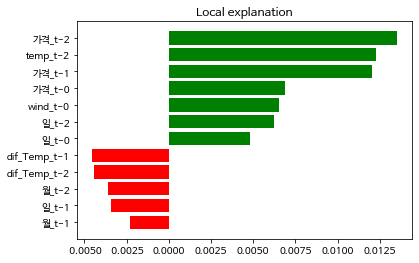

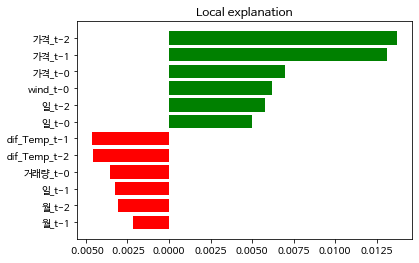

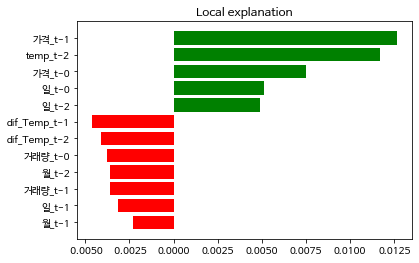

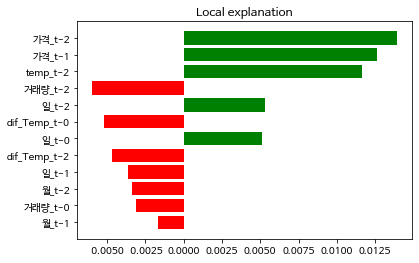

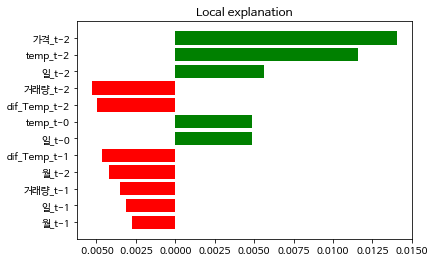

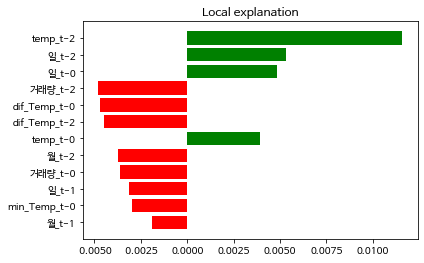

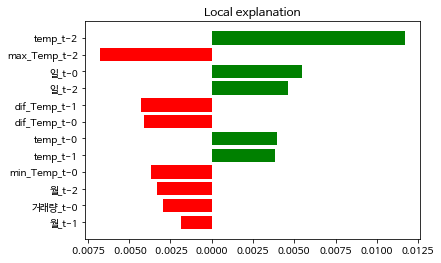

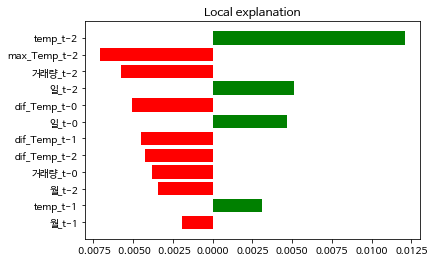

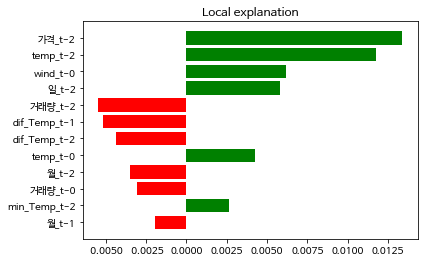

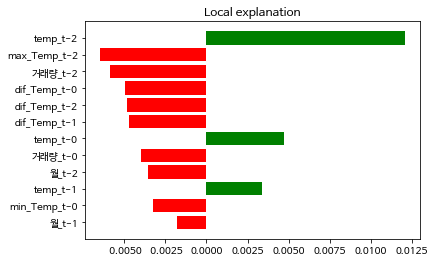

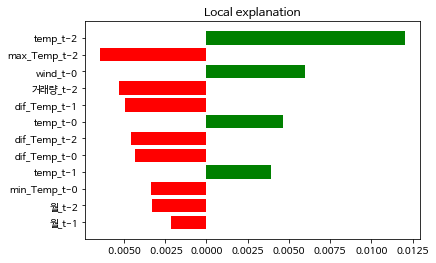

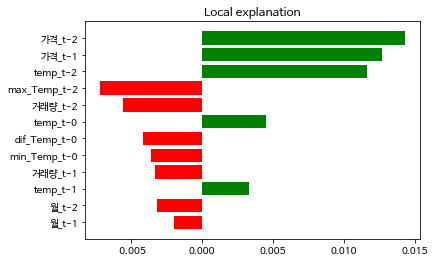

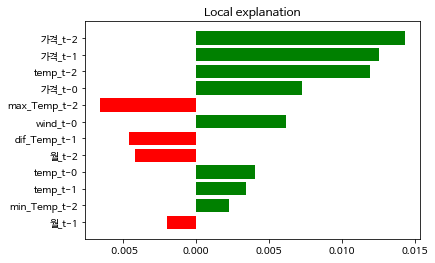

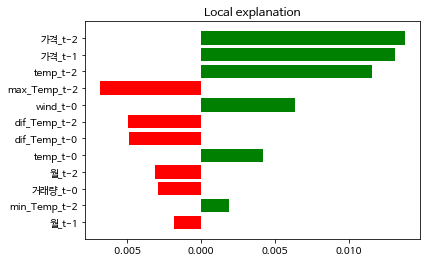

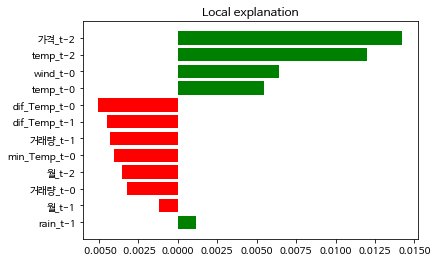

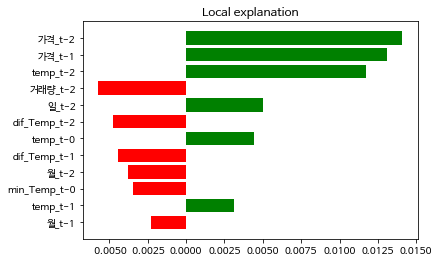

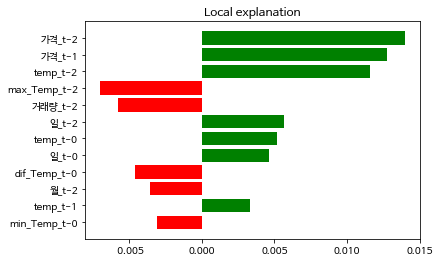

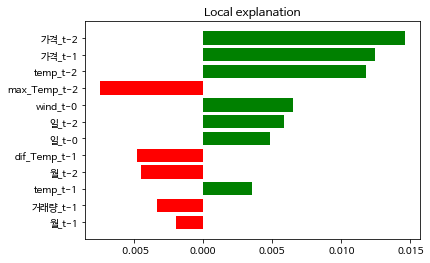

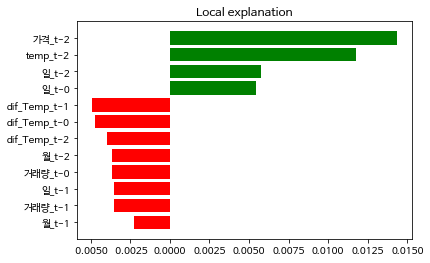

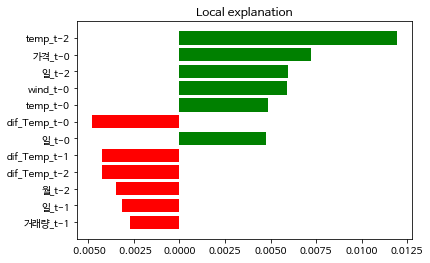

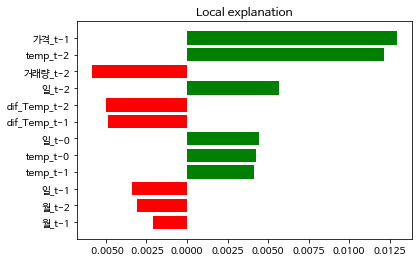

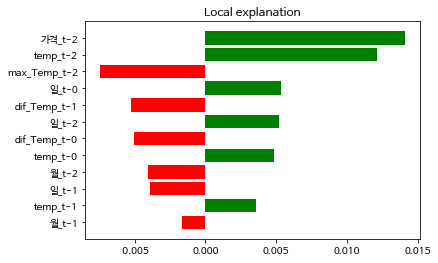

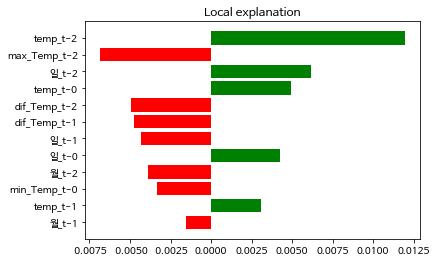

In [ ]:
WINDOW_SIZE=3
BATCH_SIZE=32
print('--------------- window size = {} ----------------------'.format(WINDOW_SIZE))
train_data = windowed_dataset(x_train, y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(x_test, y_test, WINDOW_SIZE, BATCH_SIZE, False)

# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

    
model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
        padding="causal",
        activation="relu",
        input_shape=[WINDOW_SIZE, x_train.shape[1]]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

# early stopping
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 50)

model_name = 'model_' + 'sangchu' + str(WINDOW_SIZE) + '.h5'    
checkpoint = ModelCheckpoint(model_name,             # file명을 지정합니다
                            monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다         
                            save_best_only=True,  # 가장 best 값만 저장합니다
                            mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )


history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=200, verbose=0, callbacks = [checkpoint, earlystopping])

model = tf.keras.models.load_model(model_name)
# 예측
pred = model.predict(test_data)

##  NMAE 계산

nmae_df = pd.concat([pd.Series(pred.ravel()),y_test[WINDOW_SIZE:].reset_index(drop = True)], axis = 1)
nmae_df.columns = ['pred', 'true']

df11 = pd.concat([nmae_df['pred'], x_test.reset_index(drop = True)], axis = 1)[:-WINDOW_SIZE]
df10 = pd.concat([nmae_df['true'], x_test.reset_index(drop = True)], axis = 1)[:-WINDOW_SIZE]

# inverse scaling --> true_val : 실제 가격, pred_val : 예측한 가격
true_val = pd.DataFrame(scaler14.inverse_transform(df10))[0]
pred_val = pd.DataFrame(scaler14.inverse_transform(df11))[0]
# df20 : inverse scaling 한 pred와 true값을 지닌 df
df20 = pd.concat([true_val, pred_val], axis = 1)
df20.columns = ['true', 'pred']
nmae(df20) # nmae 계산


# 그래프 그리기
df9 = nmae_df.query('true != 0')
plt.figure(figsize=(8, 6))
plt.plot(df9['true'], label='actual')
plt.plot(df9['pred'], label='prediction')
plt.legend()
plt.show()


# loss 그래프
plt.plot(history.history['loss'], c = 'r', label='train')
plt.plot(history.history['val_loss'], c = 'b', label='test')
plt.legend()
plt.show()
print()





ttt = np.array(list(map(lambda x: x[0].numpy(), train_data)))[0]
ttt2 = np.array(list(map(lambda x: x[0].numpy(), test_data)))[0]
explainer = lime_tabular.RecurrentTabularExplainer(ttt, feature_names=x_train.columns, mode='regression',discretize_continuous=False)
for i in range(32):
    exp = explainer.explain_instance(ttt2[i,:,:], model.predict, num_features=len(x_train.columns))
    exp.as_pyplot_figure()

# 백다다기 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_baekdada.drop('1_week', 1), df_baekdada['1_week'], test_size=0.2, random_state=0, shuffle=False)

--------------- window size = 3 ----------------------
데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 3, 12)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32,)
NMAE : 0.26152902120040367


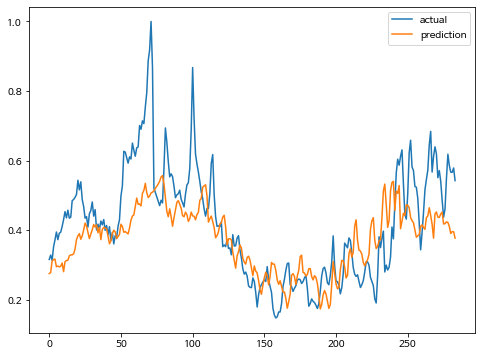

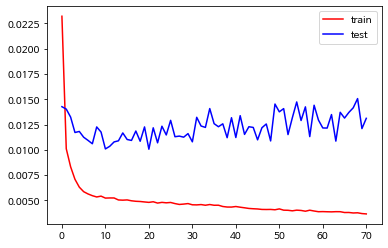

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/lime/explanation.py:168: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/

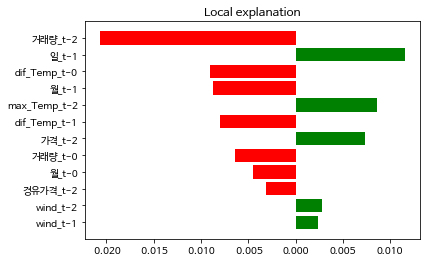

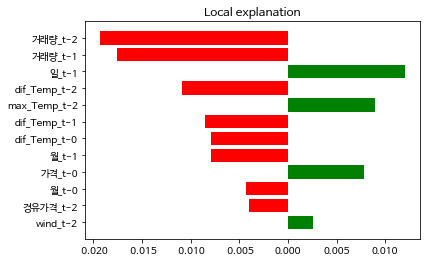

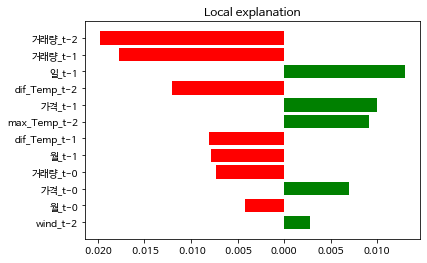

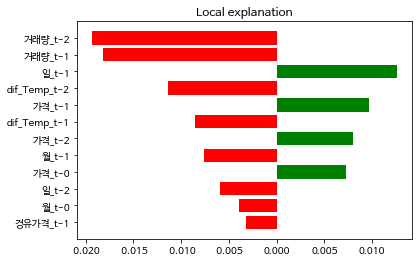

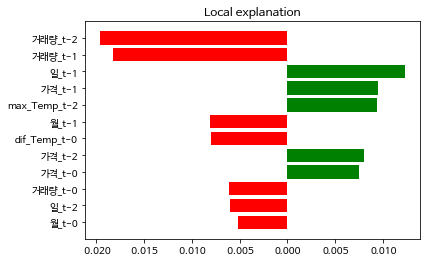

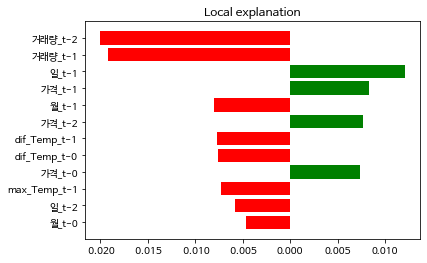

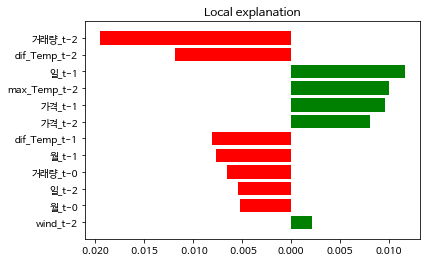

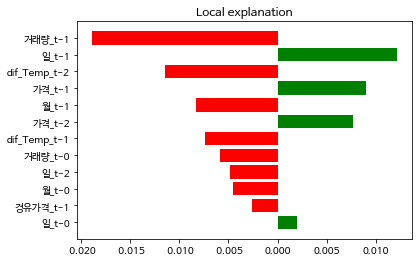

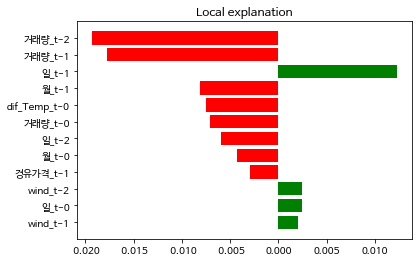

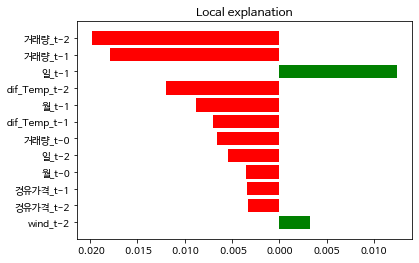

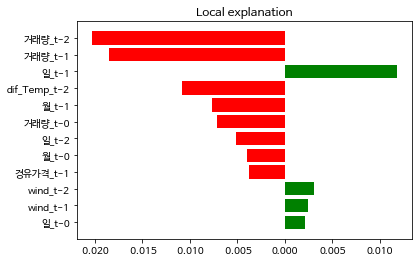

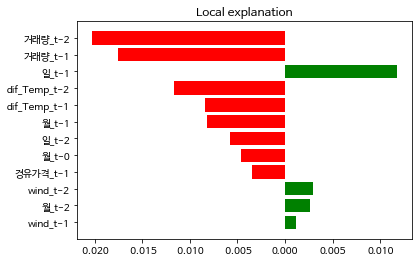

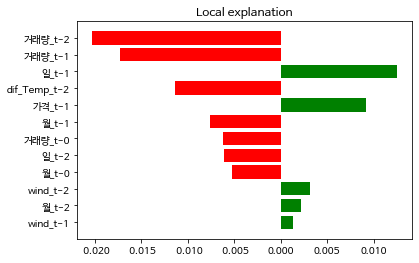

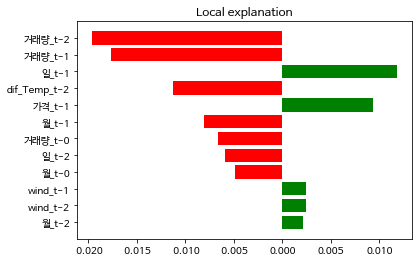

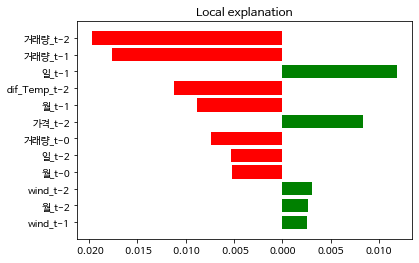

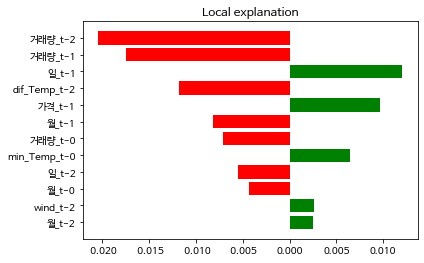

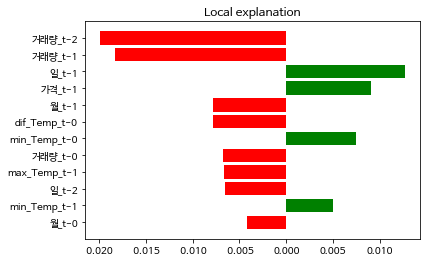

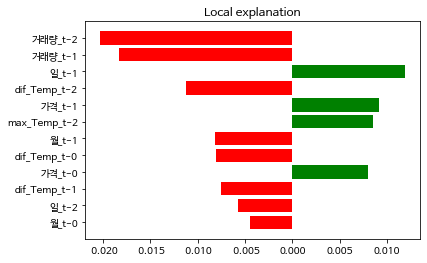

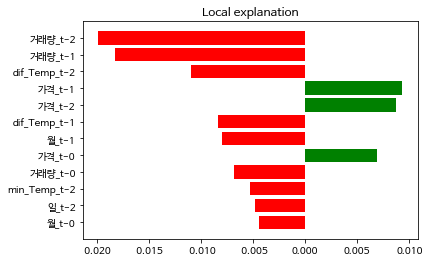

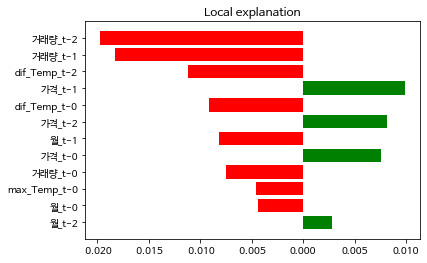

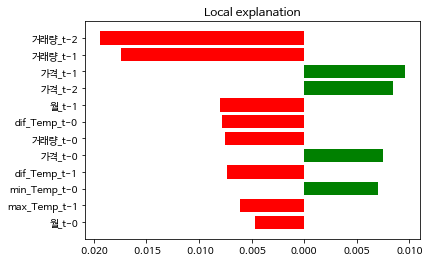

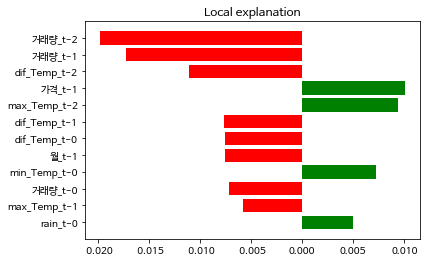

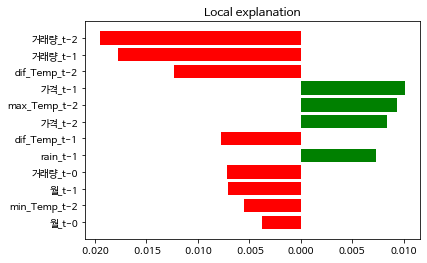

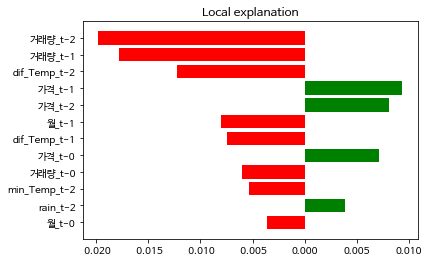

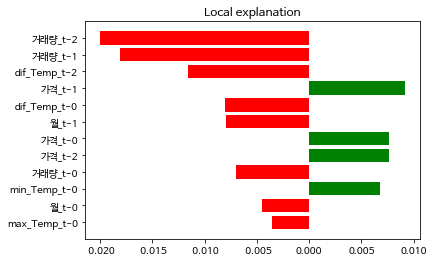

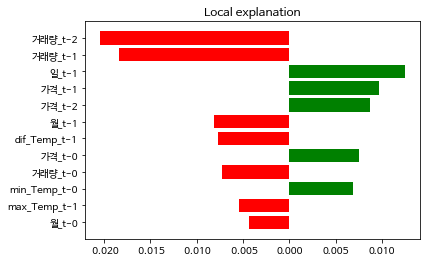

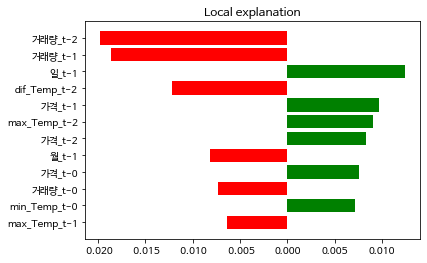

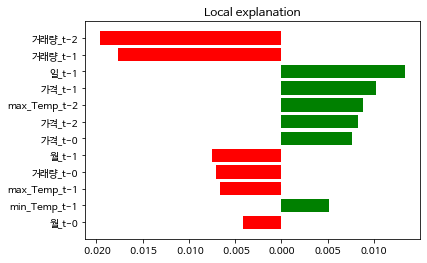

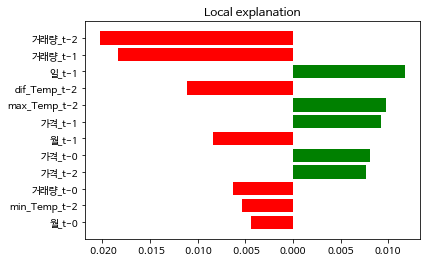

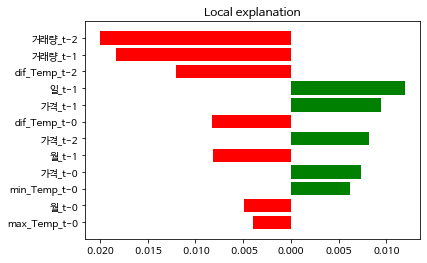

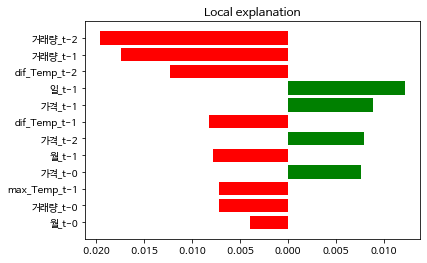

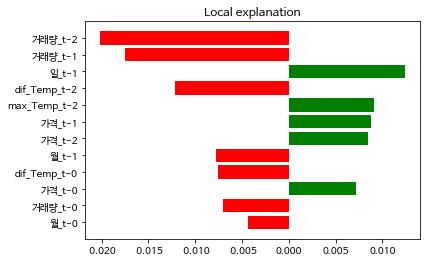

In [ ]:
WINDOW_SIZE=3
BATCH_SIZE=32
print('--------------- window size = {} ----------------------'.format(WINDOW_SIZE))
train_data = windowed_dataset(x_train, y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(x_test, y_test, WINDOW_SIZE, BATCH_SIZE, False)

# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

    
model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
        padding="causal",
        activation="relu",
        input_shape=[WINDOW_SIZE, x_train.shape[1]]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

# early stopping
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 50)

model_name = 'model_' + 'baekdada' + str(WINDOW_SIZE) + '.h5'    
checkpoint = ModelCheckpoint(model_name,             # file명을 지정합니다
                            monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다         
                            save_best_only=True,  # 가장 best 값만 저장합니다
                            mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )


history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=200, verbose=0, callbacks = [checkpoint, earlystopping])

model = tf.keras.models.load_model(model_name)
# 예측
pred = model.predict(test_data)

##  NMAE 계산

nmae_df = pd.concat([pd.Series(pred.ravel()),y_test[WINDOW_SIZE:].reset_index(drop = True)], axis = 1)
nmae_df.columns = ['pred', 'true']

df11 = pd.concat([nmae_df['pred'], x_test.reset_index(drop = True)], axis = 1)[:-WINDOW_SIZE]
df10 = pd.concat([nmae_df['true'], x_test.reset_index(drop = True)], axis = 1)[:-WINDOW_SIZE]

# inverse scaling --> true_val : 실제 가격, pred_val : 예측한 가격
true_val = pd.DataFrame(scaler15.inverse_transform(df10))[0]
pred_val = pd.DataFrame(scaler15.inverse_transform(df11))[0]
# df20 : inverse scaling 한 pred와 true값을 지닌 df
df20 = pd.concat([true_val, pred_val], axis = 1)
df20.columns = ['true', 'pred']
nmae(df20) # nmae 계산


# 그래프 그리기
df9 = nmae_df.query('true != 0')
plt.figure(figsize=(8, 6))
plt.plot(df9['true'], label='actual')
plt.plot(df9['pred'], label='prediction')
plt.legend()
plt.show()


# loss 그래프
plt.plot(history.history['loss'], c = 'r', label='train')
plt.plot(history.history['val_loss'], c = 'b', label='test')
plt.legend()
plt.show()
print()





ttt = np.array(list(map(lambda x: x[0].numpy(), train_data)))[0]
ttt2 = np.array(list(map(lambda x: x[0].numpy(), test_data)))[0]
explainer = lime_tabular.RecurrentTabularExplainer(ttt, feature_names=x_train.columns, mode='regression',discretize_continuous=False)
for i in range(32):
    exp = explainer.explain_instance(ttt2[i,:,:], model.predict, num_features=len(x_train.columns))
    exp.as_pyplot_figure()

# 애호박

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_pumpkin.drop('1_week', 1), df_pumpkin['1_week'], test_size=0.2, random_state=0, shuffle=False)

--------------- window size = 4 ----------------------
데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 4, 12)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32,)
NMAE : 0.3577496842224009


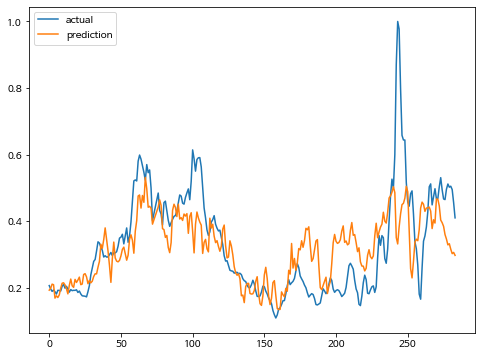

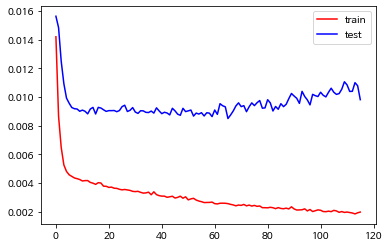

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/lime/explanation.py:168: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/

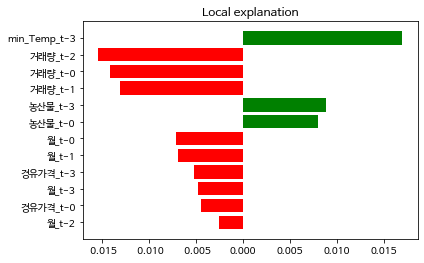

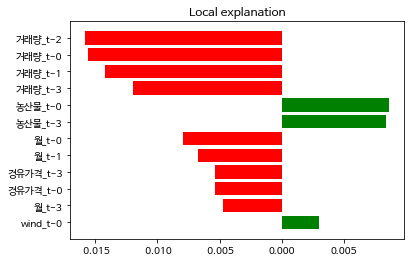

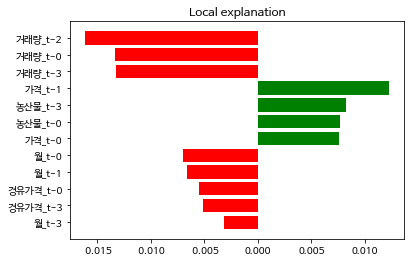

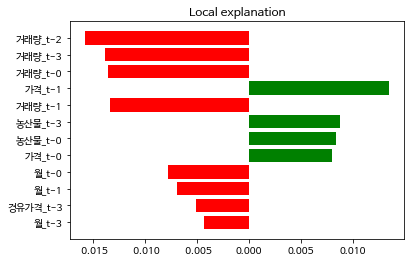

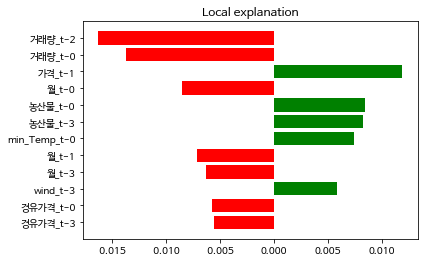

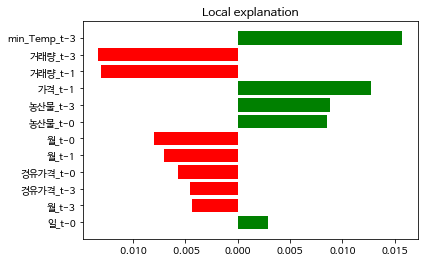

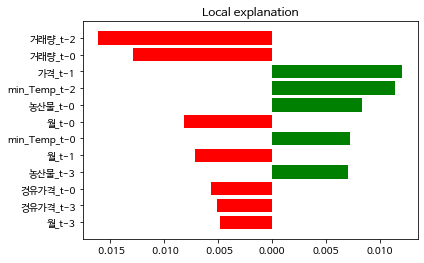

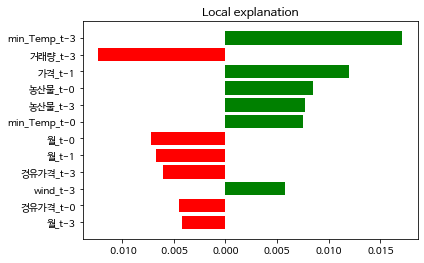

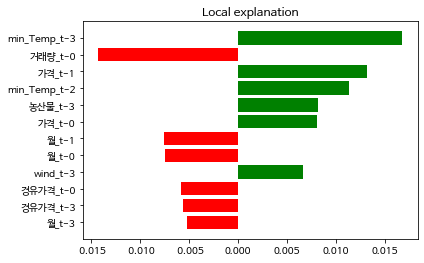

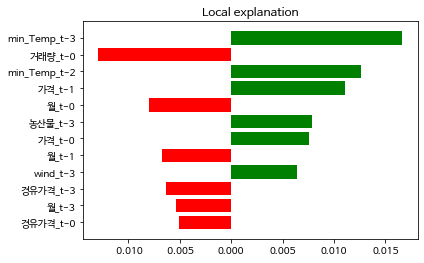

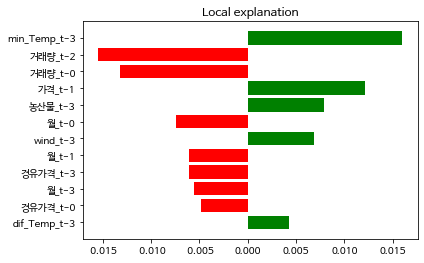

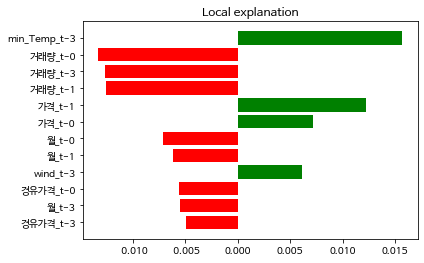

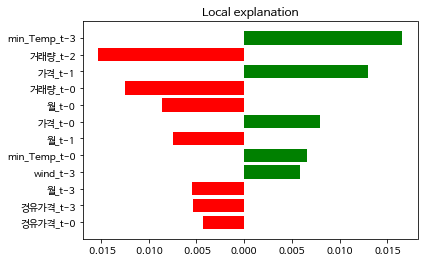

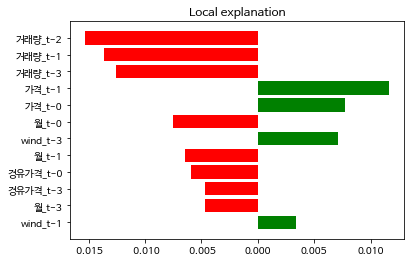

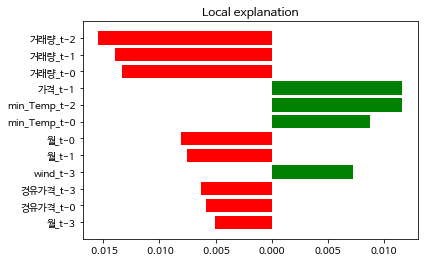

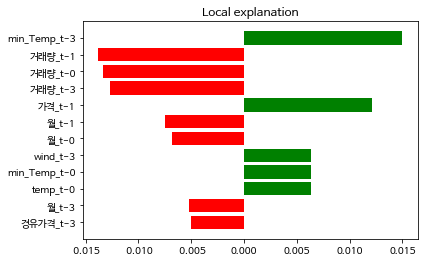

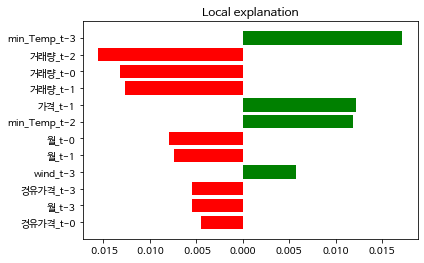

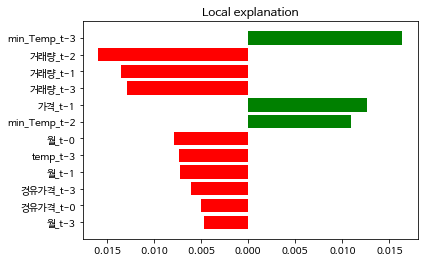

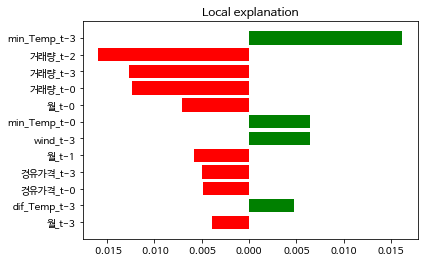

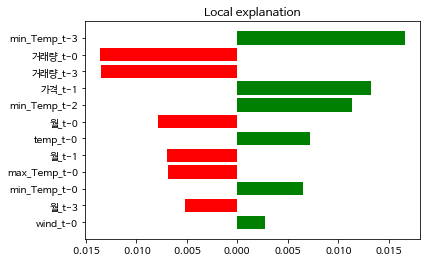

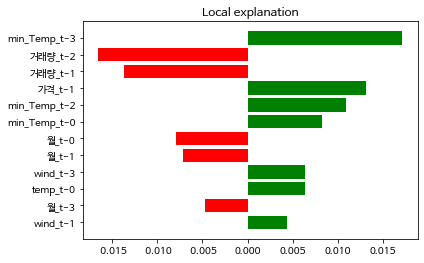

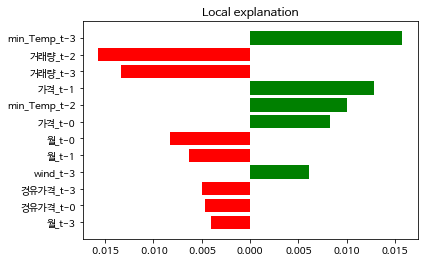

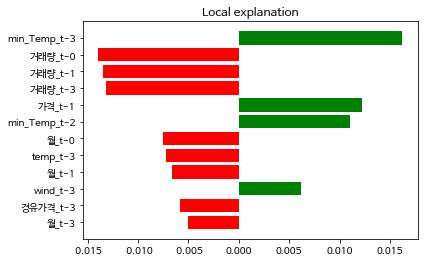

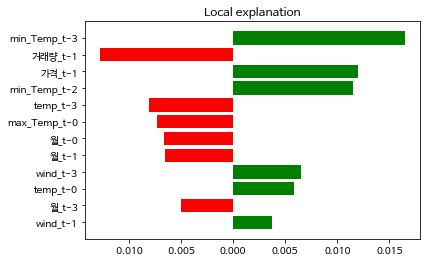

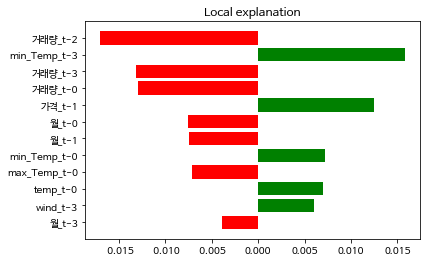

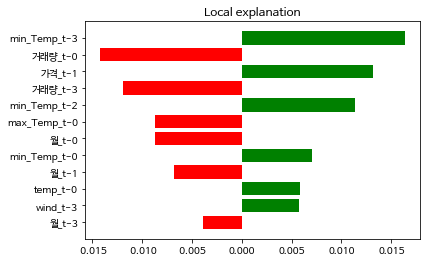

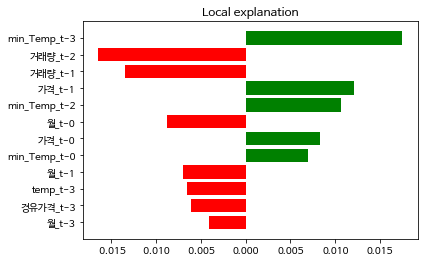

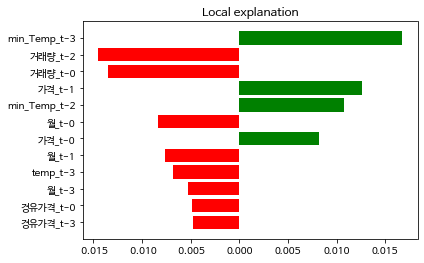

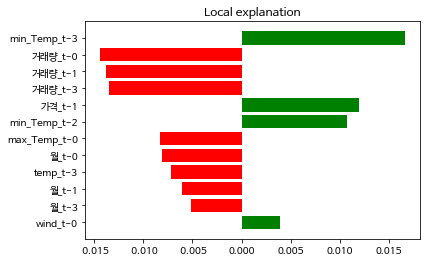

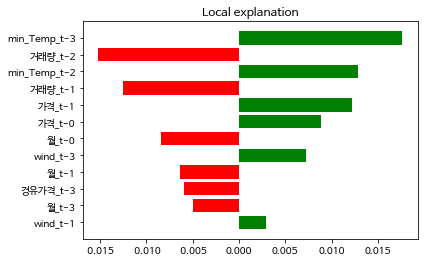

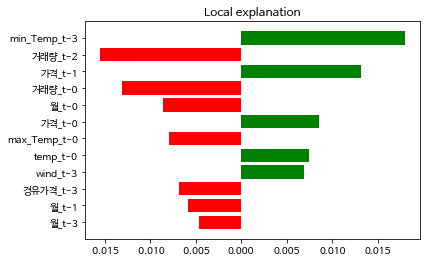

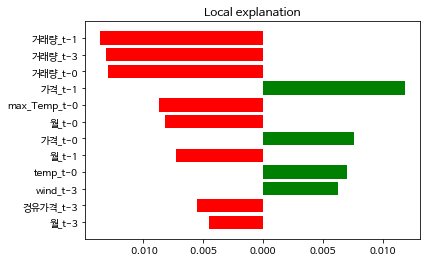

In [ ]:
WINDOW_SIZE=4
BATCH_SIZE=32
print('--------------- window size = {} ----------------------'.format(WINDOW_SIZE))
train_data = windowed_dataset(x_train, y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(x_test, y_test, WINDOW_SIZE, BATCH_SIZE, False)

# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

    
model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
        padding="causal",
        activation="relu",
        input_shape=[WINDOW_SIZE, x_train.shape[1]]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

# early stopping
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 50)

model_name = 'model_' + 'pumpkin' + str(WINDOW_SIZE) + '.h5'    
checkpoint = ModelCheckpoint(model_name,             # file명을 지정합니다
                            monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다         
                            save_best_only=True,  # 가장 best 값만 저장합니다
                            mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )


history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=200, verbose=0, callbacks = [checkpoint, earlystopping])

model = tf.keras.models.load_model(model_name)
# 예측
pred = model.predict(test_data)

##  NMAE 계산

nmae_df = pd.concat([pd.Series(pred.ravel()),y_test[WINDOW_SIZE:].reset_index(drop = True)], axis = 1)
nmae_df.columns = ['pred', 'true']

df11 = pd.concat([nmae_df['pred'], x_test.reset_index(drop = True)], axis = 1)[:-WINDOW_SIZE]
df10 = pd.concat([nmae_df['true'], x_test.reset_index(drop = True)], axis = 1)[:-WINDOW_SIZE]

# inverse scaling --> true_val : 실제 가격, pred_val : 예측한 가격
true_val = pd.DataFrame(scaler16.inverse_transform(df10))[0]
pred_val = pd.DataFrame(scaler16.inverse_transform(df11))[0]
# df20 : inverse scaling 한 pred와 true값을 지닌 df
df20 = pd.concat([true_val, pred_val], axis = 1)
df20.columns = ['true', 'pred']
nmae(df20) # nmae 계산


# 그래프 그리기
df9 = nmae_df.query('true != 0')
plt.figure(figsize=(8, 6))
plt.plot(df9['true'], label='actual')
plt.plot(df9['pred'], label='prediction')
plt.legend()
plt.show()


# loss 그래프
plt.plot(history.history['loss'], c = 'r', label='train')
plt.plot(history.history['val_loss'], c = 'b', label='test')
plt.legend()
plt.show()
print()





ttt = np.array(list(map(lambda x: x[0].numpy(), train_data)))[0]
ttt2 = np.array(list(map(lambda x: x[0].numpy(), test_data)))[0]
explainer = lime_tabular.RecurrentTabularExplainer(ttt, feature_names=x_train.columns, mode='regression',discretize_continuous=False)
for i in range(32):
    exp = explainer.explain_instance(ttt2[i,:,:], model.predict, num_features=len(x_train.columns))
    exp.as_pyplot_figure()


# 캠벨얼리

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_cambel.drop('1_week', 1), df_cambel['1_week'], test_size=0.2, random_state=0, shuffle=False)

--------------- window size = 8 ----------------------
데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 8, 12)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32,)
NMAE : 0.48102614538952104


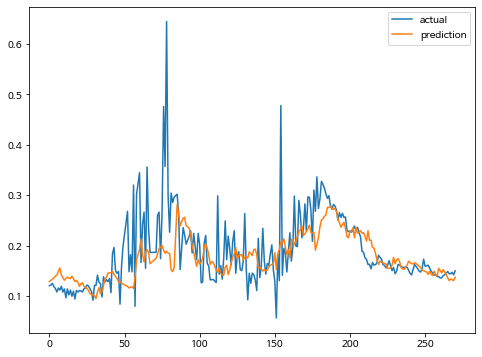

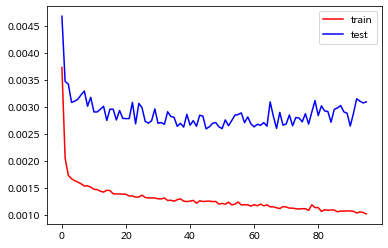

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/lime/explanation.py:168: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/

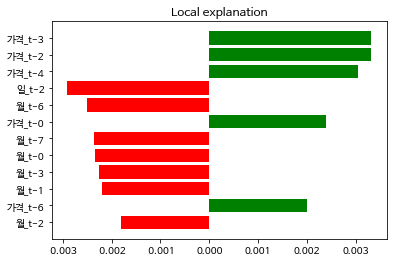

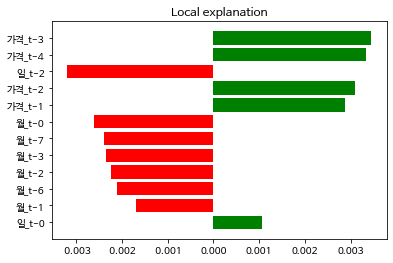

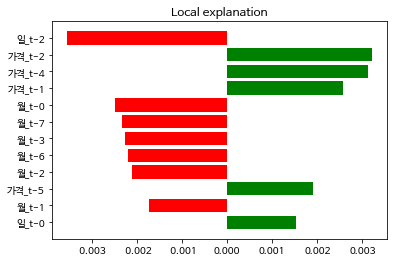

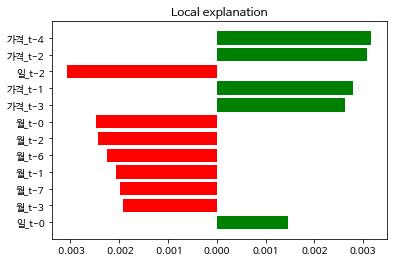

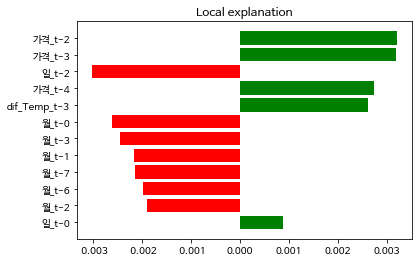

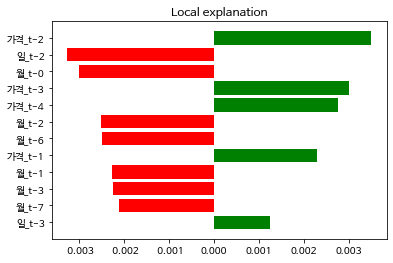

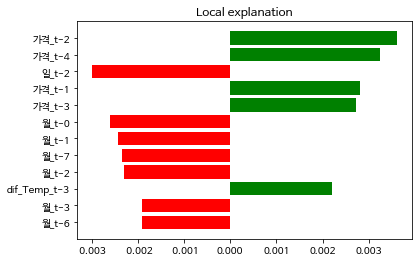

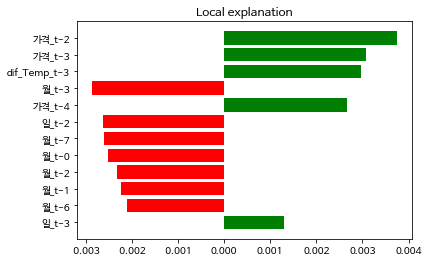

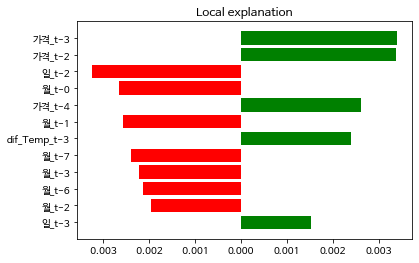

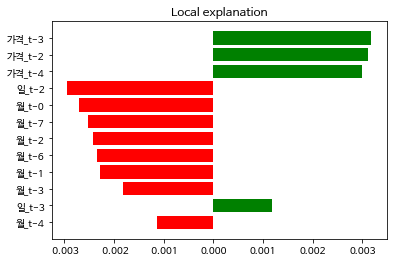

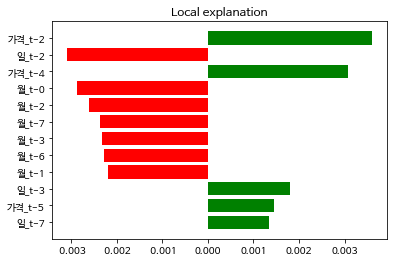

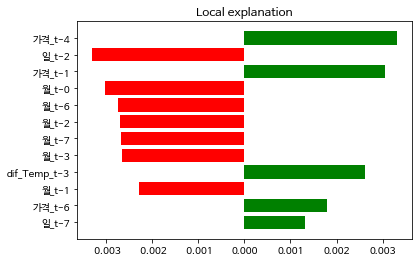

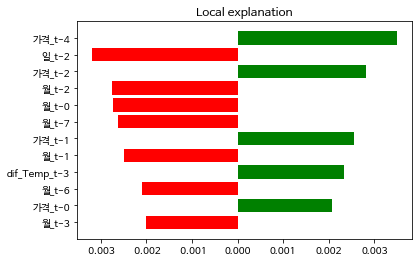

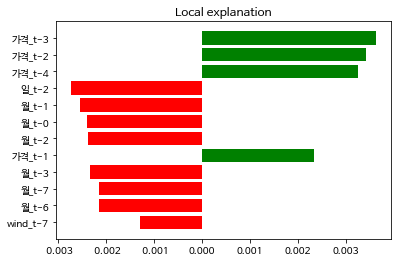

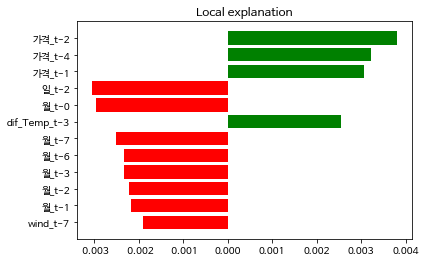

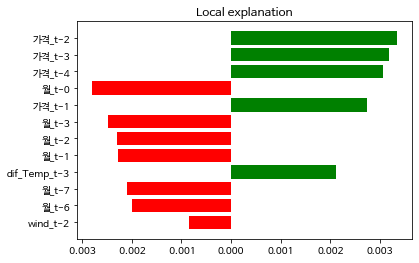

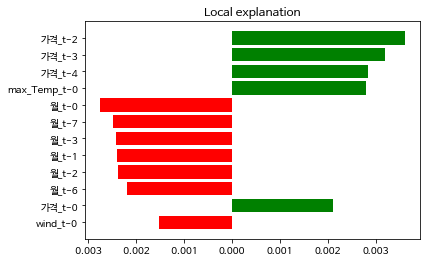

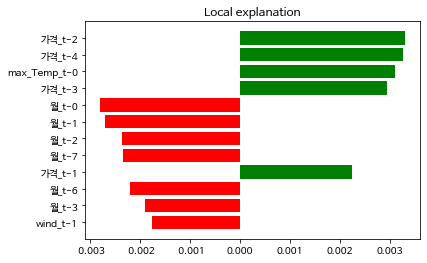

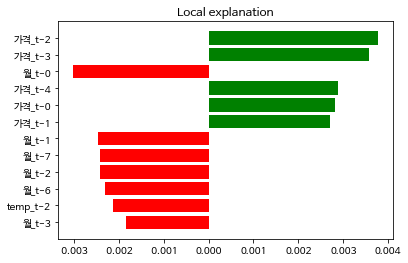

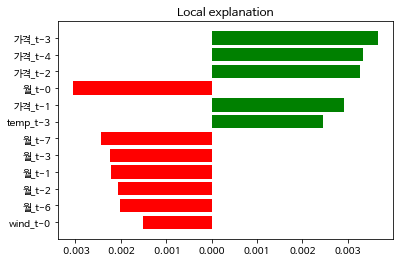

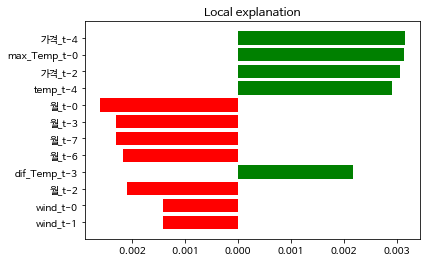

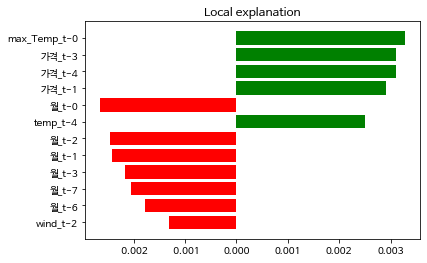

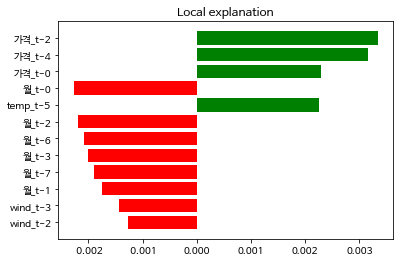

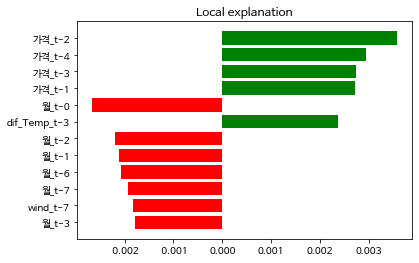

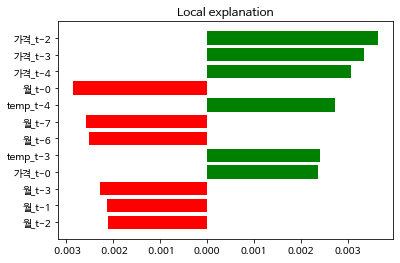

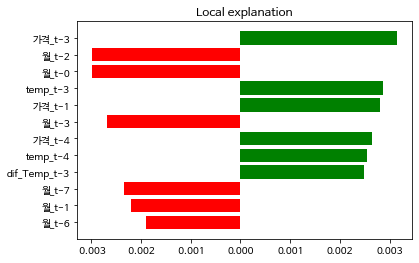

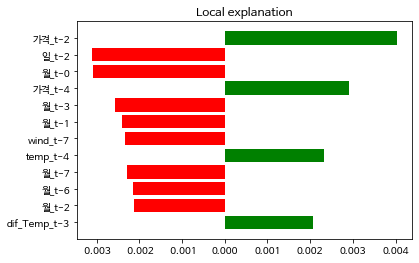

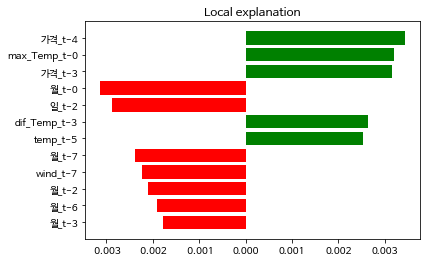

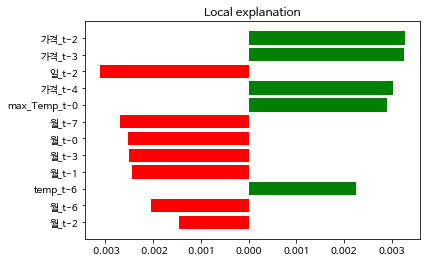

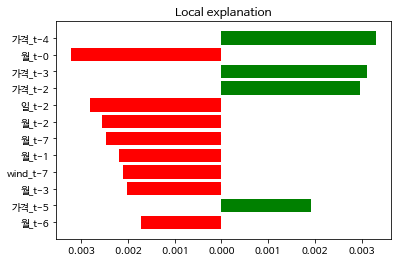

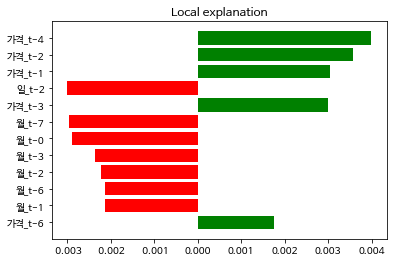

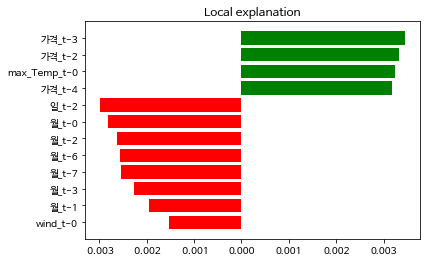

In [ ]:
WINDOW_SIZE=8
BATCH_SIZE=32
print('--------------- window size = {} ----------------------'.format(WINDOW_SIZE))
train_data = windowed_dataset(x_train, y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(x_test, y_test, WINDOW_SIZE, BATCH_SIZE, False)

# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

    
model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
        padding="causal",
        activation="relu",
        input_shape=[WINDOW_SIZE, x_train.shape[1]]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

# early stopping
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 50)

model_name = 'model_' + 'cambel' + str(WINDOW_SIZE) + '.h5'    
checkpoint = ModelCheckpoint(model_name,             # file명을 지정합니다
                            monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다         
                            save_best_only=True,  # 가장 best 값만 저장합니다
                            mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )


history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=200, verbose=0, callbacks = [checkpoint, earlystopping])

model = tf.keras.models.load_model(model_name)
# 예측
pred = model.predict(test_data)

##  NMAE 계산

nmae_df = pd.concat([pd.Series(pred.ravel()),y_test[WINDOW_SIZE:].reset_index(drop = True)], axis = 1)
nmae_df.columns = ['pred', 'true']

df11 = pd.concat([nmae_df['pred'], x_test.reset_index(drop = True)], axis = 1)[:-WINDOW_SIZE]
df10 = pd.concat([nmae_df['true'], x_test.reset_index(drop = True)], axis = 1)[:-WINDOW_SIZE]

# inverse scaling --> true_val : 실제 가격, pred_val : 예측한 가격
true_val = pd.DataFrame(scaler17.inverse_transform(df10))[0]
pred_val = pd.DataFrame(scaler17.inverse_transform(df11))[0]
# df20 : inverse scaling 한 pred와 true값을 지닌 df
df20 = pd.concat([true_val, pred_val], axis = 1)
df20.columns = ['true', 'pred']
nmae(df20) # nmae 계산


# 그래프 그리기
df9 = nmae_df.query('true != 0')
plt.figure(figsize=(8, 6))
plt.plot(df9['true'], label='actual')
plt.plot(df9['pred'], label='prediction')
plt.legend()
plt.show()


# loss 그래프
plt.plot(history.history['loss'], c = 'r', label='train')
plt.plot(history.history['val_loss'], c = 'b', label='test')
plt.legend()
plt.show()
print()





ttt = np.array(list(map(lambda x: x[0].numpy(), train_data)))[0]
ttt2 = np.array(list(map(lambda x: x[0].numpy(), test_data)))[0]
explainer = lime_tabular.RecurrentTabularExplainer(ttt, feature_names=x_train.columns, mode='regression',discretize_continuous=False)
for i in range(32):
    exp = explainer.explain_instance(ttt2[i,:,:], model.predict, num_features=len(x_train.columns))
    exp.as_pyplot_figure()
